In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import urllib.request
import time
import itertools
# %matplotlib notebook
%matplotlib inline

In [2]:
def plot_path(dist_matrix, coords, route):
    plt.figure(figsize=(12,8))
    fig, ax = plt.subplots(figsize=(12,8))

    plt.plot(coords[:, 0], coords[:, 1], 'o')
    n = len(route)
    for i in range(n):
        plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

    for i in range(1, len(route)):
        ax.add_line(Line2D(
            [coords[route[i-1], 0], coords[route[i], 0]],
            [coords[route[i-1], 1], coords[route[i], 1]],
            linewidth=1, color='gray'))
        plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
                 (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
                 '%d' % dist_matrix[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
    ax.add_line(Line2D(
        [coords[route[-1], 0], coords[route[0], 0]],
        [coords[route[-1], 1], coords[route[0], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[-1], 0] + coords[route[0], 0])/2 + 6,
             (coords[route[-1], 1] + coords[route[0], 1])/2 + 6,
             '%d' % dist_matrix[route[-1], 0], fontdict={'weight':'normal', 'size':7})

    plt.title('Solution')

    plt.show()

In [3]:
def PMX(P1, P2):
    x = np.random.choice(range(P1.shape[0]), size=2, replace=False)
    a, b = x.min(), x.max()
    x = np.random.choice(range(3), size=1, replace=False)
    if x == 0:
        b, a = a, 0
    elif x == 2:
        a, b = b, P1.shape[0]
    O1 = P1.copy()
    O2 = P2.copy()
    O1[a:b] = P2[a:b]
    O2[a:b] = P1[a:b]
    dict_P1_to_P2 = {P1[i]:P2[i] for i in range(a, b)}
    dict_P2_to_P1 = {P2[i]:P1[i] for i in range(a, b)}
    for i in range(0, a):
        while O1[i] in dict_P2_to_P1:
            O1[i] = dict_P2_to_P1[O1[i]]
        while O2[i] in dict_P1_to_P2:
            O2[i] = dict_P1_to_P2[O2[i]]
    for i in range(b, P1.shape[0]):
        while O1[i] in dict_P2_to_P1:
            O1[i] = dict_P2_to_P1[O1[i]]
        while O2[i] in dict_P1_to_P2:
            O2[i] = dict_P1_to_P2[O2[i]]
    return O1, O2

In [4]:
def OX(P1, P2):
    x = np.random.choice(range(P1.shape[0]), size=2, replace=False)
    a, b = x.min(), x.max()
    x = np.random.choice(range(3), size=1, replace=False)
    if x == 0:
        b, a = a, 0
    elif x == 2:
        a, b = b, P1.shape[0]
    O1 = np.zeros(P1.shape[0])
    O2 = np.zeros(P1.shape[0])
    O1[a:b] = P1[a:b]
    O2[a:b] = P2[a:b]
    restricted_in_O1 = {P1[i] for i in range(a, b)}
    restricted_in_O2 = {P2[i] for i in range(a, b)}
    pointer_O1 = b
    pointer_O2 = b
    concatenated = itertools.chain(range(b, P1.shape[0]), range(0, b))
    list_to_insert_to_O1 = [P2[i] for i in concatenated if P2[i] not in restricted_in_O1 ]
    concatenated = itertools.chain(range(b, P1.shape[0]), range(0, b))
    list_to_insert_to_O2 = [P1[i] for i in concatenated if P1[i] not in restricted_in_O2 ]
    pointer = 0
    for i in range(b, P1.shape[0]):
        O1[i] = list_to_insert_to_O1[pointer]
        O2[i] = list_to_insert_to_O2[pointer]
        pointer += 1
    for i in range(0, a):
        O1[i] = list_to_insert_to_O1[pointer]
        O2[i] = list_to_insert_to_O2[pointer]
        pointer += 1
    return O1, O2

In [5]:
def CX(P1, P2):
    O1 = np.zeros(P1.shape[0])
    O2 = np.zeros(P1.shape[0])
    cycles = np.zeros(P1.shape[0])
#     P1_values_to_indices = {P1[i]:i for i in range(P1.shape[0])}
    P2_values_to_indices = {P2[i]:i for i in range(P1.shape[0])}
#     print(P2_values_to_indices)
    cycle_number = 1
    for i in range(P1.shape[0]):
        if cycles[i] == 0:
            start = P1[i]
            current_index = P2_values_to_indices[start]
            new = P1[current_index]
            cycles[i] = cycle_number
            while new != start:
                cycles[current_index] = cycle_number
                new = P1[current_index]
                current_index = P2_values_to_indices[new]
            cycle_number += 1
#     print(cycles)
    for i in range(P1.shape[0]):
        if cycles[i] % 2 == 1:
            O1[i], O2[i] = P1[i], P2[i]
        else:
            O1[i], O2[i] = P2[i], P1[i]
    return O1, O2

In [6]:
def OBX(P1, P2):
    O1 = np.zeros(P1.shape[0]) - 1
    num_of_positions = np.random.choice(range(P1.shape[0]), size=1, replace=False)
    positions = np.random.choice(range(P1.shape[0]), size=num_of_positions, replace=False)
#     print(np.sort(positions))
    used = set()
    for i in positions:
        O1[i] = P2[i]
        used.add(P2[i])
    list_to_add = [P1[i] for i in range(P1.shape[0]) if P1[i] not in used]
    pointer = 0
    for i in range(P1.shape[0]):
        if O1[i] == -1:
            O1[i] = list_to_add[pointer]
            pointer += 1

    O2 = np.zeros(P1.shape[0]) - 1
    num_of_positions = np.random.choice(range(P1.shape[0]), size=1, replace=False)
    positions = np.random.choice(range(P1.shape[0]), size=num_of_positions, replace=False)
#     print(np.sort(positions))
    used = set()
    for i in positions:
        O2[i] = P1[i]
        used.add(P1[i])
    list_to_add = [P2[i] for i in range(P1.shape[0]) if P2[i] not in used]
    pointer = 0
    for i in range(P1.shape[0]):
        if O2[i] == -1:
            O2[i] = list_to_add[pointer]
            pointer += 1
    return O1, O2

In [7]:
def reverse_sequence_mutation(p):
    a = np.random.choice(p.shape[0], 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    q[i:j+1] = q[i:j+1][::-1]
    return q

In [8]:
def transpose_mutation(p):
    a, b = np.random.choice(range(p.shape[0]), size=2, replace=False)
    q = p.copy()
    x = q[a]
    q[a] = q[b]
    q[b] = x
    return q

In [9]:
def qap_objective_function(p, n, A, B):
    s = 0.0
    for i in range(n):
        s += (A[i, :] * B[p[i], p]).sum()
    return s

In [10]:
def local_search(A, B, p, k=3):
    best_p = p
    n = p.shape[0]
    best_score = qap_objective_function(p, n, A, B)
    for r in range(2, k+1):
        for perm in itertools.permutations(range(p.shape[0]), r):
            new = p.copy()
            ordered = sorted(perm)
            j = 0
            for i in ordered:
                new[i] = p[perm[j]]
                j += 1
            new_score = qap_objective_function(new, n, A, B)
            if new_score < best_score:
                best_p = new.copy()
                best_score = new_score
    return best_p

In [11]:
def iterative_local_search(A, B, p, k=2):
    best_p = p
    best_score = qap_objective_function(p, n, A, B)
    last_best_p = p
    while True:
        for r in range(2, k+1):
            for perm in itertools.permutations(range(p.shape[0]), r):
                new = last_best_p.copy()
                ordered = sorted(perm)
                j = 0
                for i in ordered:
                    new[i] = last_best_p[perm[j]]
                    j += 1
                new_score = qap_objective_function(new, n, A, B)
                if new_score < best_score:
                    best_p = new.copy()
                    best_score = new_score
        if (best_p == last_best_p).all():
            break
        last_best_p = best_p
    return best_p

In [12]:
def SGA_qap(n, A, B, population_size=500, crossover_probability=0.95, 
            mutation_probability=0.25, number_of_iterations=250, mutation=reverse_sequence_mutation,
           crossover=PMX, locality=local_search, locality_probablility=0.00, k=2, transparent=False):

    chromosome_length = n
    number_of_offspring = population_size
    time0 = time.time()

    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))
    
    hist_of_best_objectives = np.zeros(number_of_iterations)

    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)

    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = qap_objective_function(current_population[i, :], chromosome_length, A, B)
#         objective_values[i] = tsp_objective_function(Distance_matrix, current_population[i, :])

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = crossover(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]

        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = mutation(children_population[i, :])
        
        # mutate by local [iter] search the children population
        for i in range(number_of_offspring):
            if np.random.random() < locality_probablility:
                children_population[i, :] = locality(A, B, children_population[i, :], k=k)

        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = qap_objective_function(children_population[i, :], chromosome_length, A, B)

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])

        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]
        
        hist_of_best_objectives[t] = objective_values[0]
        # recording some statistics
        if best_objective_value > objective_values[0]:
            best_objective_value = objective_values[0]
            best_chromosome = current_population[0, :]
        if transparent:
            print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))
    return best_chromosome, hist_of_best_objectives

In [14]:
def get_next_instance(QAP_INSTANCE_URL, verbose=False):
    qap_instance_file = urllib.request.urlopen(QAP_INSTANCE_URL)
    line = qap_instance_file.readline()
    n = int(line.decode()[:-1].split()[0])
    if verbose:
        print('Problem size: %d' % n)

    A = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        A[i, :] = list(map(int, line.decode()[:-1].split()))
    if verbose:
        print('Flow matrix:\n', A)

    B = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        B[i, :] = list(map(int, line.decode()[:-1].split()))
    if verbose:
        print('Distance matrix:\n', B)
    return n, A, B

In [15]:
def get_next_instance2(QAP_INSTANCE_URL, verbose=False):
    qap_instance_file = urllib.request.urlopen(QAP_INSTANCE_URL)
    line = qap_instance_file.readline()
    n = int(line.decode()[:-1].split()[0])
    if verbose:
        print('Problem size: %d' % n)

    A = np.empty((n, n))
    for i in range(n):
        line = qap_instance_file.readline()
        A[i, :] = list(map(int, line.decode()[:-1].split()))
    if verbose:
        print('Flow matrix:\n', A)

    B = np.empty((n, n))
    for i in range(n):
        line = qap_instance_file.readline()
        B[i, :] = list(map(int, line.decode()[:-1].split()))
    if verbose:
        print('Distance matrix:\n', B)
    return n, A, B

In [16]:
def get_next_instance3(QAP_INSTANCE_URL, verbose=False):
    qap_instance_file = urllib.request.urlopen(QAP_INSTANCE_URL)
    line = qap_instance_file.readline()
    n = int(line.decode()[:-1].split()[0])
    if verbose:
        print('Problem size: %d' % n)

    A = np.empty((n, n))
    for i in range(n):
        line = qap_instance_file.readline()
        A[i, :] = list(map(int, line.decode()[:-1].split()))
    if verbose:
        print('Flow matrix:\n', A)

    B = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        B[i, :] = list(map(int, line.decode()[:-1].split()))
    if verbose:
        print('Distance matrix:\n', B)
    return n, A, B

# Nug12 578

In [48]:
# 578
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug12.dat'
Nug12_n, Nug12_A, Nug12_B = get_next_instance(QAP_INSTANCE_URL)

  0     0.77193666 612.00000000 768.50920000 808.00000000  29.11468213
  1     1.23768830 612.00000000 743.34840000 776.00000000  25.04271985
  2     1.69945312 612.00000000 724.61960000 754.00000000  22.89305781
  3     2.18419003 612.00000000 710.32400000 736.00000000  21.32766804
  4     2.64492440 600.00000000 697.71280000 722.00000000  20.37278371
  5     3.12264609 600.00000000 686.46160000 710.00000000  19.12413463
  6     3.58441114 600.00000000 676.68280000 700.00000000  17.88282372
  7     4.04916906 600.00000000 668.46000000 690.00000000  16.90489870
  8     4.52090597 600.00000000 661.17600000 682.00000000  16.18936145
  9     5.00062442 598.00000000 654.47640000 674.00000000  15.40029360
 10     5.46737432 586.00000000 648.14720000 668.00000000  14.54424739
 11     5.93113399 578.00000000 642.30240000 660.00000000  13.85102719
 12     6.40870500 578.00000000 637.02480000 654.00000000  12.97589245
 13     6.87944603 578.00000000 631.62920000 648.00000000  12.43868592
 14   

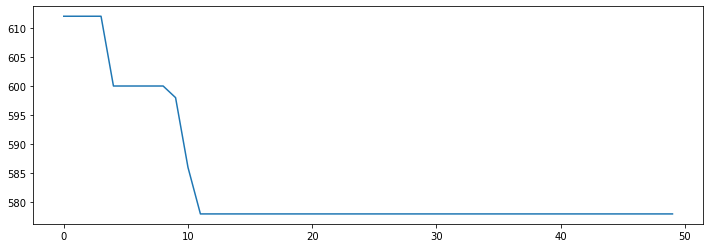

In [47]:
flow_matr = Nug12_A
dist_matr = Nug12_B
n = Nug12_n
population_size = [5000]
crossover_probability = [0.95]
mutation_probability = [0.25]
number_of_iterations = [50]
crossover = [PMX]
mutation = [reverse_sequence_mutation]
locality = [iterative_local_search]
locality_probablility = [0.0]
ks=[3]

for (pop, cross, mut, n_it, cro, mu, loc, loc_prob, k) in itertools.product(population_size, crossover_probability, 
            mutation_probability, number_of_iterations, crossover, mutation, locality, locality_probablility, ks):
    best_p, costs = SGA_qap(n, flow_matr, dist_matr, population_size=pop, crossover_probability=cross, 
            mutation_probability=mut, number_of_iterations=n_it, mutation=mu, crossover=cro, locality=loc, 
            locality_probablility=loc_prob, k=k)
    print(" population_size =", pop, "\n crossover_probability =", cross,
          "\n mutation_probability =", mut, "\n number_of_iterations =", n_it,
          "\n tsp_objective_function:", qap_objective_function(best_p, n, flow_matr, dist_matr), 
          "\n best_permutation:", best_p)
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()

# Nug14 1014

In [49]:
# 1014
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug14.dat'
Nug14_n, Nug14_A, Nug14_B = get_next_instance(QAP_INSTANCE_URL)

  0     0.93857408 1162.00000000 1307.19200000 1358.00000000  37.79561795
  1     1.54694915 1106.00000000 1273.04280000 1314.00000000  32.03650056
  2     2.12544250 1106.00000000 1247.92360000 1284.00000000  29.15656638
  3     2.68195438 1106.00000000 1227.84840000 1262.00000000  26.97534091
  4     3.21552539 1076.00000000 1211.24960000 1242.00000000  25.93644732
  5     3.76907825 1076.00000000 1196.80280000 1228.00000000  24.80102240
  6     4.32455850 1076.00000000 1183.33600000 1214.00000000  23.94003977
  7     4.88110352 1058.00000000 1172.01520000 1200.00000000  22.98033440
  8     5.45955729 1058.00000000 1160.78120000 1188.00000000  22.63784722
  9     6.00310278 1050.00000000 1150.05040000 1178.00000000  22.30075918
 10     6.55958104 1050.00000000 1140.41320000 1168.00000000  21.65059966
 11     7.12322617 1050.00000000 1131.31000000 1158.00000000  20.87095350
 12     7.67076254 1050.00000000 1122.17920000 1148.00000000  20.03428779
 13     8.22225308 1050.00000000 1113.

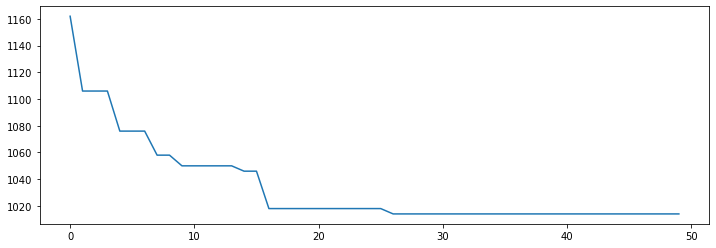

In [52]:
flow_matr = Nug14_A
dist_matr = Nug14_B
n = Nug14_n
population_size = [5000]
crossover_probability = [0.95]
mutation_probability = [0.25]
number_of_iterations = [50]
crossover = [PMX]
mutation = [reverse_sequence_mutation]
locality = [iterative_local_search]
locality_probablility = [0.0]
ks=[3]

for (pop, cross, mut, n_it, cro, mu, loc, loc_prob, k) in itertools.product(population_size, crossover_probability, 
            mutation_probability, number_of_iterations, crossover, mutation, locality, locality_probablility, ks):
    best_p, costs = SGA_qap(n, flow_matr, dist_matr, population_size=pop, crossover_probability=cross, 
            mutation_probability=mut, number_of_iterations=n_it, mutation=mu, crossover=cro, locality=loc, 
            locality_probablility=loc_prob, k=k)
    print(" population_size =", pop, "\n crossover_probability =", cross,
          "\n mutation_probability =", mut, "\n number_of_iterations =", n_it,
          "\n tsp_objective_function:", qap_objective_function(best_p, n, flow_matr, dist_matr), 
          "\n best_permutation:", best_p)
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()

# Nug15 1150

In [53]:
# 1150
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug15.dat'
Nug15_n, Nug15_A, Nug15_B = get_next_instance(QAP_INSTANCE_URL)

 population_size = 5000 
 crossover_probability = 0.975 
 mutation_probability = 0.25 
 number_of_iterations = 100 
 tsp_objective_function: 1168.0 
 best_permutation: [10  7  6  4  5  8 12 11 13 14  0  1  3  2  9]


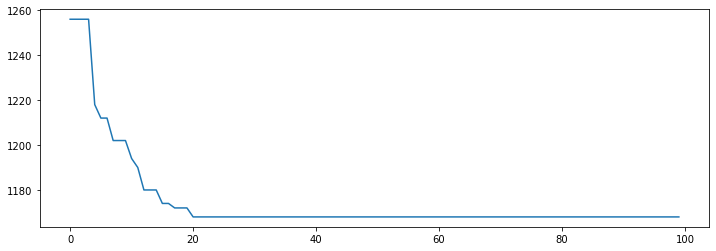

 population_size = 5000 
 crossover_probability = 0.975 
 mutation_probability = 0.275 
 number_of_iterations = 100 
 tsp_objective_function: 1160.0 
 best_permutation: [14  4 13  2  3  5  6  7 12  1  9 11 10  8  0]


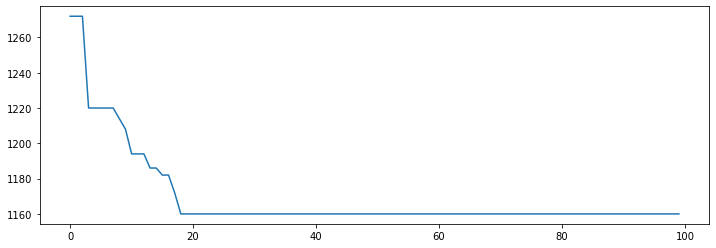

 population_size = 5000 
 crossover_probability = 0.975 
 mutation_probability = 0.3 
 number_of_iterations = 100 
 tsp_objective_function: 1152.0 
 best_permutation: [ 0  1  3 13  5  8 12  2  4 14 10  7  6 11  9]


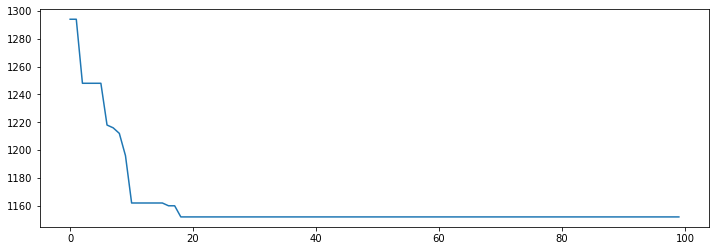

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.25 
 number_of_iterations = 100 
 tsp_objective_function: 1160.0 
 best_permutation: [ 3 13  2  4 14  1 12  7  6  5  0  8 10 11  9]


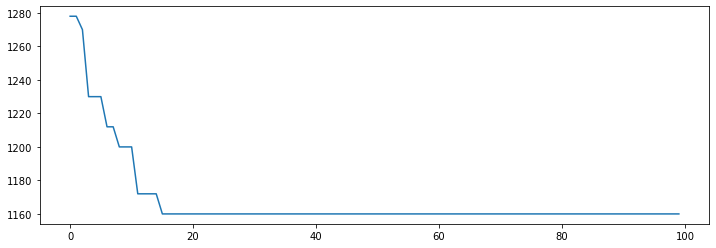

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.275 
 number_of_iterations = 100 
 tsp_objective_function: 1152.0 
 best_permutation: [ 0  1  3 13  5  8 12  2  4 14 10  7  6 11  9]


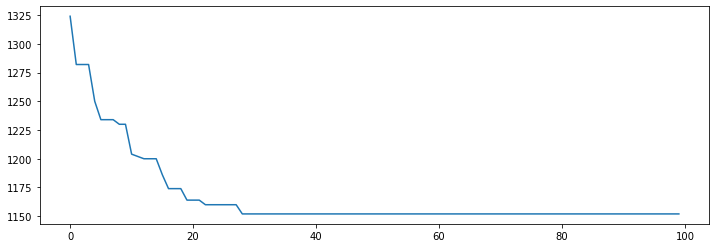

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.3 
 number_of_iterations = 100 
 tsp_objective_function: 1168.0 
 best_permutation: [14  4  2 13  3  5  8  7 12  1  9 11 10  6  0]


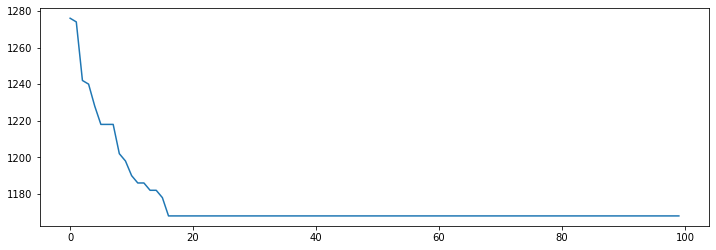

 population_size = 5000 
 crossover_probability = 0.925 
 mutation_probability = 0.25 
 number_of_iterations = 100 
 tsp_objective_function: 1152.0 
 best_permutation: [ 5 13  3  1  0 14  4  2 12  8  9 11  6  7 10]


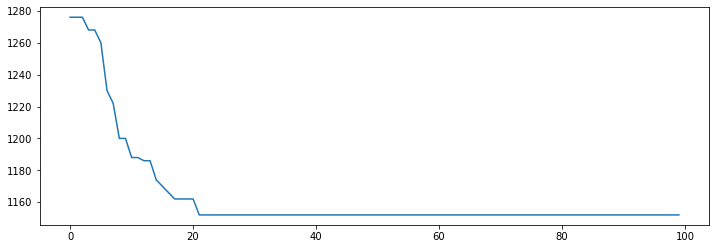

 population_size = 5000 
 crossover_probability = 0.925 
 mutation_probability = 0.275 
 number_of_iterations = 100 
 tsp_objective_function: 1152.0 
 best_permutation: [ 9 11  6  7 10 14  4  2 12  8  5 13  3  1  0]


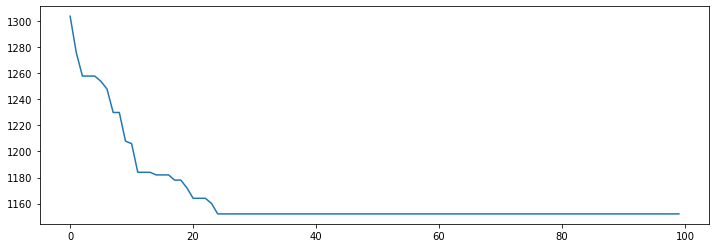

 population_size = 5000 
 crossover_probability = 0.925 
 mutation_probability = 0.3 
 number_of_iterations = 100 
 tsp_objective_function: 1152.0 
 best_permutation: [ 5 13  3  1  0 14  4  2 12  8  9 11  6  7 10]


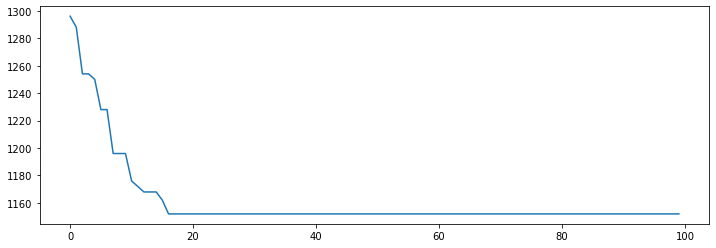

 population_size = 5000 
 crossover_probability = 0.9 
 mutation_probability = 0.25 
 number_of_iterations = 100 
 tsp_objective_function: 1166.0 
 best_permutation: [11  4 13  5 14  8  7 12  2  9 10  6  1  3  0]


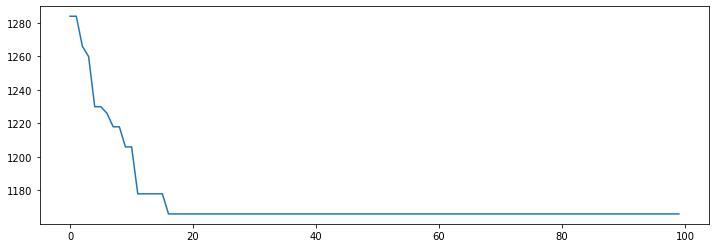

 population_size = 5000 
 crossover_probability = 0.9 
 mutation_probability = 0.275 
 number_of_iterations = 100 
 tsp_objective_function: 1152.0 
 best_permutation: [10  7  6 11  9  8 12  2  4 14  0  1  3 13  5]


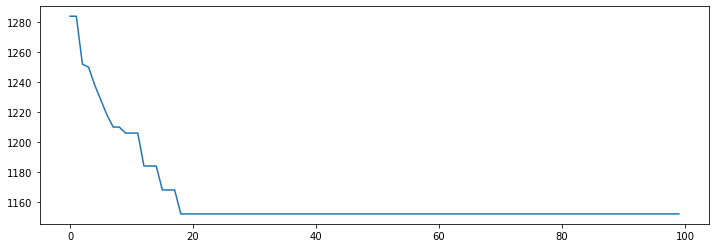

 population_size = 5000 
 crossover_probability = 0.9 
 mutation_probability = 0.3 
 number_of_iterations = 100 
 tsp_objective_function: 1160.0 
 best_permutation: [10  8 11  4 14  7 12  6 13  5  0  1  3  2  9]


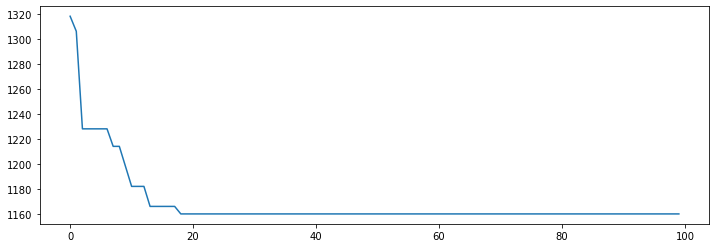

In [60]:
flow_matr = Nug15_A
dist_matr = Nug15_B
n = Nug15_n
population_size = [5000]
crossover_probability = [0.975, 0.95, 0.925, 0.9]
mutation_probability = [0.25, 0.275, 0.3]
number_of_iterations = [100]
crossover = [PMX]
mutation = [reverse_sequence_mutation]
locality = [iterative_local_search]
locality_probablility = [0.0]
ks=[3]
transparent = False

for (pop, cross, mut, n_it, cro, mu, loc, loc_prob, k) in itertools.product(population_size, crossover_probability, 
            mutation_probability, number_of_iterations, crossover, mutation, locality, locality_probablility, ks):
    best_p, costs = SGA_qap(n, flow_matr, dist_matr, population_size=pop, crossover_probability=cross, 
            mutation_probability=mut, number_of_iterations=n_it, mutation=mu, crossover=cro, locality=loc, 
            locality_probablility=loc_prob, k=k, transparent=transparent)
    print(" population_size =", pop, "\n crossover_probability =", cross,
          "\n mutation_probability =", mut, "\n number_of_iterations =", n_it,
          "\n tsp_objective_function:", qap_objective_function(best_p, n, flow_matr, dist_matr), 
          "\n best_permutation:", best_p)
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 1150.0 
 best_permutation: [ 9 14  5  4 11  3  2 13  6 10  0  1 12  7  8]


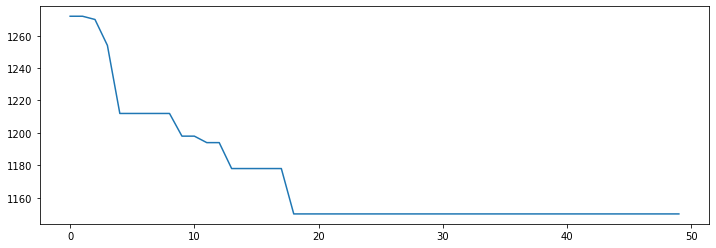

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 1150.0 
 best_permutation: [11  4  5 14  9 10  6 13  2  3  8  7 12  1  0]


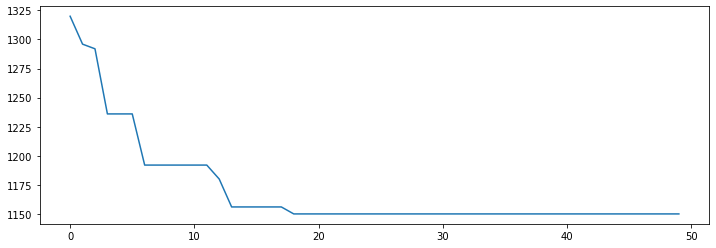

 population_size = 5000 
 crossover_probability = 0.9 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 1152.0 
 best_permutation: [ 0  1  3 13  5  8 12  2  4 14 10  7  6 11  9]


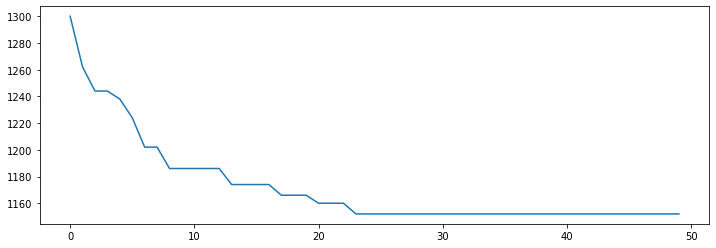

 population_size = 5000 
 crossover_probability = 0.9 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 1160.0 
 best_permutation: [ 3 13  2  4 14  1 12  7  6  5  0  8 10 11  9]


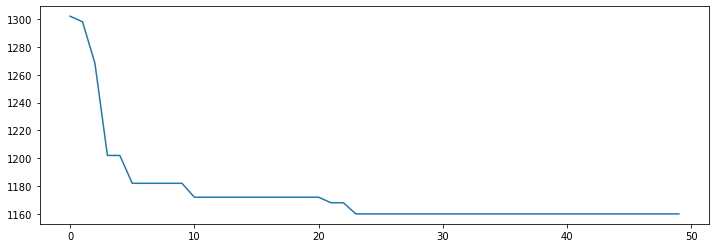

In [66]:
flow_matr = Nug15_A
dist_matr = Nug15_B
n = Nug15_n
population_size = [5000]
crossover_probability = [0.95, 0.9]
mutation_probability = [0.25, 0.3]
number_of_iterations = [50]
crossover = [PMX]
mutation = [reverse_sequence_mutation]
locality = [local_search]
locality_probablility = [0.01]
ks=[2]
transparent = False

for (pop, cross, mut, n_it, cro, mu, loc, loc_prob, k) in itertools.product(population_size, crossover_probability, 
            mutation_probability, number_of_iterations, crossover, mutation, locality, locality_probablility, ks):
    best_p, costs = SGA_qap(n, flow_matr, dist_matr, population_size=pop, crossover_probability=cross, 
            mutation_probability=mut, number_of_iterations=n_it, mutation=mu, crossover=cro, locality=loc, 
            locality_probablility=loc_prob, k=k, transparent=transparent)
    print(" population_size =", pop, "\n crossover_probability =", cross,
          "\n mutation_probability =", mut, "\n number_of_iterations =", n_it,
          "\n tsp_objective_function:", qap_objective_function(best_p, n, flow_matr, dist_matr), 
          "\n best_permutation:", best_p)
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()

# Nug16a 1610

In [67]:
# 1610
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug16a.dat'
Nug16a_n, Nug16a_A, Nug16a_B = get_next_instance(QAP_INSTANCE_URL)

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 1610.0 
 best_permutation: [ 8 13  1 14 15  2  9 11  7 10  5  4  6  0  3 12]


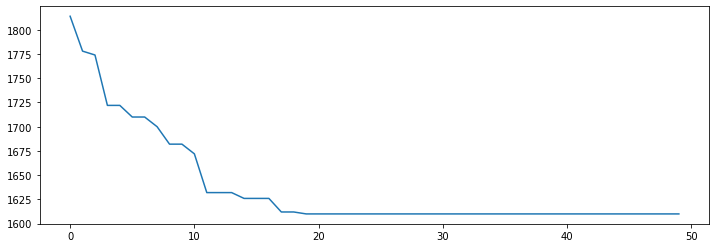

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 1632.0 
 best_permutation: [ 9  2 11 13  8  4  0  7 10 15  5  6 14  1  3 12]


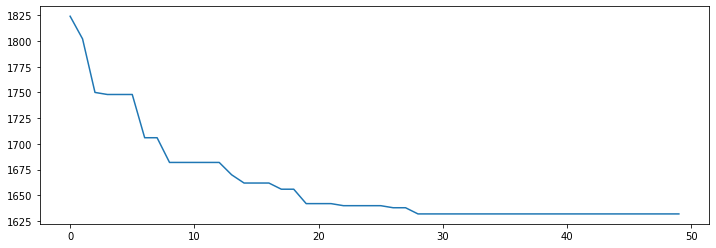

 population_size = 5000 
 crossover_probability = 0.9 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 1612.0 
 best_permutation: [ 8  9 11 13 15  2  0  7 14 10  5  4  6  1  3 12]


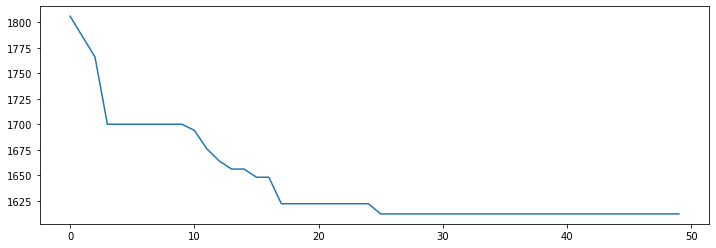

 population_size = 5000 
 crossover_probability = 0.9 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 1632.0 
 best_permutation: [ 0  6  4  2  5  7 11 14  9 12 10  3  1 13  8 15]


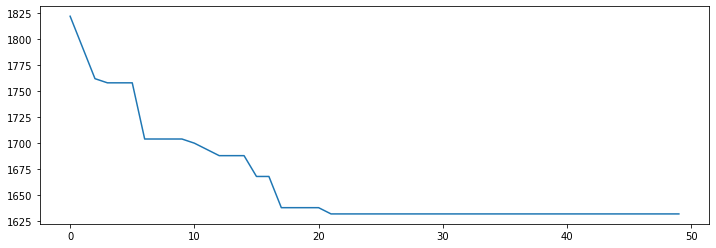

In [68]:
flow_matr = Nug16a_A
dist_matr = Nug16a_B
n = Nug16a_n
population_size = [5000]
crossover_probability = [0.95, 0.9]
mutation_probability = [0.25, 0.3]
number_of_iterations = [50]
crossover = [PMX]
mutation = [reverse_sequence_mutation]
locality = [local_search]
locality_probablility = [0.01]
ks=[2]
transparent = False

for (pop, cross, mut, n_it, cro, mu, loc, loc_prob, k) in itertools.product(population_size, crossover_probability, 
            mutation_probability, number_of_iterations, crossover, mutation, locality, locality_probablility, ks):
    best_p, costs = SGA_qap(n, flow_matr, dist_matr, population_size=pop, crossover_probability=cross, 
            mutation_probability=mut, number_of_iterations=n_it, mutation=mu, crossover=cro, locality=loc, 
            locality_probablility=loc_prob, k=k, transparent=transparent)
    print(" population_size =", pop, "\n crossover_probability =", cross,
          "\n mutation_probability =", mut, "\n number_of_iterations =", n_it,
          "\n tsp_objective_function:", qap_objective_function(best_p, n, flow_matr, dist_matr), 
          "\n best_permutation:", best_p)
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()

# Nug16b 1240

In [70]:
# 1240
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug16b.dat'
Nug16b_n, Nug16b_A, Nug16b_B = get_next_instance(QAP_INSTANCE_URL)

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 1240.0 
 best_permutation: [13 14  3 15  5  9  1 11  0  6  8 12  4  2 10  7]


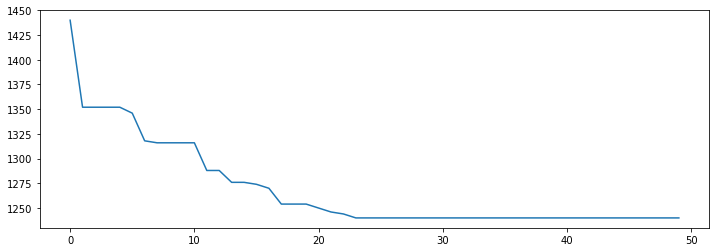

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 1240.0 
 best_permutation: [13 14  3 15  5  9  1 11  0  6  8 12  4  2 10  7]


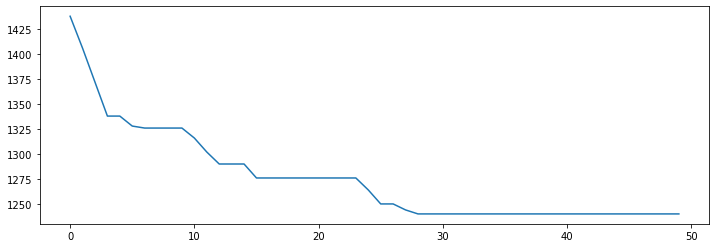

 population_size = 5000 
 crossover_probability = 0.9 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 1240.0 
 best_permutation: [15  3 14 13 11  1  9  5 12  8  6  0  7 10  2  4]


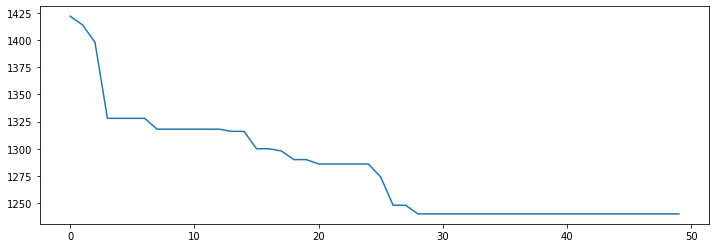

 population_size = 5000 
 crossover_probability = 0.9 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 1264.0 
 best_permutation: [ 7  2 10  4 11  1  9  5 12  3  8  0 15 14  6 13]


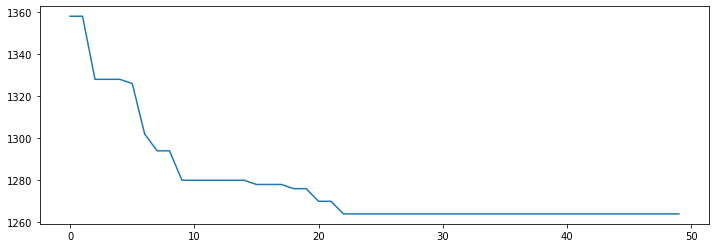

In [71]:
flow_matr = Nug16b_A
dist_matr = Nug16b_B
n = Nug16b_n
population_size = [5000]
crossover_probability = [0.95, 0.9]
mutation_probability = [0.25, 0.3]
number_of_iterations = [50]
crossover = [PMX]
mutation = [reverse_sequence_mutation]
locality = [local_search]
locality_probablility = [0.01]
ks=[2]
transparent = False

for (pop, cross, mut, n_it, cro, mu, loc, loc_prob, k) in itertools.product(population_size, crossover_probability, 
            mutation_probability, number_of_iterations, crossover, mutation, locality, locality_probablility, ks):
    best_p, costs = SGA_qap(n, flow_matr, dist_matr, population_size=pop, crossover_probability=cross, 
            mutation_probability=mut, number_of_iterations=n_it, mutation=mu, crossover=cro, locality=loc, 
            locality_probablility=loc_prob, k=k, transparent=transparent)
    print(" population_size =", pop, "\n crossover_probability =", cross,
          "\n mutation_probability =", mut, "\n number_of_iterations =", n_it,
          "\n tsp_objective_function:", qap_objective_function(best_p, n, flow_matr, dist_matr), 
          "\n best_permutation:", best_p)
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()

# Nug17 1732

In [72]:
# 1732
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug17.dat'
Nug17_n, Nug17_A, Nug17_B = get_next_instance(QAP_INSTANCE_URL)

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 1758.0 
 best_permutation: [ 0  6  4  5 12  7 11 14  9  2 15 10  1 13  8 16  3]


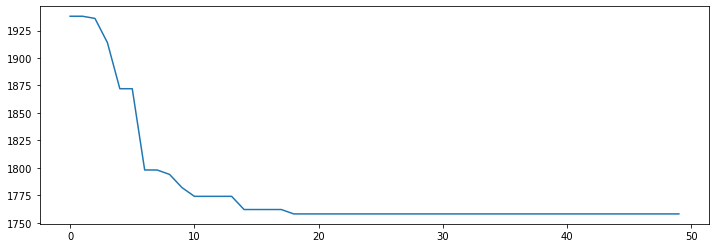

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 1744.0 
 best_permutation: [ 5 12  9  2  8  4  6 11  1 13  0 10  7 14 15 16  3]


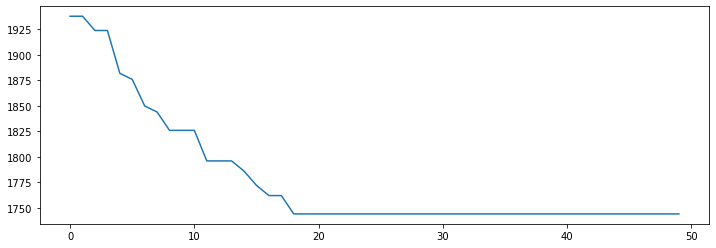

 population_size = 5000 
 crossover_probability = 0.9 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 1742.0 
 best_permutation: [15  1 13  2  8  7 14 11  9  5 10  0  6  4 12 16  3]


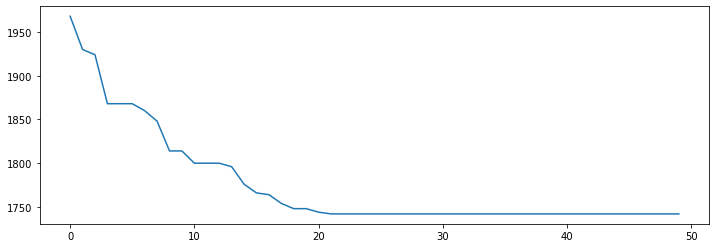

 population_size = 5000 
 crossover_probability = 0.9 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 1738.0 
 best_permutation: [ 8  9 11 13 15  2  0  7 14 10  5  4  6  1  3 12 16]


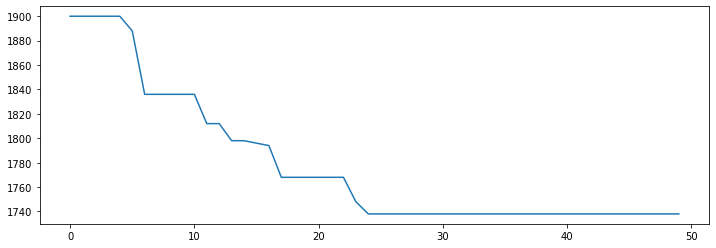

In [73]:
flow_matr = Nug17_A
dist_matr = Nug17_B
n = Nug17_n
population_size = [5000]
crossover_probability = [0.95, 0.9]
mutation_probability = [0.25, 0.3]
number_of_iterations = [50]
crossover = [PMX]
mutation = [reverse_sequence_mutation]
locality = [local_search]
locality_probablility = [0.01]
ks=[2]
transparent = False

for (pop, cross, mut, n_it, cro, mu, loc, loc_prob, k) in itertools.product(population_size, crossover_probability, 
            mutation_probability, number_of_iterations, crossover, mutation, locality, locality_probablility, ks):
    best_p, costs = SGA_qap(n, flow_matr, dist_matr, population_size=pop, crossover_probability=cross, 
            mutation_probability=mut, number_of_iterations=n_it, mutation=mu, crossover=cro, locality=loc, 
            locality_probablility=loc_prob, k=k, transparent=transparent)
    print(" population_size =", pop, "\n crossover_probability =", cross,
          "\n mutation_probability =", mut, "\n number_of_iterations =", n_it,
          "\n tsp_objective_function:", qap_objective_function(best_p, n, flow_matr, dist_matr), 
          "\n best_permutation:", best_p)
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()

  0     6.66027284 1956.00000000 2231.73120000 2310.00000000  58.85414978
  1    13.02791667 1890.00000000 2174.25760000 2240.00000000  53.03489457
  2    19.08499098 1890.00000000 2131.11760000 2194.00000000  49.38860365
  3    26.01105332 1848.00000000 2095.05400000 2154.00000000  46.08222525
  4    32.41669774 1848.00000000 2064.63720000 2118.00000000  43.02698196
  5    38.39378643 1848.00000000 2040.01320000 2092.00000000  40.55503700
  6    44.26817036 1848.00000000 2018.70640000 2068.00000000  38.32031575
  7    50.92440081 1832.00000000 2000.24800000 2046.00000000  36.76836814
  8    57.41265440 1804.00000000 1982.50640000 2028.00000000  36.10120717
  9    64.34477377 1804.00000000 1965.91080000 2010.00000000  34.90000635
 10    70.85256505 1804.00000000 1950.30880000 1992.00000000  33.58400576
 11    77.59269094 1804.00000000 1936.70600000 1978.00000000  32.36111191
 12    84.09530210 1804.00000000 1923.04160000 1964.00000000  31.83710837
 13    90.13807464 1796.00000000 1909.

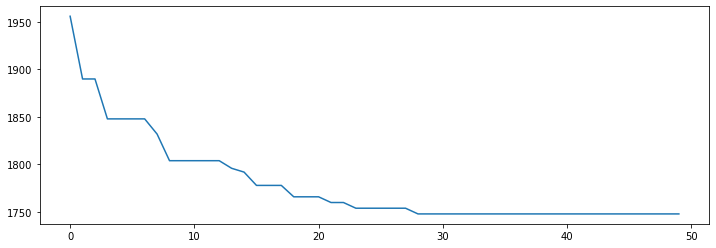

  0     6.66348052 1912.00000000 2233.07920000 2314.00000000  59.31819390
  1    12.85787606 1912.00000000 2177.10760000 2244.00000000  52.67718692
  2    19.33159995 1890.00000000 2134.96120000 2196.00000000  49.12270447
  3    26.56124878 1890.00000000 2100.49840000 2158.00000000  46.14848640
  4    33.35512757 1834.00000000 2071.67600000 2126.00000000  43.96826838
  5    39.48131347 1832.00000000 2046.43160000 2098.00000000  41.48763818
  6    46.35301876 1832.00000000 2023.09840000 2072.00000000  40.35125670
  7    52.63461280 1832.00000000 2003.24400000 2052.00000000  38.75863341
  8    58.81623149 1812.00000000 1985.20000000 2032.00000000  38.07867645
  9    65.43269014 1812.00000000 1967.83760000 2014.00000000  36.81570353
 10    71.65010619 1806.00000000 1951.50400000 1996.00000000  35.77181550
 11    78.82645512 1782.00000000 1937.48480000 1980.00000000  34.55271001
 12    85.80907631 1782.00000000 1923.38320000 1966.00000000  33.24669544
 13    91.94182825 1782.00000000 1910.

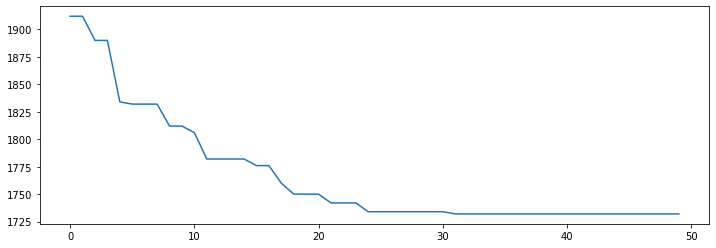

  0     8.27508473 1950.00000000 2233.00720000 2310.00000000  58.29740259
  1    15.57803154 1894.00000000 2173.29400000 2240.00000000  53.94877537
  2    22.80586600 1884.00000000 2127.93400000 2192.00000000  50.31614894
  3    30.31654143 1868.00000000 2091.64760000 2150.00000000  46.71287418
  4    37.19329023 1868.00000000 2060.01560000 2116.00000000  44.82960357
  5    43.90372729 1856.00000000 2032.75720000 2086.00000000  42.43483767
  6    50.74920630 1856.00000000 2008.66760000 2060.00000000  40.88158400
  7    57.46078730 1830.00000000 1986.47800000 2036.00000000  39.00095789
  8    64.11902022 1818.00000000 1967.10280000 2014.00000000  37.03249157
  9    71.45344567 1818.00000000 1948.16560000 1994.00000000  34.67238349
 10    78.43209291 1784.00000000 1930.57320000 1974.00000000  32.38019521
 11    85.03010535 1778.00000000 1914.83920000 1958.00000000  29.58593827
 12    92.36065316 1778.00000000 1900.39880000 1938.00000000  26.26630082
 13    99.22389293 1778.00000000 1887.

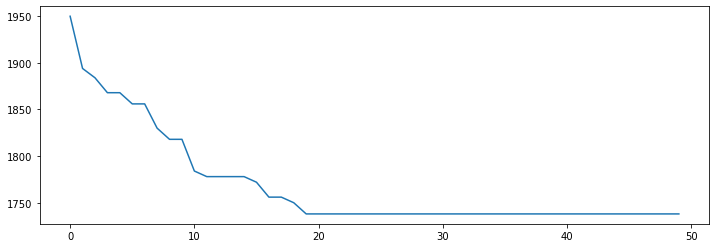

  0     6.85561514 1958.00000000 2231.87160000 2310.00000000  58.04404115
  1    14.22194862 1932.00000000 2173.44200000 2240.00000000  51.78535542
  2    20.10984254 1914.00000000 2132.82520000 2194.00000000  49.05466181
  3    26.24189496 1906.00000000 2097.63120000 2154.00000000  46.32711503
  4    32.52680469 1884.00000000 2067.01760000 2122.00000000  43.87168210
  5    39.33477640 1842.00000000 2041.05720000 2094.00000000  41.42574958
  6    45.91017318 1842.00000000 2017.76600000 2068.00000000  39.06217152
  7    52.57176661 1806.00000000 1997.74720000 2046.00000000  36.84336700
  8    58.82407570 1806.00000000 1980.33480000 2026.00000000  34.58736054
  9    65.84463000 1806.00000000 1964.22760000 2008.00000000  33.00596610
 10    72.85103655 1806.00000000 1949.03920000 1990.00000000  32.20414978
 11    79.90317154 1806.00000000 1935.35800000 1974.00000000  31.70385207
 12    86.17443776 1796.00000000 1921.50840000 1960.00000000  31.50531272
 13    92.58981633 1776.00000000 1908.

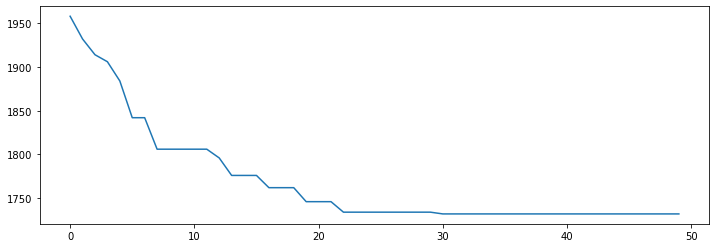

In [79]:
flow_matr = Nug17_A
dist_matr = Nug17_B
n = Nug17_n
population_size = [5000]
crossover_probability = [0.95, 0.9]
mutation_probability = [0.25, 0.3]
number_of_iterations = [50]
crossover = [PMX]
mutation = [reverse_sequence_mutation]
locality = [local_search]
locality_probablility = [0.05]
ks=[2]
transparent = True

for (pop, cross, mut, n_it, cro, mu, loc, loc_prob, k) in itertools.product(population_size, crossover_probability, 
            mutation_probability, number_of_iterations, crossover, mutation, locality, locality_probablility, ks):
    best_p, costs = SGA_qap(n, flow_matr, dist_matr, population_size=pop, crossover_probability=cross, 
            mutation_probability=mut, number_of_iterations=n_it, mutation=mu, crossover=cro, locality=loc, 
            locality_probablility=loc_prob, k=k, transparent=transparent)
    print(" population_size =", pop, "\n crossover_probability =", cross,
          "\n mutation_probability =", mut, "\n number_of_iterations =", n_it,
          "\n tsp_objective_function:", qap_objective_function(best_p, n, flow_matr, dist_matr), 
          "\n best_permutation:", best_p)
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()

# Nug18 1930

In [74]:
# 1930
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug18.dat'
Nug18_n, Nug18_A, Nug18_B = get_next_instance(QAP_INSTANCE_URL)

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 1938.0 
 best_permutation: [17  1 13  2  8  7 14 11  9  5  3 10  6  4 12 16 15  0]


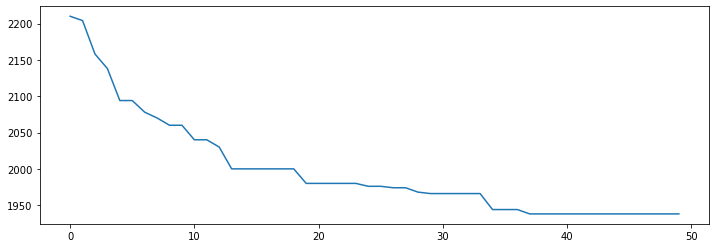

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 1958.0 
 best_permutation: [15 14  1 13  8 10  7 11  9 12  3  0  6  2  5 16 17  4]


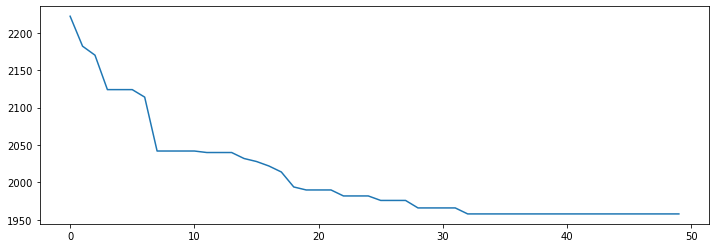

 population_size = 5000 
 crossover_probability = 0.9 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 1946.0 
 best_permutation: [16  6  0  4  5  7 14 11  9 12 17  1 13  2  8  3 10 15]


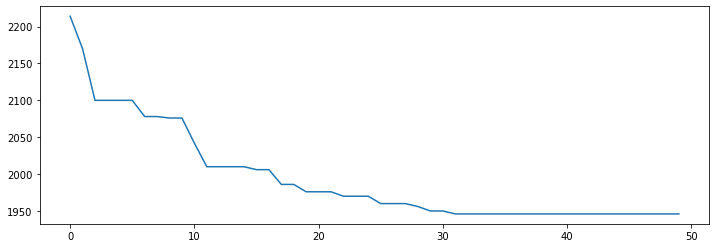

 population_size = 5000 
 crossover_probability = 0.9 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 1942.0 
 best_permutation: [16  4 17  9  5  0  7 14  2 12  6 11  1 13  8  3 10 15]


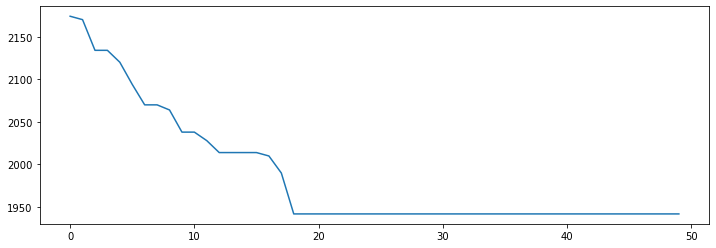

In [75]:
flow_matr = Nug18_A
dist_matr = Nug18_B
n = Nug18_n
population_size = [5000]
crossover_probability = [0.95, 0.9]
mutation_probability = [0.25, 0.3]
number_of_iterations = [50]
crossover = [PMX]
mutation = [reverse_sequence_mutation]
locality = [local_search]
locality_probablility = [0.01]
ks=[2]
transparent = False

for (pop, cross, mut, n_it, cro, mu, loc, loc_prob, k) in itertools.product(population_size, crossover_probability, 
            mutation_probability, number_of_iterations, crossover, mutation, locality, locality_probablility, ks):
    best_p, costs = SGA_qap(n, flow_matr, dist_matr, population_size=pop, crossover_probability=cross, 
            mutation_probability=mut, number_of_iterations=n_it, mutation=mu, crossover=cro, locality=loc, 
            locality_probablility=loc_prob, k=k, transparent=transparent)
    print(" population_size =", pop, "\n crossover_probability =", cross,
          "\n mutation_probability =", mut, "\n number_of_iterations =", n_it,
          "\n tsp_objective_function:", qap_objective_function(best_p, n, flow_matr, dist_matr), 
          "\n best_permutation:", best_p)
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 1936.0 
 best_permutation: [16  0  6  4  5 10  7 11  9 12  3 14  1  2  8 15 17 13]


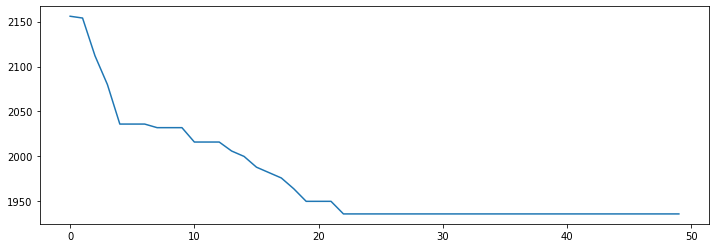

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 1938.0 
 best_permutation: [17  1 13  2  8  7 14 11  9  5  3 10  6  4 12 16 15  0]


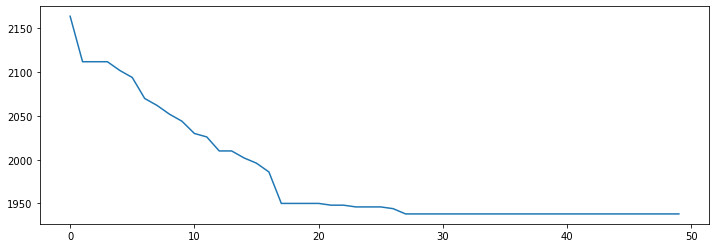

 population_size = 5000 
 crossover_probability = 0.9 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 1954.0 
 best_permutation: [16  6  0  4  5 17  7 14  2 12  1 11 13  9  8  3 10 15]


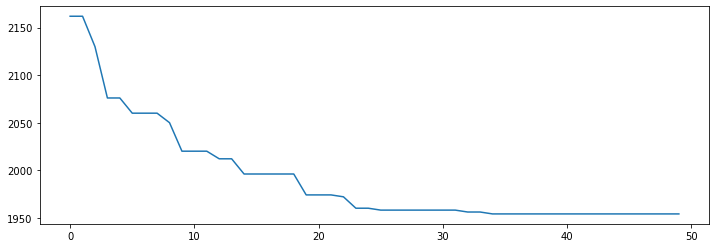

 population_size = 5000 
 crossover_probability = 0.9 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 1936.0 
 best_permutation: [16  0  6  4  5 10  7 11  9 12 15 14 13  2  8  3 17  1]


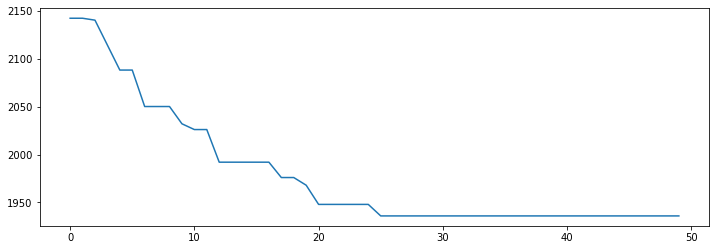

In [80]:
flow_matr = Nug18_A
dist_matr = Nug18_B
n = Nug18_n
population_size = [5000]
crossover_probability = [0.95, 0.9]
mutation_probability = [0.25, 0.3]
number_of_iterations = [50]
crossover = [PMX]
mutation = [reverse_sequence_mutation]
locality = [local_search]
locality_probablility = [0.05]
ks=[2]
transparent = False

for (pop, cross, mut, n_it, cro, mu, loc, loc_prob, k) in itertools.product(population_size, crossover_probability, 
            mutation_probability, number_of_iterations, crossover, mutation, locality, locality_probablility, ks):
    best_p, costs = SGA_qap(n, flow_matr, dist_matr, population_size=pop, crossover_probability=cross, 
            mutation_probability=mut, number_of_iterations=n_it, mutation=mu, crossover=cro, locality=loc, 
            locality_probablility=loc_prob, k=k, transparent=transparent)
    print(" population_size =", pop, "\n crossover_probability =", cross,
          "\n mutation_probability =", mut, "\n number_of_iterations =", n_it,
          "\n tsp_objective_function:", qap_objective_function(best_p, n, flow_matr, dist_matr), 
          "\n best_permutation:", best_p)
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()

 population_size = 5000 
 crossover_probability = 0.975 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 1952.0 
 best_permutation: [ 0  6  4  5 12  7 11 14  9  2 15 10  1 13  8 16  3 17]


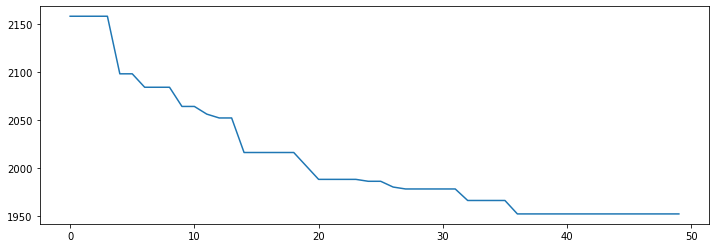

 population_size = 5000 
 crossover_probability = 0.975 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 1930.0 
 best_permutation: [ 8  2  9  5 12 13  1 11  6  4 17 14  7  0 16 15  3 10]


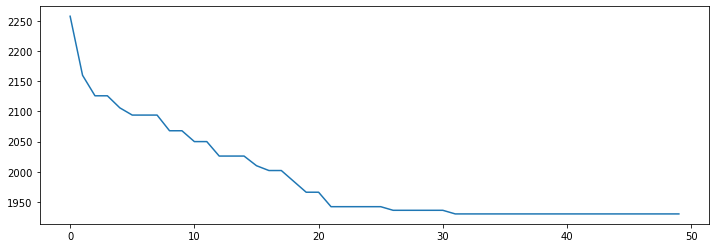

 population_size = 5000 
 crossover_probability = 0.975 
 mutation_probability = 0.35 
 number_of_iterations = 50 
 tsp_objective_function: 1930.0 
 best_permutation: [ 9  2 13  1 17  5  6 11 14  3  4  0 10  7 16 12  8 15]


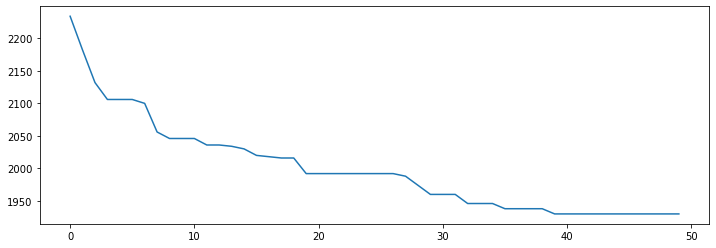

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 1950.0 
 best_permutation: [16  0  6  4 12 10  7 11  9  5  3 14  1  2  8 15 17 13]


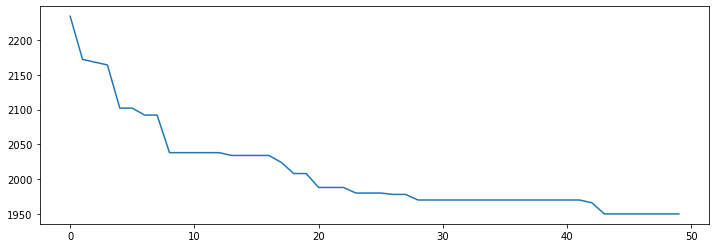

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 1964.0 
 best_permutation: [ 8 15 10  1  3  2  9 11 13 17 12  0  7 14 16  5  4  6]


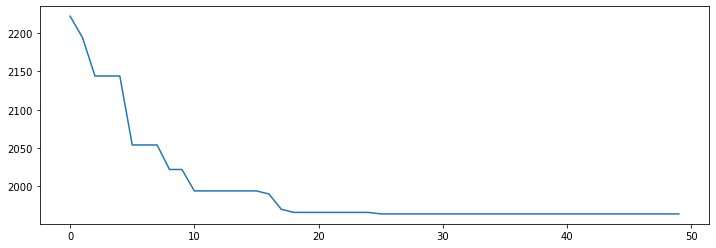

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.35 
 number_of_iterations = 50 
 tsp_objective_function: 1986.0 
 best_permutation: [ 8  9 13 10 15 12  6  1 11  3  4  0 14  7 16  5  2 17]


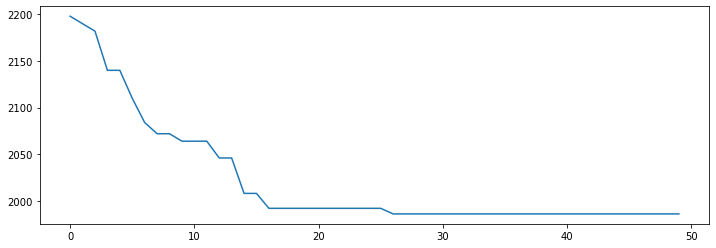

 population_size = 5000 
 crossover_probability = 0.925 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 1978.0 
 best_permutation: [16  7  4  5 12  3 14  6  0  2 10  1 11  9  8 15 17 13]


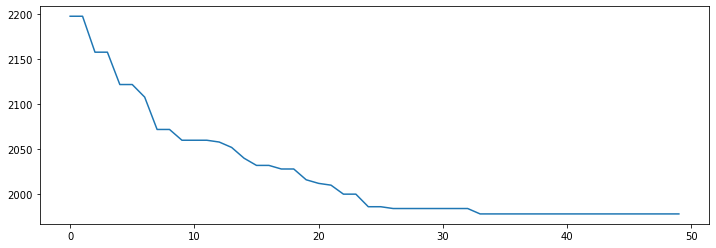

 population_size = 5000 
 crossover_probability = 0.925 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 1950.0 
 best_permutation: [ 2 17  9  4  5  8 14  7  0 12 13  1 11  6 16 15  3 10]


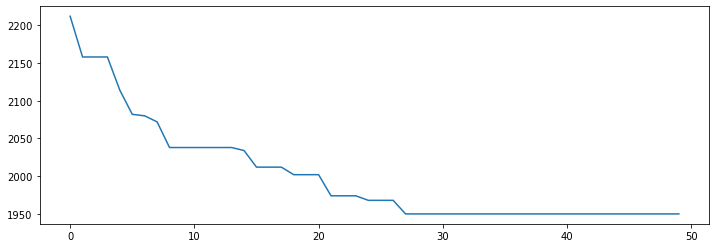

 population_size = 5000 
 crossover_probability = 0.925 
 mutation_probability = 0.35 
 number_of_iterations = 50 
 tsp_objective_function: 1972.0 
 best_permutation: [16  6  4  5 12  7  0 17  9  2 14 11  1 13  8  3 10 15]


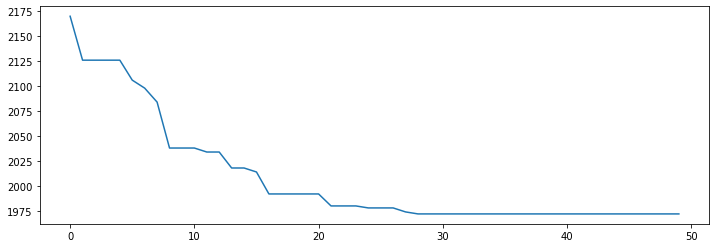

 population_size = 5000 
 crossover_probability = 0.9 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 1954.0 
 best_permutation: [15  0 13  2  8 10  6 11  9  5  7 14  1  4 12 16  3 17]


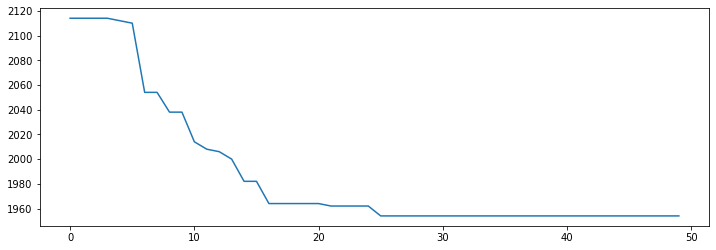

 population_size = 5000 
 crossover_probability = 0.9 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 1982.0 
 best_permutation: [ 2  9 11 13 17  0  6  7 14 16  5  4 10  1  3 12  8 15]


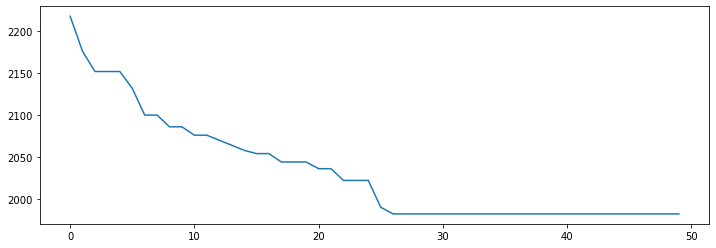

 population_size = 5000 
 crossover_probability = 0.9 
 mutation_probability = 0.35 
 number_of_iterations = 50 
 tsp_objective_function: 1964.0 
 best_permutation: [16 17  1 14  3  4  0  6  7 10  5  9 13 11 15 12  2  8]


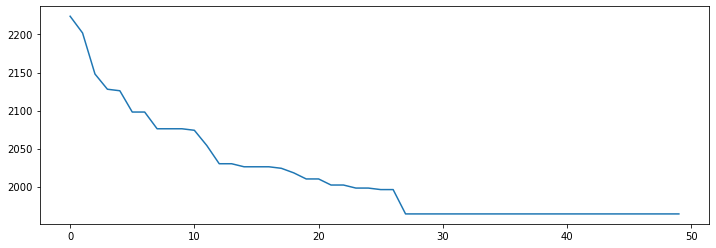

 population_size = 5000 
 crossover_probability = 0.85 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 1980.0 
 best_permutation: [ 4 12  5  9  8  0  6 11 13  2  7 10 14  1 15 16  3 17]


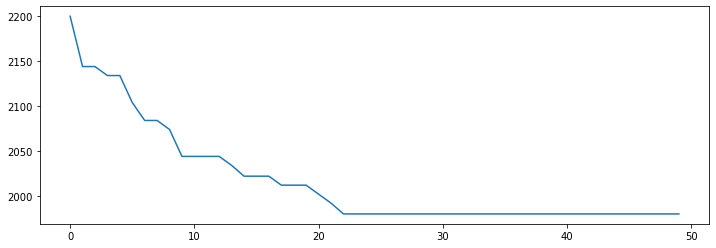

 population_size = 5000 
 crossover_probability = 0.85 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 1978.0 
 best_permutation: [16  6  4  5 12  7  0 11  9  2 10 14 13 17  8  3 15  1]


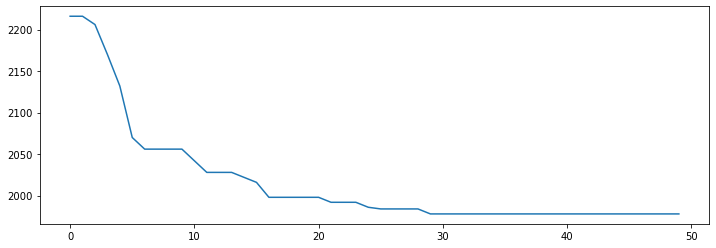

 population_size = 5000 
 crossover_probability = 0.85 
 mutation_probability = 0.35 
 number_of_iterations = 50 
 tsp_objective_function: 1950.0 
 best_permutation: [ 8 13 11 10 15 17  1 14  7  3  2  9  6  0 16 12  5  4]


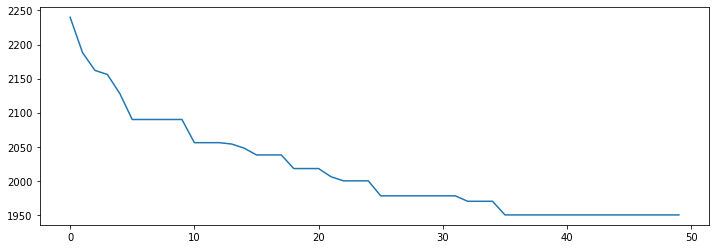

In [87]:
flow_matr = Nug18_A
dist_matr = Nug18_B
n = Nug18_n
population_size = [5000]
crossover_probability = [0.975, 0.95, 0.925, 0.9, 0.85]
mutation_probability = [0.25, 0.3, 0.35]
number_of_iterations = [50]
crossover = [PMX]
mutation = [reverse_sequence_mutation]
locality = [local_search]
locality_probablility = [0.00]
ks=[2]
transparent = False

for (pop, cross, mut, n_it, cro, mu, loc, loc_prob, k) in itertools.product(population_size, crossover_probability, 
            mutation_probability, number_of_iterations, crossover, mutation, locality, locality_probablility, ks):
    best_p, costs = SGA_qap(n, flow_matr, dist_matr, population_size=pop, crossover_probability=cross, 
            mutation_probability=mut, number_of_iterations=n_it, mutation=mu, crossover=cro, locality=loc, 
            locality_probablility=loc_prob, k=k, transparent=transparent)
    print(" population_size =", pop, "\n crossover_probability =", cross,
          "\n mutation_probability =", mut, "\n number_of_iterations =", n_it,
          "\n tsp_objective_function:", qap_objective_function(best_p, n, flow_matr, dist_matr), 
          "\n best_permutation:", best_p)
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()

# Nug20 2570

In [81]:
# 2570
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug20.dat'
Nug20_n, Nug20_A, Nug20_B = get_next_instance(QAP_INSTANCE_URL)

 population_size = 5000 
 crossover_probability = 0.975 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 2594.0 
 best_permutation: [ 2 17  9  0 16 13  1 11  6  4  8 14  7 19  5 15 18 10  3 12]


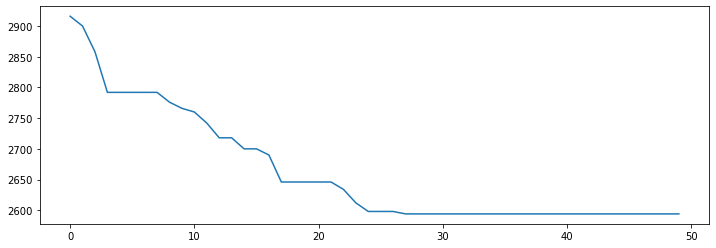

 population_size = 5000 
 crossover_probability = 0.975 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 2602.0 
 best_permutation: [15  3 10  7 16 18  1 14 19  4 13 17 11  6  0  8  2  9 12  5]


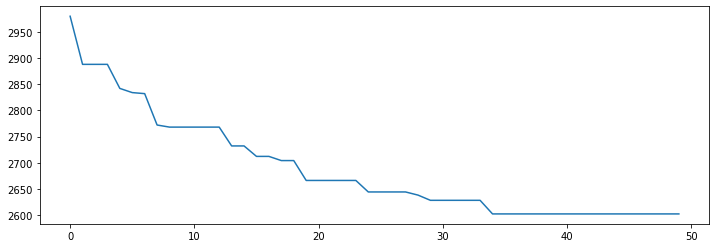

 population_size = 5000 
 crossover_probability = 0.975 
 mutation_probability = 0.35 
 number_of_iterations = 50 
 tsp_objective_function: 2634.0 
 best_permutation: [17 13  9  2  8 18  1 11  6  5  3 14 10 19 12 16 15  7  0  4]


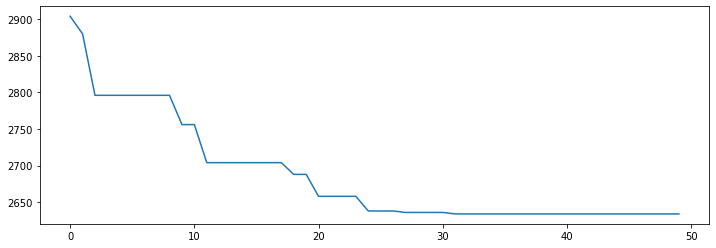

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 2612.0 
 best_permutation: [15 10  7  0  8 17 13 11  9  2  3  1 14  6  5 16 18 19  4 12]


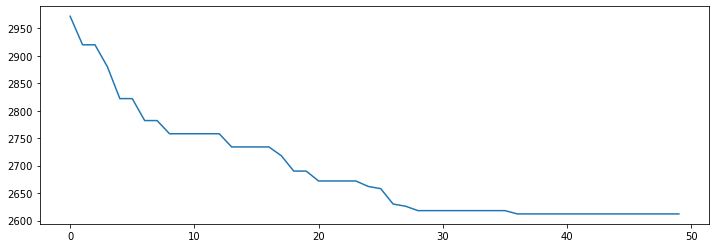

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 2626.0 
 best_permutation: [16  6  4  0  5 14 19 11  7 12 18  1 13 10 15 17  3  9  2  8]


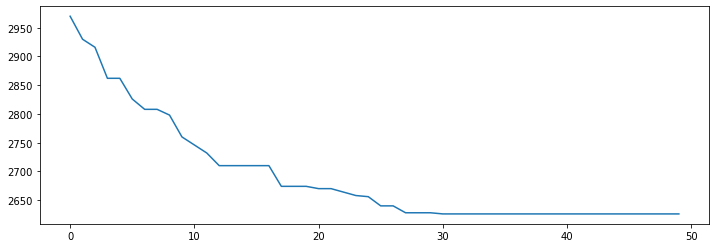

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.35 
 number_of_iterations = 50 
 tsp_objective_function: 2602.0 
 best_permutation: [ 5  0  9 17  2 12 19  7 14  8  4  6 11  1 13 16  3 10 18 15]


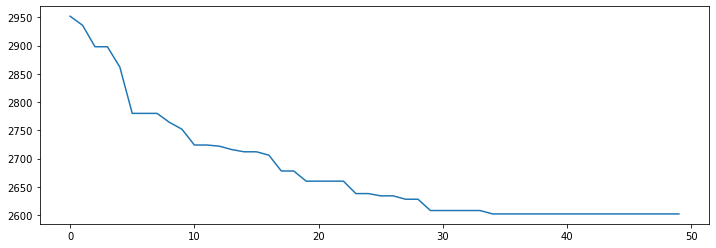

 population_size = 5000 
 crossover_probability = 0.925 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 2574.0 
 best_permutation: [ 8  2 13  1 17 15  9 11 14 18 12 10  7 19  3  5  0  4  6 16]


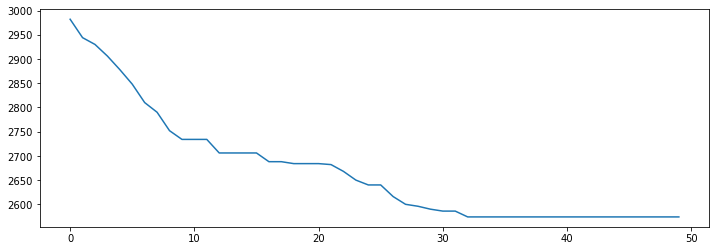

 population_size = 5000 
 crossover_probability = 0.925 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 2604.0 
 best_permutation: [ 2  9  0  5 12  8 13 11  6  4 17  1 14 19  7 15 18 10  3 16]


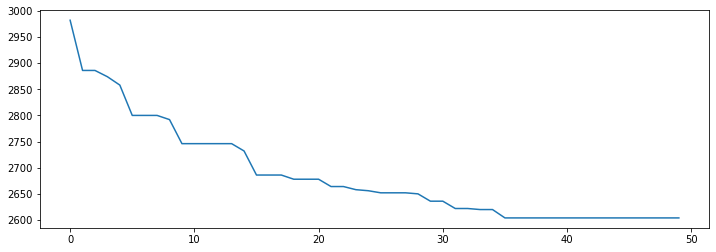

 population_size = 5000 
 crossover_probability = 0.925 
 mutation_probability = 0.35 
 number_of_iterations = 50 
 tsp_objective_function: 2656.0 
 best_permutation: [12  5 19 18  3 15  6 10 14  1  4  0  7 11 16  8  2  9 13 17]


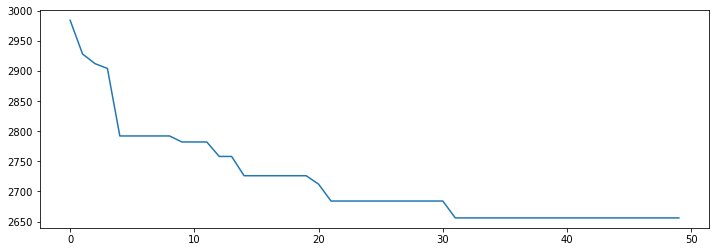

 population_size = 5000 
 crossover_probability = 0.9 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 2618.0 
 best_permutation: [15 13 10  0  8  3  1 11  6 12 18 14  7 19  4 16 17  9  2  5]


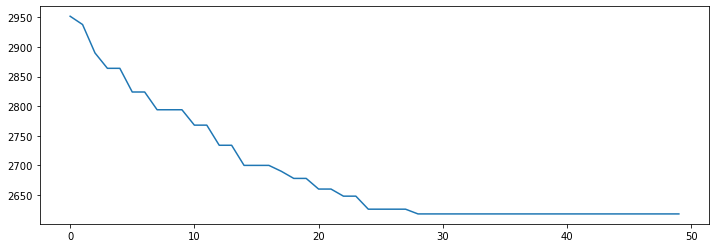

 population_size = 5000 
 crossover_probability = 0.9 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 2684.0 
 best_permutation: [ 2  9 17  4  0  5 13  1  6 11 12 18 14 19  7  8 15  3 10 16]


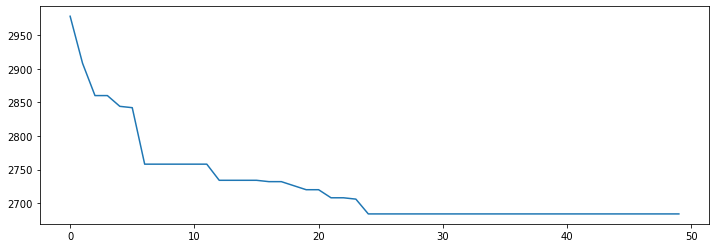

 population_size = 5000 
 crossover_probability = 0.9 
 mutation_probability = 0.35 
 number_of_iterations = 50 
 tsp_objective_function: 2650.0 
 best_permutation: [12  0 10 15  8  5  7 11 13  9  4 19 14  1 18 16  6  3 17  2]


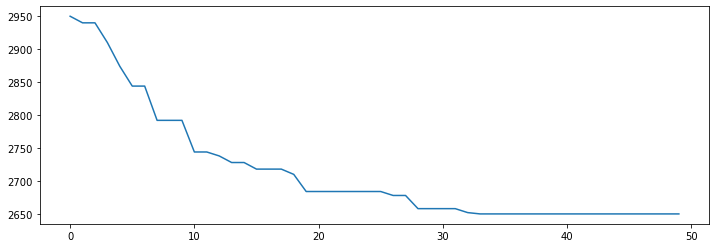

In [89]:
flow_matr = Nug20_A
dist_matr = Nug20_B
n = Nug20_n
population_size = [5000]
crossover_probability = [0.975, 0.95, 0.925, 0.9]
mutation_probability = [0.25, 0.3, 0.35]
number_of_iterations = [50]
crossover = [PMX]
mutation = [reverse_sequence_mutation]
locality = [local_search]
locality_probablility = [0.00]
ks=[2]
transparent = False

for (pop, cross, mut, n_it, cro, mu, loc, loc_prob, k) in itertools.product(population_size, crossover_probability, 
            mutation_probability, number_of_iterations, crossover, mutation, locality, locality_probablility, ks):
    best_p, costs = SGA_qap(n, flow_matr, dist_matr, population_size=pop, crossover_probability=cross, 
            mutation_probability=mut, number_of_iterations=n_it, mutation=mu, crossover=cro, locality=loc, 
            locality_probablility=loc_prob, k=k, transparent=transparent)
    print(" population_size =", pop, "\n crossover_probability =", cross,
          "\n mutation_probability =", mut, "\n number_of_iterations =", n_it,
          "\n tsp_objective_function:", qap_objective_function(best_p, n, flow_matr, dist_matr), 
          "\n best_permutation:", best_p)
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()

 population_size = 5000 
 crossover_probability = 0.975 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 2632.0 
 best_permutation: [ 5  4  7 18 16 12 19 14  1  3  8  6 11 13 17  2  0  9 10 15]


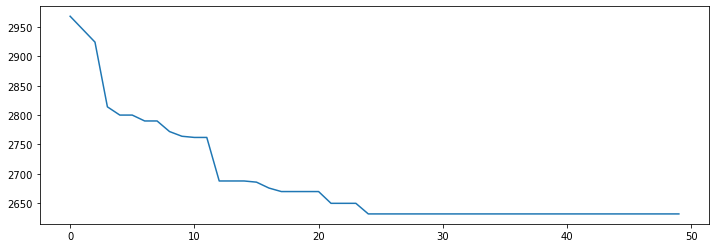

 population_size = 5000 
 crossover_probability = 0.975 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 2662.0 
 best_permutation: [ 3 15 10 12  8 18 19  7  4  5  1 14 11  6  9 16 17 13  0  2]


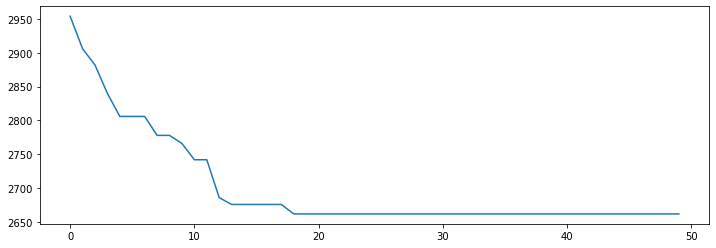

 population_size = 5000 
 crossover_probability = 0.975 
 mutation_probability = 0.35 
 number_of_iterations = 50 
 tsp_objective_function: 2646.0 
 best_permutation: [ 5  4  6  0 16  2  9 11  7 17 12  1 19 14  3  8 13 18 10 15]


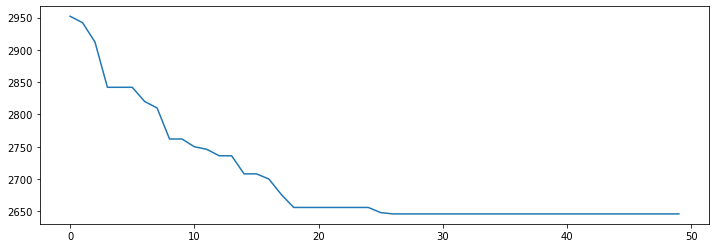

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 2604.0 
 best_permutation: [ 8 15  9 13 17  2 10 11  1 18 12  7 19 14  3  5  0  6  4 16]


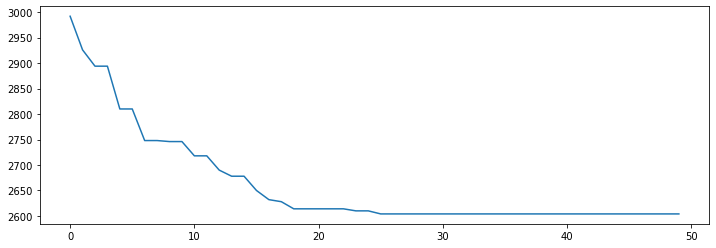

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 2588.0 
 best_permutation: [17 13  9  2  8 18  1 14  4  5  3 11 19  6 12 16 10  7  0 15]


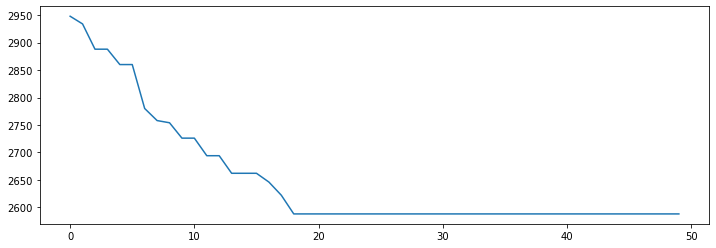

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.35 
 number_of_iterations = 50 
 tsp_objective_function: 2612.0 
 best_permutation: [12 19 18  3  8  5  7 14 10 15  4  6 11  1 13 16  0  9 17  2]


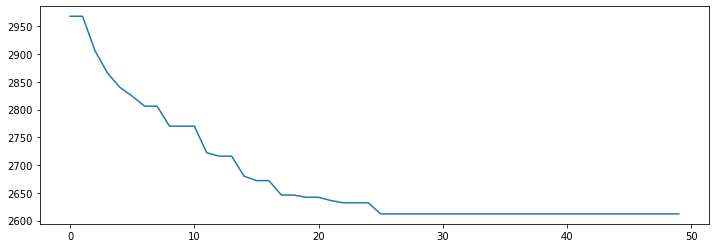

 population_size = 5000 
 crossover_probability = 0.925 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 2636.0 
 best_permutation: [17 18 13  9  2  1 14 19 11  5  3  7 10  6 12 16  4 15  0  8]


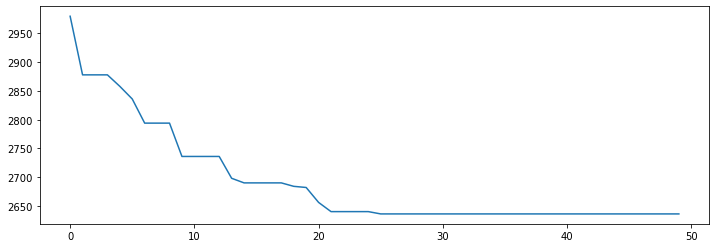

 population_size = 5000 
 crossover_probability = 0.925 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 2664.0 
 best_permutation: [17  1 18  3 16 13  9 11  6  4 15 10 14 19  0  8  2  7  5 12]


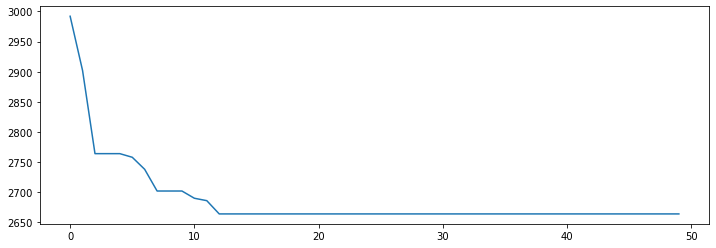

 population_size = 5000 
 crossover_probability = 0.925 
 mutation_probability = 0.35 
 number_of_iterations = 50 
 tsp_objective_function: 2598.0 
 best_permutation: [16  4  7  0 12 18 14 19  6  5  3  1 11 10 15 17 13  9  2  8]


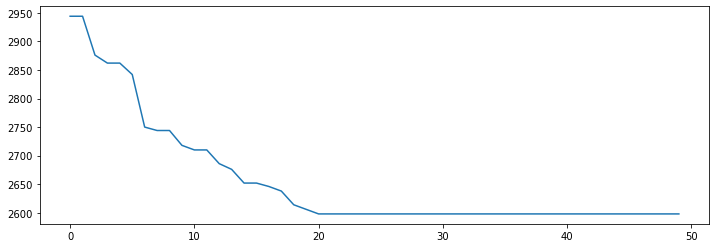

 population_size = 5000 
 crossover_probability = 0.9 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 2600.0 
 best_permutation: [15 17 10  3 16 13  1 14 18  4  8 11  7 19 12  2  9  0  6  5]


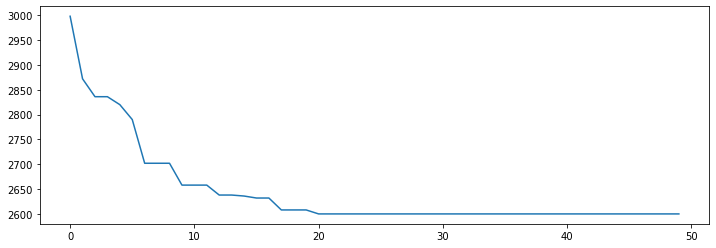

 population_size = 5000 
 crossover_probability = 0.9 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 2604.0 
 best_permutation: [15 17 10  3 16 18 14  7 19  4 13  1 11  6  0  8  2  9  5 12]


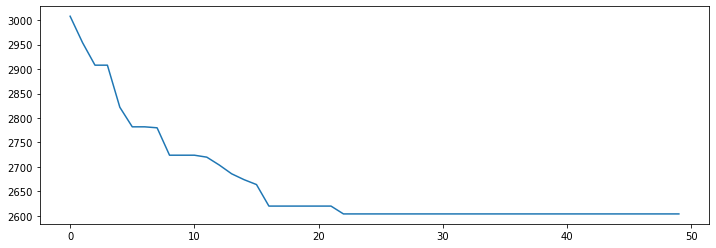

 population_size = 5000 
 crossover_probability = 0.9 
 mutation_probability = 0.35 
 number_of_iterations = 50 
 tsp_objective_function: 2628.0 
 best_permutation: [16  0  6  4  5  7 19 11  9 12 10 14 18 17  2 15  3  1 13  8]


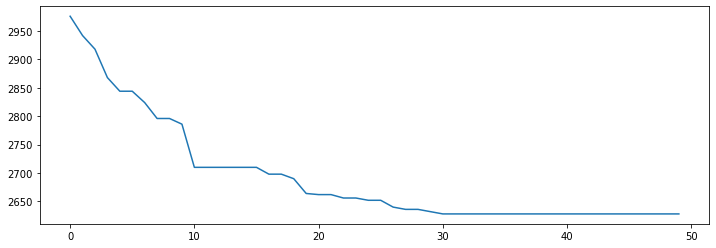

In [90]:
flow_matr = Nug20_A
dist_matr = Nug20_B
n = Nug20_n
population_size = [5000]
crossover_probability = [0.975, 0.95, 0.925, 0.9]
mutation_probability = [0.25, 0.3, 0.35]
number_of_iterations = [50]
crossover = [CX]
mutation = [reverse_sequence_mutation]
locality = [local_search]
locality_probablility = [0.00]
ks=[2]
transparent = False

for (pop, cross, mut, n_it, cro, mu, loc, loc_prob, k) in itertools.product(population_size, crossover_probability, 
            mutation_probability, number_of_iterations, crossover, mutation, locality, locality_probablility, ks):
    best_p, costs = SGA_qap(n, flow_matr, dist_matr, population_size=pop, crossover_probability=cross, 
            mutation_probability=mut, number_of_iterations=n_it, mutation=mu, crossover=cro, locality=loc, 
            locality_probablility=loc_prob, k=k, transparent=transparent)
    print(" population_size =", pop, "\n crossover_probability =", cross,
          "\n mutation_probability =", mut, "\n number_of_iterations =", n_it,
          "\n tsp_objective_function:", qap_objective_function(best_p, n, flow_matr, dist_matr), 
          "\n best_permutation:", best_p)
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 2606.0 
 best_permutation: [16  7  3 10 15 19 14  6 11  0 12 18  1 13  8  5  4 17  9  2]


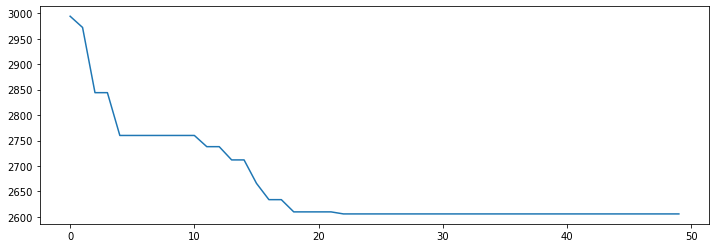

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 2634.0 
 best_permutation: [ 8  9 12  5  2 13 18  1  4 17 11 14 19  6  0 15 10  7  3 16]


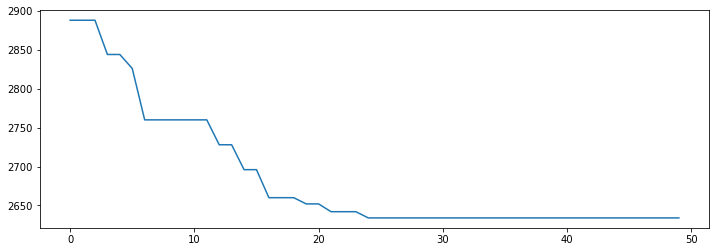

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 2702.0 
 best_permutation: [ 0  6 14 19 15 16 11 18  7 10 17 13  1  3  8  2  9  4  5 12]


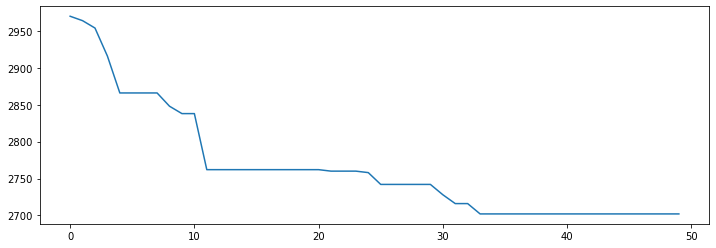

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 2636.0 
 best_permutation: [17  1 18  3 16 13 11 14 19  7  2  9  0  6  4  8 15 10  5 12]


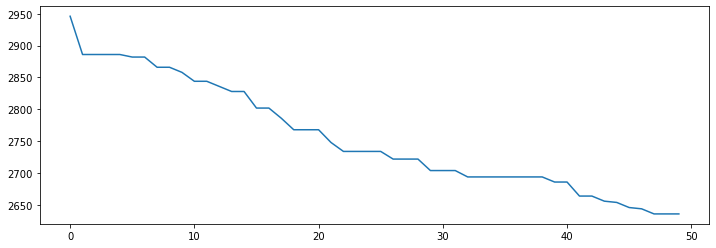

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 2618.0 
 best_permutation: [15 17 13  2  8 10  3  1 18  9  7 11 14 19 12 16  0  6  4  5]


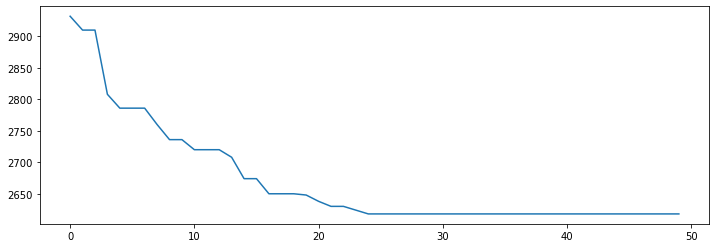

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 2634.0 
 best_permutation: [17 18 14 13 15  3  1 19  7 10  2  9  6 11  0 16  4  5 12  8]


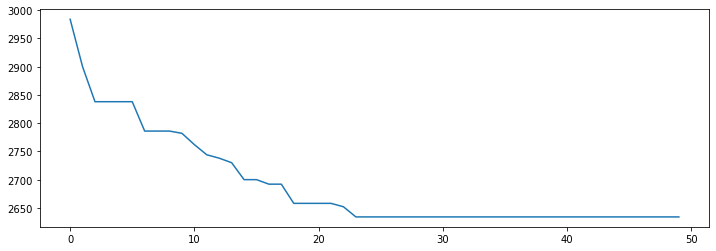

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 2634.0 
 best_permutation: [ 3 18  1 17 16 15 14 13  9  2 10  7 11  4  0  8 19  6 12  5]


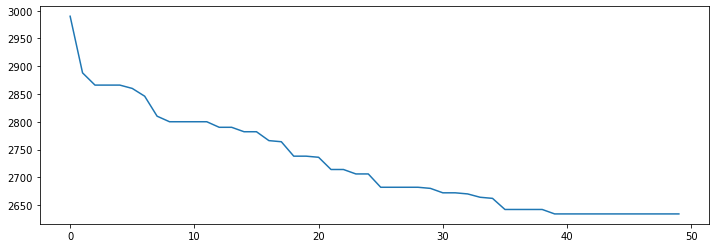

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 2660.0 
 best_permutation: [ 3  1 18 16 17 15 13 14  4  9 10 11 19  7  2  8 12  6  0  5]


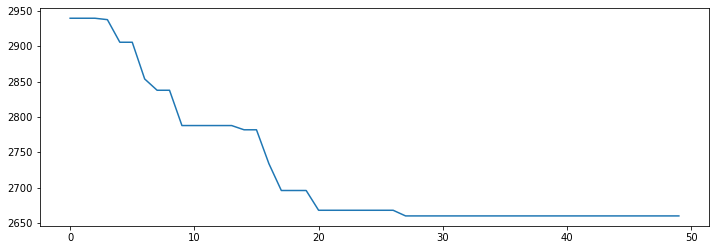

In [93]:
flow_matr = Nug20_A
dist_matr = Nug20_B
n = Nug20_n
population_size = [5000]
crossover_probability = [0.95]
mutation_probability = [0.25]
number_of_iterations = [50]
crossover = [PMX, OX, CX, OBX]
mutation = [transpose_mutation, reverse_sequence_mutation]
locality = [local_search]
locality_probablility = [0.00]
ks=[2]
transparent = False

for (pop, cross, mut, n_it, cro, mu, loc, loc_prob, k) in itertools.product(population_size, crossover_probability, 
            mutation_probability, number_of_iterations, crossover, mutation, locality, locality_probablility, ks):
    best_p, costs = SGA_qap(n, flow_matr, dist_matr, population_size=pop, crossover_probability=cross, 
            mutation_probability=mut, number_of_iterations=n_it, mutation=mu, crossover=cro, locality=loc, 
            locality_probablility=loc_prob, k=k, transparent=transparent)
    print(" population_size =", pop, "\n crossover_probability =", cross,
          "\n mutation_probability =", mut, "\n number_of_iterations =", n_it,
          "\n tsp_objective_function:", qap_objective_function(best_p, n, flow_matr, dist_matr), 
          "\n best_permutation:", best_p)
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()

  0     3.26676941 2976.00000000 3302.39320000 3398.00000000  72.56953489
  1     6.45723438 2924.00000000 3233.65080000 3316.00000000  64.27919461
  2     8.78700161 2876.00000000 3182.59920000 3258.00000000  58.88954542
  3    11.33222938 2844.00000000 3141.00720000 3208.00000000  55.06827715
  4    14.53639698 2844.00000000 3104.85280000 3170.00000000  52.87079281
  5    17.36185431 2830.00000000 3074.57920000 3138.00000000  50.77538505
  6    20.46806884 2808.00000000 3048.00560000 3108.00000000  48.75604546
  7    23.33642840 2808.00000000 3024.22200000 3082.00000000  47.26968919
  8    25.96699309 2766.00000000 3002.98240000 3058.00000000  46.26730693
  9    28.82238984 2748.00000000 2984.27000000 3040.00000000  45.20645861
 10    31.42043781 2748.00000000 2966.54960000 3020.00000000  43.66950812
 11    34.20798159 2748.00000000 2949.51480000 3002.00000000  42.59454168
 12    36.83897924 2748.00000000 2934.17760000 2984.00000000  41.86095625
 13    39.68533087 2748.00000000 2919.

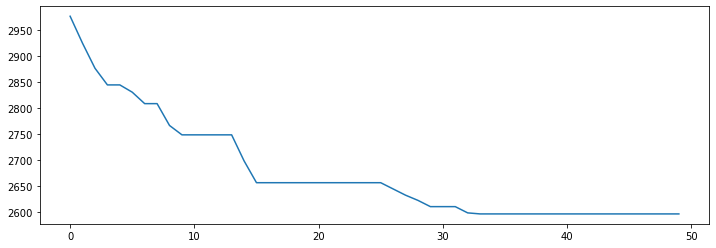

  0     3.24391103 2962.00000000 3301.78800000 3398.00000000  71.87309828
  1     6.46480227 2878.00000000 3234.42200000 3314.00000000  64.38703220
  2     9.29423356 2878.00000000 3182.29600000 3256.00000000  59.74032126
  3    12.35333180 2800.00000000 3141.33200000 3210.00000000  55.89172547
  4    14.90154481 2766.00000000 3106.37040000 3172.00000000  52.83742995
  5    17.80581522 2766.00000000 3076.61840000 3138.00000000  50.71493647
  6    21.12244916 2766.00000000 3051.94000000 3112.00000000  48.44509882
  7    23.58486223 2766.00000000 3030.19080000 3086.00000000  46.96691171
  8    26.27455640 2736.00000000 3007.88800000 3064.00000000  46.60887744
  9    29.32639313 2736.00000000 2988.17480000 3044.00000000  46.15307406
 10    32.00525880 2736.00000000 2969.06720000 3024.00000000  45.92775505
 11    34.96887183 2736.00000000 2950.64960000 3004.00000000  45.11344389
 12    37.51898360 2736.00000000 2933.68280000 2988.00000000  44.74914283
 13    40.10610342 2736.00000000 2916.

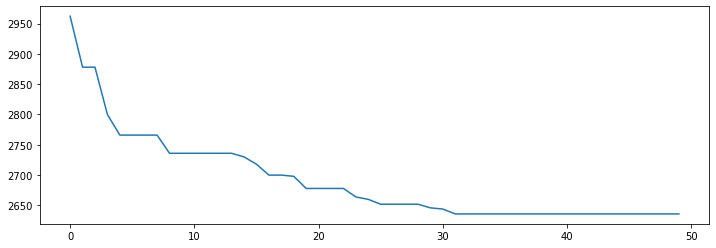

  0     3.23830462 3020.00000000 3302.38920000 3398.00000000  71.92786194
  1     5.68476033 2930.00000000 3235.22760000 3314.00000000  62.45666176
  2     7.95173001 2910.00000000 3183.10120000 3256.00000000  57.31360186
  3    10.65354109 2846.00000000 3141.74200000 3208.00000000  54.43926373
  4    12.85878921 2846.00000000 3107.21360000 3172.00000000  51.37917842
  5    15.31522012 2846.00000000 3077.25920000 3138.00000000  49.53282563
  6    17.98462462 2784.00000000 3049.78920000 3108.00000000  48.11440910
  7    21.21199536 2784.00000000 3026.15480000 3082.00000000  47.34617236
  8    23.69535279 2768.00000000 3002.80480000 3058.00000000  46.40405475
  9    26.39429212 2768.00000000 2980.16320000 3036.00000000  44.86601125
 10    28.82482696 2746.00000000 2959.62840000 3014.00000000  43.84474784
 11    31.77995896 2746.00000000 2941.15480000 2994.00000000  42.26622336
 12    34.55649805 2702.00000000 2922.46760000 2974.00000000  41.77085767
 13    37.31413436 2702.00000000 2904.

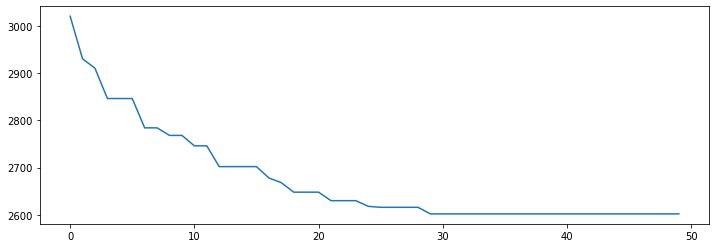

  0     3.23331928 2898.00000000 3301.47480000 3396.00000000  71.14119035
  1     6.11214614 2898.00000000 3234.41160000 3314.00000000  62.71068318
  2    40.88400245 2898.00000000 3183.29000000 3256.00000000  59.15331183
  3    48.19345140 2890.00000000 3141.62840000 3210.00000000  56.16927553
  4    50.40369129 2824.00000000 3106.36280000 3172.00000000  53.70344101
  5    52.68970299 2824.00000000 3075.87840000 3140.00000000  51.12182717
  6    55.61355376 2824.00000000 3049.22320000 3108.00000000  48.53092809
  7    58.51603174 2824.00000000 3025.27160000 3082.00000000  47.21997706
  8    61.37554336 2768.00000000 3002.64160000 3058.00000000  46.26529963
  9    64.33536172 2768.00000000 2982.21600000 3038.00000000  45.25670496
 10    66.90153289 2766.00000000 2963.49000000 3018.00000000  43.75775017
 11    69.05982757 2766.00000000 2947.35720000 3000.00000000  42.73855880
 12    71.64387894 2710.00000000 2931.15080000 2982.00000000  42.10381051
 13    74.20423746 2686.00000000 2914.

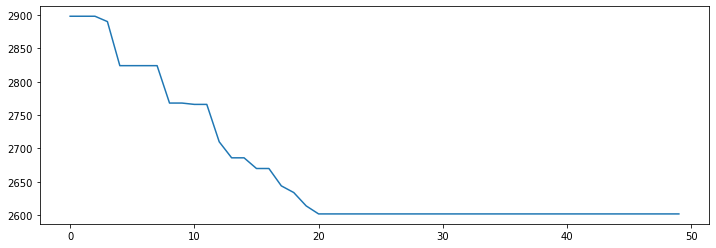

In [98]:
flow_matr = Nug20_A
dist_matr = Nug20_B
n = Nug20_n
population_size = [5000]
crossover_probability = [0.97, 0.95]
mutation_probability = [0.25, 0.3]
number_of_iterations = [50]
crossover = [PMX]
mutation = [reverse_sequence_mutation]
locality = [local_search]
locality_probablility = [0.01]
ks=[2]
transparent = True

for (pop, cross, mut, n_it, cro, mu, loc, loc_prob, k) in itertools.product(population_size, crossover_probability, 
            mutation_probability, number_of_iterations, crossover, mutation, locality, locality_probablility, ks):
    best_p, costs = SGA_qap(n, flow_matr, dist_matr, population_size=pop, crossover_probability=cross, 
            mutation_probability=mut, number_of_iterations=n_it, mutation=mu, crossover=cro, locality=loc, 
            locality_probablility=loc_prob, k=k, transparent=transparent)
    print(" population_size =", pop, "\n crossover_probability =", cross,
          "\n mutation_probability =", mut, "\n number_of_iterations =", n_it,
          "\n tsp_objective_function:", qap_objective_function(best_p, n, flow_matr, dist_matr), 
          "\n best_permutation:", best_p)
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()

  0    43.13669276 2876.00000000 3301.76680000 3398.00000000  72.95147440
  1    82.02113104 2866.00000000 3231.74120000 3314.00000000  65.91618483
  2   124.97856712 2866.00000000 3176.70560000 3252.00000000  62.47280151
  3   176.04672194 2858.00000000 3132.81160000 3206.00000000  59.55466485
  4   217.80536342 2804.00000000 3094.82880000 3164.00000000  56.17264361
  5   258.20492697 2774.00000000 3063.56200000 3130.00000000  54.83754331
  6   301.54669833 2762.00000000 3033.55520000 3098.00000000  53.72873117
  7   353.93995166 2762.00000000 3003.88080000 3068.00000000  53.22298931
  8   389.51688361 2726.00000000 2978.85600000 3042.00000000  51.04409137
  9   430.29625797 2726.00000000 2955.69560000 3016.00000000  48.69926633
 10   472.32210326 2720.00000000 2932.55880000 2990.00000000  46.78668766
 11   516.00513840 2720.00000000 2909.09560000 2966.00000000  45.00551589
 12   551.22300482 2720.00000000 2886.12240000 2942.00000000  41.78982912
 13   591.95282984 2664.00000000 2863.

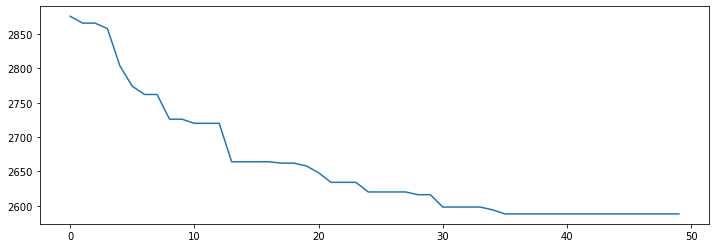

In [97]:
flow_matr = Nug20_A
dist_matr = Nug20_B
n = Nug20_n
population_size = [5000]
crossover_probability = [0.95]
mutation_probability = [0.25]
number_of_iterations = [50]
crossover = [PMX]
mutation = [reverse_sequence_mutation]
locality = [local_search]
locality_probablility = [0.01]
ks=[3]
transparent = True

for (pop, cross, mut, n_it, cro, mu, loc, loc_prob, k) in itertools.product(population_size, crossover_probability, 
            mutation_probability, number_of_iterations, crossover, mutation, locality, locality_probablility, ks):
    best_p, costs = SGA_qap(n, flow_matr, dist_matr, population_size=pop, crossover_probability=cross, 
            mutation_probability=mut, number_of_iterations=n_it, mutation=mu, crossover=cro, locality=loc, 
            locality_probablility=loc_prob, k=k, transparent=transparent)
    print(" population_size =", pop, "\n crossover_probability =", cross,
          "\n mutation_probability =", mut, "\n number_of_iterations =", n_it,
          "\n tsp_objective_function:", qap_objective_function(best_p, n, flow_matr, dist_matr), 
          "\n best_permutation:", best_p)
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()

# Nug21   2438

In [99]:
# 2438
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug21.dat'
Nug21_n, Nug21_A, Nug21_B = get_next_instance(QAP_INSTANCE_URL)

 population_size = 5000 
 crossover_probability = 0.975 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 2482.0 
 best_permutation: [16  7 18  2 17 13 19  0 10  6  9 20 11  4 14  3 15  8 12  5  1]


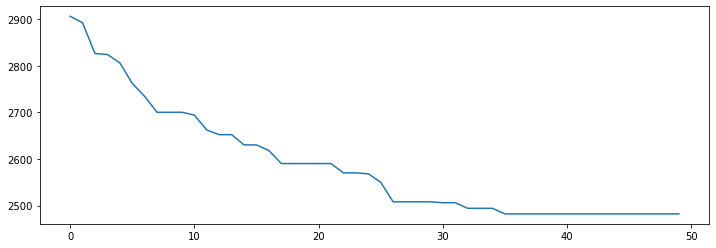

 population_size = 5000 
 crossover_probability = 0.975 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 2488.0 
 best_permutation: [14 16  0  9  8 11  4 10  7  6 15 12  5  1  3 18 17  2 20 13 19]


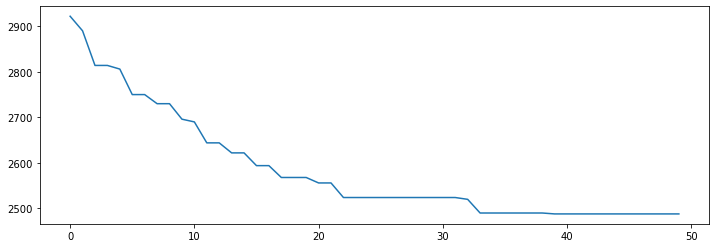

 population_size = 5000 
 crossover_probability = 0.975 
 mutation_probability = 0.35 
 number_of_iterations = 50 
 tsp_objective_function: 2442.0 
 best_permutation: [19 20  2  8  9  1  4 13 18  7  6  0 11 16  3 17 10 15 12  5 14]


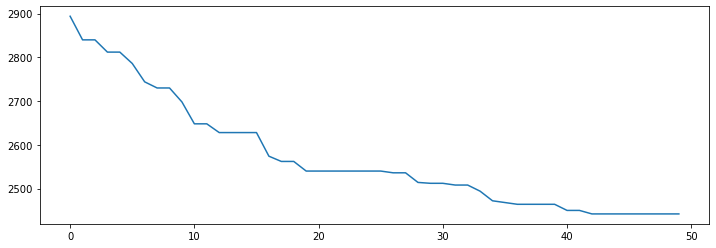

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 2470.0 
 best_permutation: [ 3  2 18 20  8  1  4 19 10  7  6  9 12 16 13 17 15  0 11  5 14]


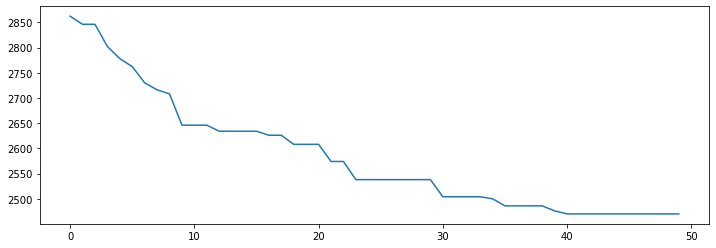

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 2470.0 
 best_permutation: [13 19 18  2  9  8 20  3 10  7  6 15 12  1 14 16 17  0 11  5  4]


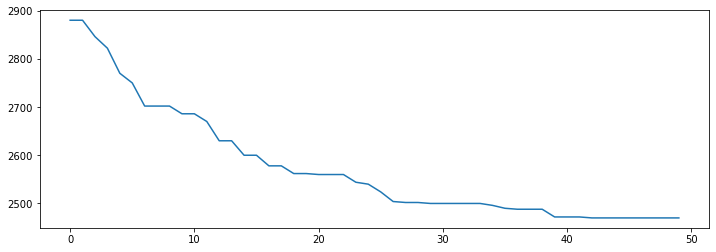

 population_size = 5000 
 crossover_probability = 0.95 
 mutation_probability = 0.35 
 number_of_iterations = 50 
 tsp_objective_function: 2476.0 
 best_permutation: [16  0 17 10  7 18  3 14  5 11  6 15  2 13  4  1 12  9  8 20 19]


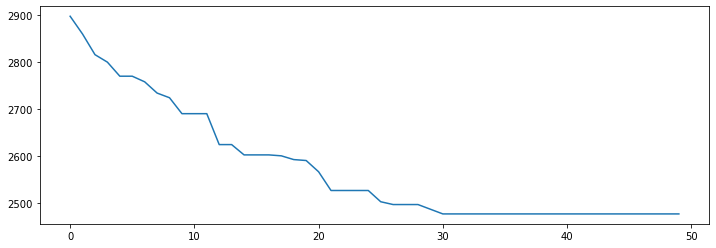

 population_size = 5000 
 crossover_probability = 0.925 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 2482.0 
 best_permutation: [16  5  0 18  7 17 14  4 11  9  6 10 15 19  1 12  8 20  2  3 13]


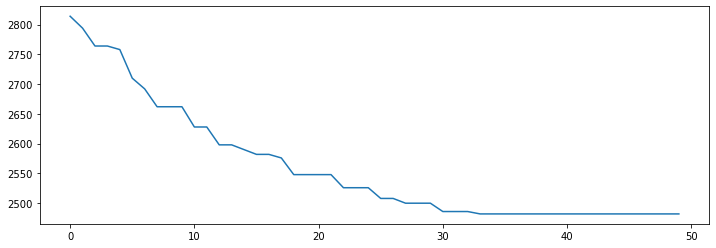

 population_size = 5000 
 crossover_probability = 0.925 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 2472.0 
 best_permutation: [ 3 10  7 15  0 16 14 19 17 18  6  9 11  5 13  2 20  8 12  1  4]


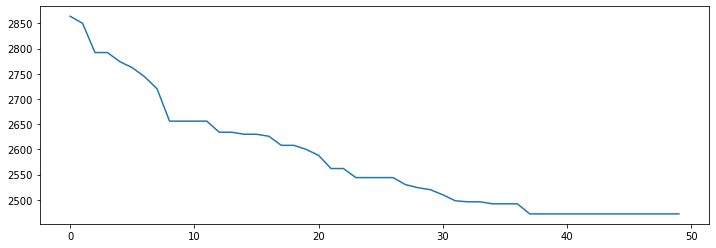

 population_size = 5000 
 crossover_probability = 0.925 
 mutation_probability = 0.35 
 number_of_iterations = 50 
 tsp_objective_function: 2496.0 
 best_permutation: [ 4 11 17  9  0 18 16  1  5 12  8  6  7 14 19 13 20  2 15 10  3]


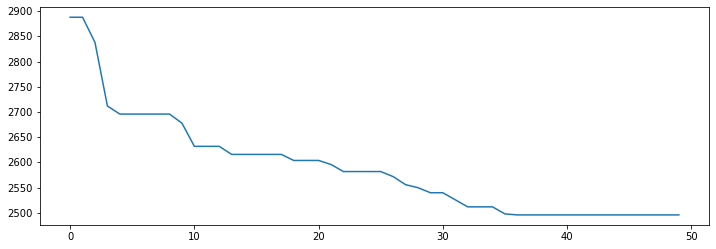

 population_size = 5000 
 crossover_probability = 0.9 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 2474.0 
 best_permutation: [14 11 16  0  7 18 19  5 12  9  6 15 17 13  4  1  8 10  2 20  3]


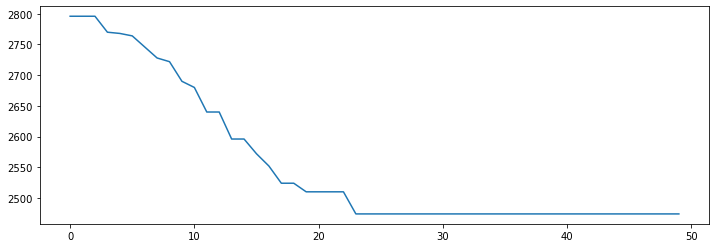

 population_size = 5000 
 crossover_probability = 0.9 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 2476.0 
 best_permutation: [ 1 12  9  8 15 20  3  4  5 11  6  7  2 19 16 14  0 10 18 17 13]


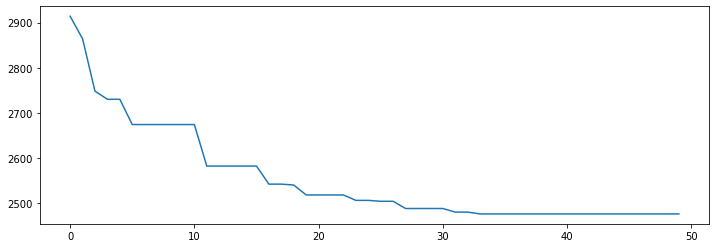

 population_size = 5000 
 crossover_probability = 0.9 
 mutation_probability = 0.35 
 number_of_iterations = 50 
 tsp_objective_function: 2466.0 
 best_permutation: [14  7 10 15  3 13 19 18  9  6 12  8  2 20 16  0 11  5 17  1  4]


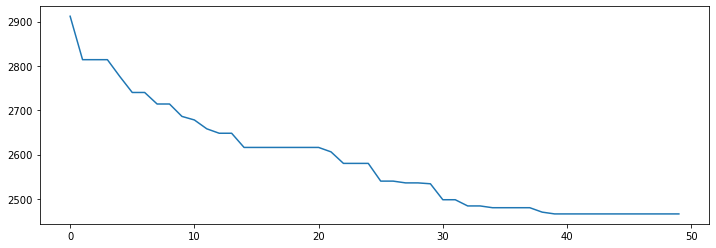

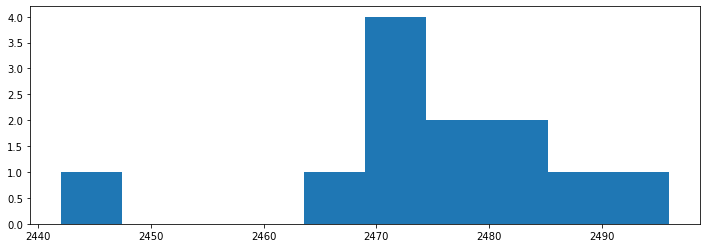

In [103]:
flow_matr = Nug21_A
dist_matr = Nug21_B
n = Nug21_n
population_size = [5000]
crossover_probability = [0.975, 0.95, 0.925, 0.9]
mutation_probability = [0.25, 0.3, 0.35]
number_of_iterations = [50]
crossover = [PMX]
mutation = [reverse_sequence_mutation]
locality = [local_search]
locality_probablility = [0.00]
ks=[2]
transparent = False

scores = []

for (pop, cross, mut, n_it, cro, mu, loc, loc_prob, k) in itertools.product(population_size, crossover_probability, 
            mutation_probability, number_of_iterations, crossover, mutation, locality, locality_probablility, ks):
    best_p, costs = SGA_qap(n, flow_matr, dist_matr, population_size=pop, crossover_probability=cross, 
            mutation_probability=mut, number_of_iterations=n_it, mutation=mu, crossover=cro, locality=loc, 
            locality_probablility=loc_prob, k=k, transparent=transparent)
    scores.append(qap_objective_function(best_p, n, flow_matr, dist_matr))
    print(" population_size =", pop, "\n crossover_probability =", cross,
          "\n mutation_probability =", mut, "\n number_of_iterations =", n_it,
          "\n tsp_objective_function:", qap_objective_function(best_p, n, flow_matr, dist_matr), 
          "\n best_permutation:", best_p)
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()

plt.figure(figsize=(12,4))
plt.hist(scores)
plt.show()

# Nug22   3596

In [104]:
# 3596
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug22.dat'
Nug22_n, Nug22_A, Nug22_B = get_next_instance(QAP_INSTANCE_URL)

 population_size = 10000 
 crossover_probability = 0.975 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 3602.0 
 best_permutation: [19  3 15  7  2 10  6  9  8 20  1 13 14 16 18 17 21  0 11  5 12  4]


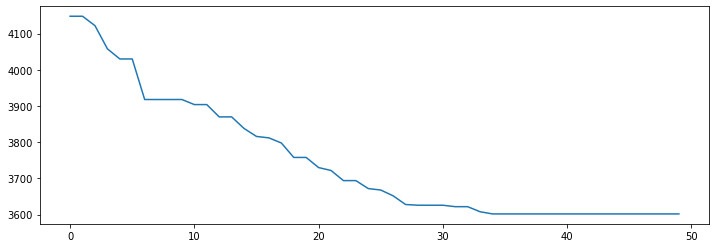

 population_size = 10000 
 crossover_probability = 0.975 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 3632.0 
 best_permutation: [ 4  1 20  8 12 11  6  9  0 18 16 19 13  3  2 15  5 10 21 17  7 14]


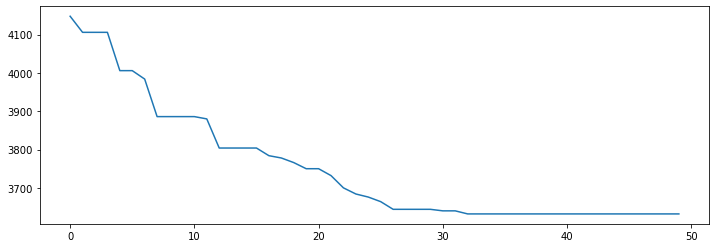

 population_size = 10000 
 crossover_probability = 0.975 
 mutation_probability = 0.35 
 number_of_iterations = 50 
 tsp_objective_function: 3616.0 
 best_permutation: [ 1 20  8  9  6  2  0 18  7 19 16  4 12  5 11 15 21 17 10  3 13 14]


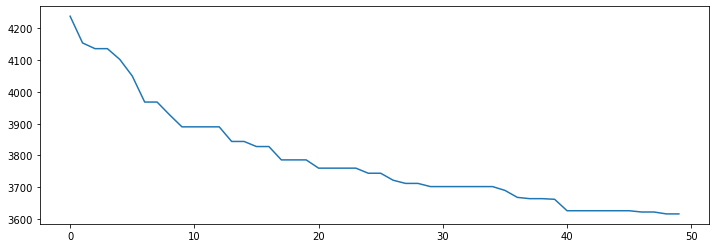

 population_size = 10000 
 crossover_probability = 0.95 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 3610.0 
 best_permutation: [ 4  5 11  9  0 21 17 18 16 14 13  1 12 20  8  6 10  2  7 15  3 19]


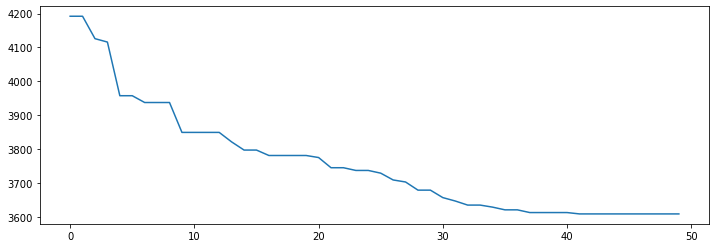

 population_size = 10000 
 crossover_probability = 0.95 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 3606.0 
 best_permutation: [ 4  5 11  9  6  0 21  7 10 14 16  1 12 20  8 15  2 17 18  3 13 19]


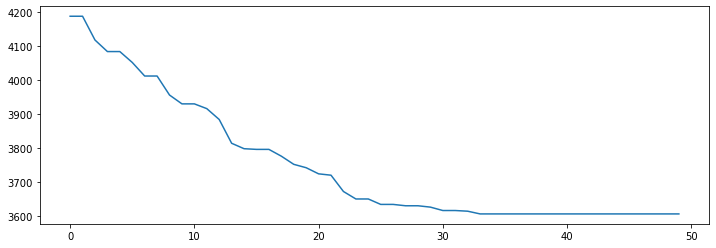

 population_size = 10000 
 crossover_probability = 0.95 
 mutation_probability = 0.35 
 number_of_iterations = 50 
 tsp_objective_function: 3622.0 
 best_permutation: [ 1 12 20  8  6 10  2 18 15  3 13  4  5 11  9  0 21 17  7 16 14 19]


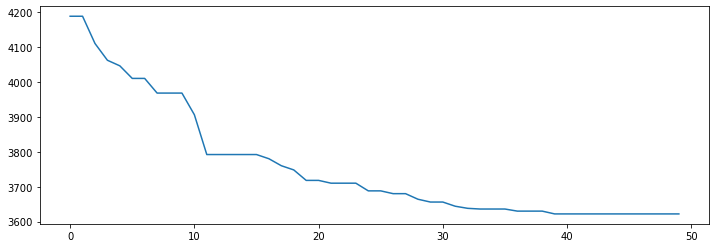

 population_size = 10000 
 crossover_probability = 0.925 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 3650.0 
 best_permutation: [19 20 18  7  6  8  9  0 12 16  1 13  3  2 15 10 17 21 11  5 14  4]


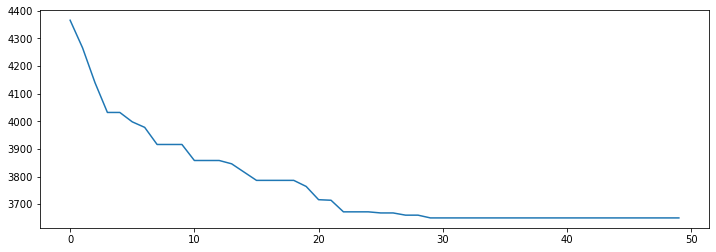

 population_size = 10000 
 crossover_probability = 0.925 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 3596.0 
 best_permutation: [16 19  7 18  0  2  6  9  8 20  1 14 13  3 17 21 10 15 11  5 12  4]


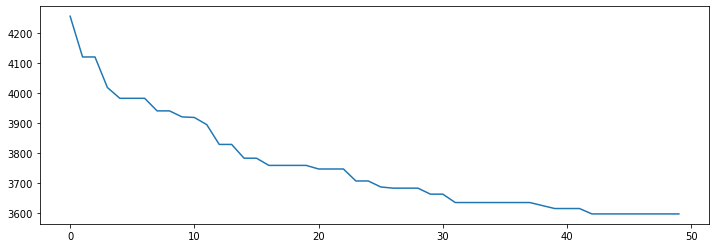

 population_size = 10000 
 crossover_probability = 0.925 
 mutation_probability = 0.35 
 number_of_iterations = 50 
 tsp_objective_function: 3596.0 
 best_permutation: [ 1 20  8  9  6  2  0 18  7 19 16  4 12  5 11 15 10 21 17  3 13 14]


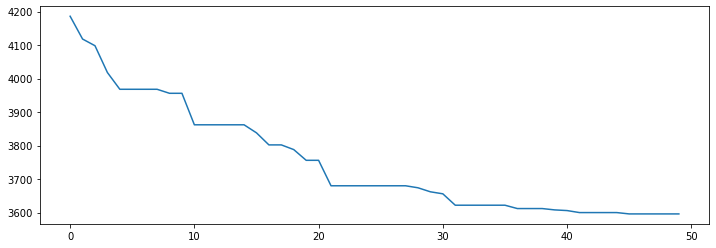

 population_size = 10000 
 crossover_probability = 0.9 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 3670.0 
 best_permutation: [19 13 20  8 12 11  9  6 15  3 14  4  1  2 17  5 21  0 18  7 10 16]


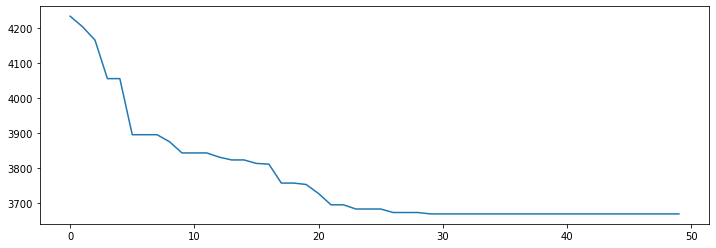

 population_size = 10000 
 crossover_probability = 0.9 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 3662.0 
 best_permutation: [14  3  0 21 17  5 11 12 13 19  1 16 10  7 18  6 15  9  8  2 20  4]


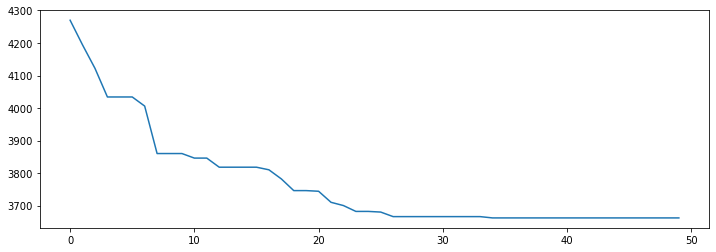

 population_size = 10000 
 crossover_probability = 0.9 
 mutation_probability = 0.35 
 number_of_iterations = 50 
 tsp_objective_function: 3596.0 
 best_permutation: [16 19  7 18  0  2  6  9  8 20  1 14 13  3 17 21 10 15 11  5 12  4]


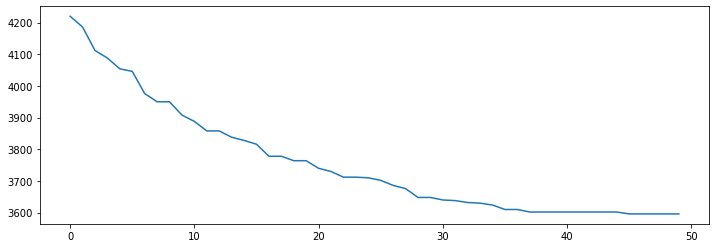

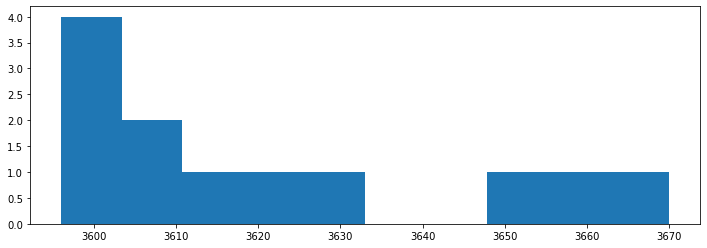

In [107]:
flow_matr = Nug22_A
dist_matr = Nug22_B
n = Nug22_n
population_size = [10000]
crossover_probability = [0.975, 0.95, 0.925, 0.9]
mutation_probability = [0.25, 0.3, 0.35]
number_of_iterations = [50]
crossover = [PMX]
mutation = [reverse_sequence_mutation]
locality = [local_search]
locality_probablility = [0.00]
ks=[2]
transparent = False

scores = []

for (pop, cross, mut, n_it, cro, mu, loc, loc_prob, k) in itertools.product(population_size, crossover_probability, 
            mutation_probability, number_of_iterations, crossover, mutation, locality, locality_probablility, ks):
    best_p, costs = SGA_qap(n, flow_matr, dist_matr, population_size=pop, crossover_probability=cross, 
            mutation_probability=mut, number_of_iterations=n_it, mutation=mu, crossover=cro, locality=loc, 
            locality_probablility=loc_prob, k=k, transparent=transparent)
    scores.append(qap_objective_function(best_p, n, flow_matr, dist_matr))
    print(" population_size =", pop, "\n crossover_probability =", cross,
          "\n mutation_probability =", mut, "\n number_of_iterations =", n_it,
          "\n tsp_objective_function:", qap_objective_function(best_p, n, flow_matr, dist_matr), 
          "\n best_permutation:", best_p)
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()

plt.figure(figsize=(12,4))
plt.hist(scores)
plt.show()

# Nug24      3488

In [15]:
# 3488
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug24.dat'
Nug24_n, Nug24_A, Nug24_B = get_next_instance(QAP_INSTANCE_URL)

 population_size = 10000 
 crossover_probability = 0.975 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 3590.0 
 best_permutation: [13 23 17  0 18 16 19 11 22 21  7 14  4  5  2  9  6 10  1 12 20  8 15  3]


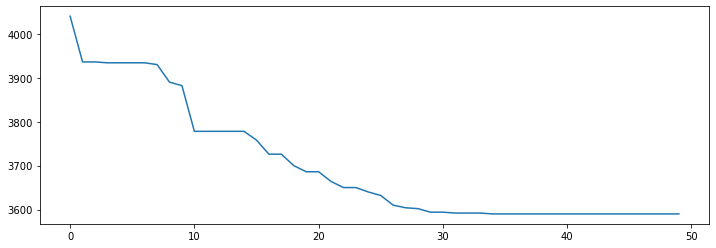

 population_size = 10000 
 crossover_probability = 0.975 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 3566.0 
 best_permutation: [ 5 11  0 23 16 14 12  9  6 15  7 19  1 20 21 17 18 13  4  8 10  2 22  3]


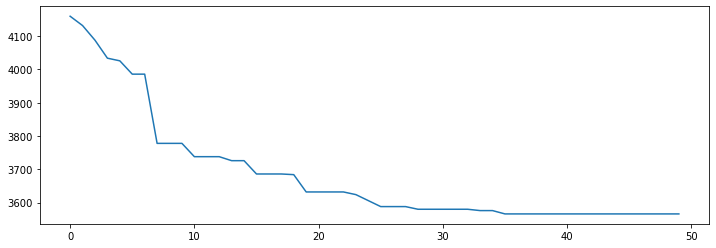

 population_size = 10000 
 crossover_probability = 0.975 
 mutation_probability = 0.35 
 number_of_iterations = 50 
 tsp_objective_function: 3584.0 
 best_permutation: [ 4  5 21 17 22 14  1 11  0  2 10 13 20 23  6 18  7 19 12  8  9 15 16  3]


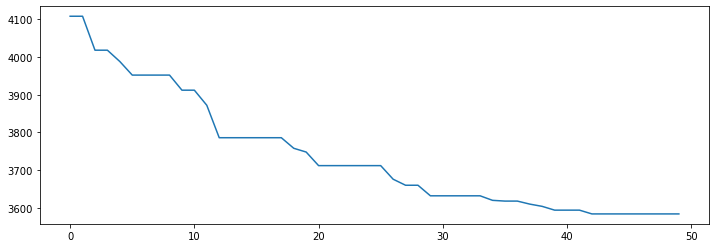

 population_size = 10000 
 crossover_probability = 0.95 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 3552.0 
 best_permutation: [14 16 15 10 22  3  5 11  0 21 17 13  4 23  6  7  2 18  1 12  9  8 20 19]


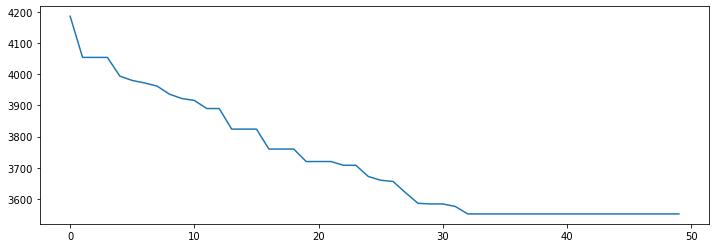

 population_size = 10000 
 crossover_probability = 0.95 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 3590.0 
 best_permutation: [ 1  4 12  5 11  0 20  2  8 21  9 23 13 22 17  6 18 16 19  3 15 10  7 14]


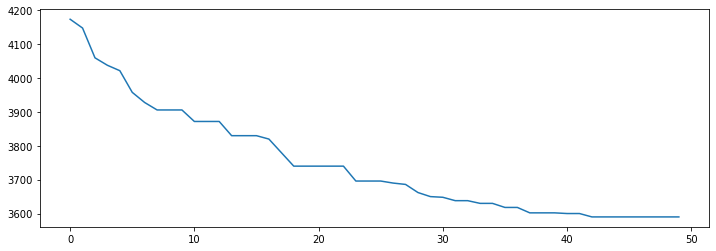

 population_size = 10000 
 crossover_probability = 0.95 
 mutation_probability = 0.35 
 number_of_iterations = 50 
 tsp_objective_function: 3572.0 
 best_permutation: [14 16 18 17 22 13 23  0  7 21  2 19 11  9  6  8 10  3  5 12 15 20  1  4]


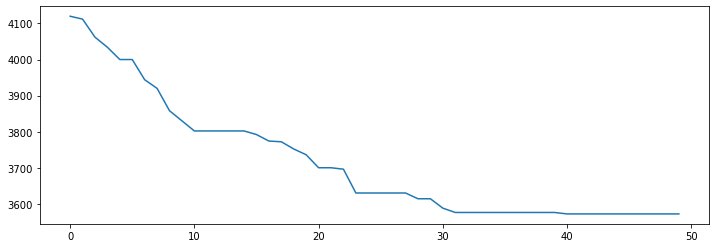

 population_size = 10000 
 crossover_probability = 0.925 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 3612.0 
 best_permutation: [16 23  0  9 18  8  1 11 12  6  7 20 14  5 21 15  2 19  4 22 17 10  3 13]


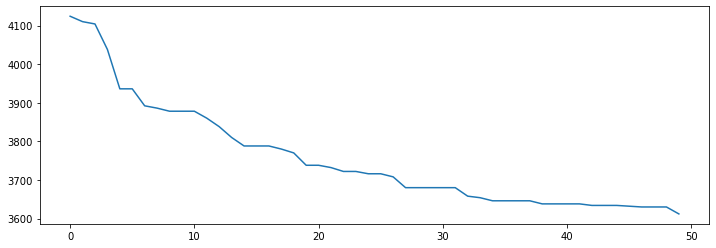

 population_size = 10000 
 crossover_probability = 0.925 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 3560.0 
 best_permutation: [23 12 11  5 15 14  0  9  6 21  7 10 16  8 18 17 22  3  4  1 20  2 19 13]


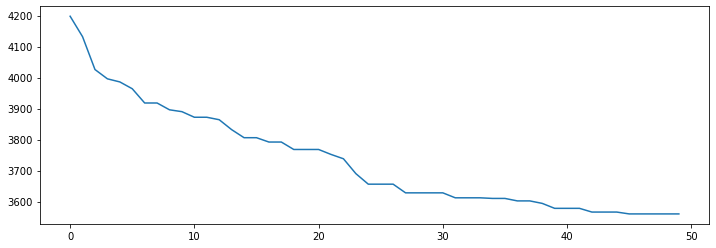

 population_size = 10000 
 crossover_probability = 0.925 
 mutation_probability = 0.35 
 number_of_iterations = 50 
 tsp_objective_function: 3554.0 
 best_permutation: [14 23  0 11  5  4 16 22 17 21 12  1 13 10  7  6  9  8 19  3 18  2 15 20]


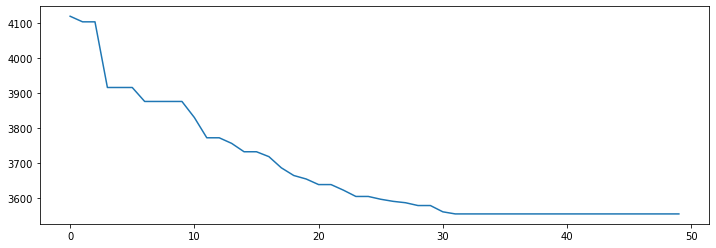

 population_size = 10000 
 crossover_probability = 0.9 
 mutation_probability = 0.25 
 number_of_iterations = 50 
 tsp_objective_function: 3542.0 
 best_permutation: [14 12  9  8 15  3 23 11  0  6  7 10 16  5 21 17 22 13  4  1 20 18  2 19]


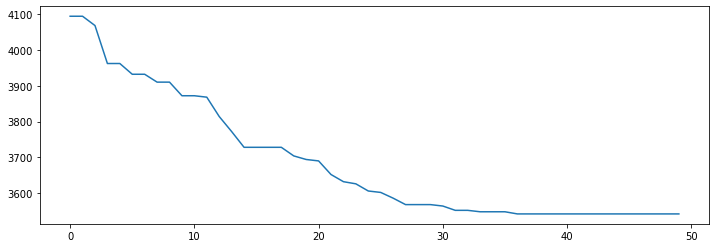

 population_size = 10000 
 crossover_probability = 0.9 
 mutation_probability = 0.3 
 number_of_iterations = 50 
 tsp_objective_function: 3562.0 
 best_permutation: [ 3 10  7 22 13 19 15  8  6 18  2 20 16  9  0 21 17  1 14 23 11  5 12  4]


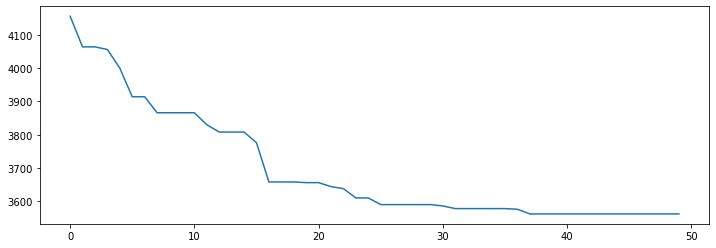

 population_size = 10000 
 crossover_probability = 0.9 
 mutation_probability = 0.35 
 number_of_iterations = 50 
 tsp_objective_function: 3538.0 
 best_permutation: [ 3 15  2  8 13 19 10 18  6  9 12 20 22  7 21 17  5  1 16 14  0 23 11  4]


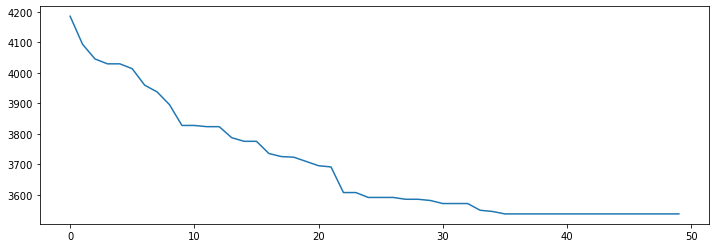

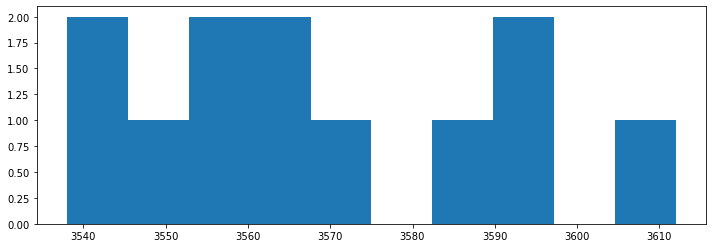

In [16]:
flow_matr = Nug24_A
dist_matr = Nug24_B
n = Nug24_n
population_size = [10000]
crossover_probability = [0.975, 0.95, 0.925, 0.9]
mutation_probability = [0.25, 0.3, 0.35]
number_of_iterations = [50]
crossover = [PMX]
mutation = [reverse_sequence_mutation]
locality = [local_search]
locality_probablility = [0.00]
ks=[2]
transparent = False

scores = []

for (pop, cross, mut, n_it, cro, mu, loc, loc_prob, k) in itertools.product(population_size, crossover_probability, 
            mutation_probability, number_of_iterations, crossover, mutation, locality, locality_probablility, ks):
    best_p, costs = SGA_qap(n, flow_matr, dist_matr, population_size=pop, crossover_probability=cross, 
            mutation_probability=mut, number_of_iterations=n_it, mutation=mu, crossover=cro, locality=loc, 
            locality_probablility=loc_prob, k=k, transparent=transparent)
    scores.append(qap_objective_function(best_p, n, flow_matr, dist_matr))
    print(" population_size =", pop, "\n crossover_probability =", cross,
          "\n mutation_probability =", mut, "\n number_of_iterations =", n_it,
          "\n tsp_objective_function:", qap_objective_function(best_p, n, flow_matr, dist_matr), 
          "\n best_permutation:", best_p)
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()

plt.figure(figsize=(12,4))
plt.hist(scores)
plt.show()

  0     4.62734818 4230.00000000 4623.16840000 4752.00000000  94.21390365
  1     8.10009217 4062.00000000 4534.95160000 4638.00000000  82.87428104
  2    11.62570095 3996.00000000 4467.63400000 4564.00000000  77.30450727
  3    14.74737525 3996.00000000 4411.83640000 4502.00000000  73.53700317
  4    18.95214272 3996.00000000 4364.10440000 4450.00000000  69.73033415
  5    22.49850559 3996.00000000 4324.58840000 4408.00000000  65.63032367
  6    26.23363233 3912.00000000 4289.67760000 4368.00000000  63.73208971
  7    30.24555898 3910.00000000 4258.14760000 4334.00000000  63.32655536
  8    33.62754965 3910.00000000 4227.26240000 4304.00000000  61.62738309
  9    36.46909142 3898.00000000 4200.53600000 4274.00000000  60.29867581
 10    40.16208196 3898.00000000 4174.30720000 4246.00000000  59.57132220
 11    44.03424644 3826.00000000 4149.71800000 4220.00000000  58.82652188
 12    48.58422852 3826.00000000 4126.21800000 4196.00000000  58.08408798
 13    52.57271743 3818.00000000 4103.

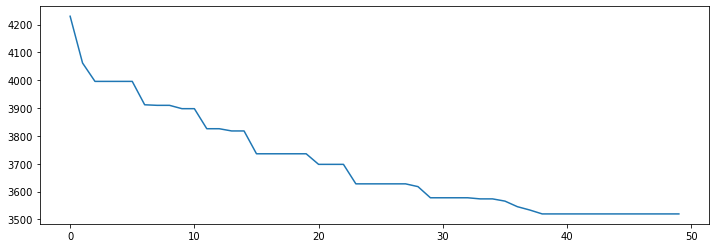

  0     3.87884665 4148.00000000 4623.54800000 4754.00000000  96.72041613
  1     7.95957732 4072.00000000 4534.84000000 4642.00000000  83.69177737
  2    11.52001810 3990.00000000 4467.91280000 4566.00000000  77.88624780
  3    15.00171018 3990.00000000 4415.02840000 4506.00000000  73.60595080
  4    19.90271473 3990.00000000 4370.38760000 4456.00000000  71.98053741
  5    23.63979983 3960.00000000 4329.01000000 4414.00000000  71.60092667
  6    26.92701530 3960.00000000 4291.93600000 4374.00000000  68.15250475
  7    30.80521107 3904.00000000 4258.91880000 4340.00000000  67.29096081
  8    34.60916162 3904.00000000 4228.79320000 4308.00000000  65.62488883
  9    38.72518611 3904.00000000 4200.48520000 4278.00000000  63.88497618
 10    42.39640450 3834.00000000 4174.69720000 4250.00000000  61.71755919
 11    46.09155679 3834.00000000 4150.63000000 4226.00000000  60.18441576
 12    48.82446408 3834.00000000 4127.21600000 4202.00000000  58.57199112
 13    52.44918513 3834.00000000 4105.

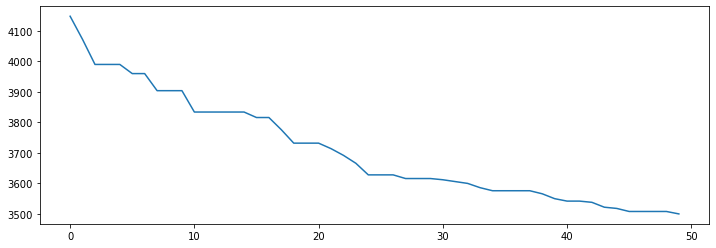

  0     4.89855647 4170.00000000 4626.61080000 4754.00000000  96.99902125
  1     8.14284730 4164.00000000 4534.56560000 4642.00000000  84.91821063
  2    11.71931434 4090.00000000 4465.50360000 4564.00000000  78.65809041
  3    15.62050700 4058.00000000 4410.30600000 4502.00000000  72.58476950
  4    19.31664276 4012.00000000 4364.28280000 4448.00000000  69.04981987
  5    23.01131487 4002.00000000 4324.92280000 4406.00000000  67.32497041
  6    26.55184460 3940.00000000 4287.69720000 4368.00000000  66.63748129
  7    30.68781781 3934.00000000 4253.27600000 4332.00000000  63.67469061
  8    34.03318691 3934.00000000 4223.62960000 4300.00000000  60.63719324
  9    37.83089972 3932.00000000 4194.85800000 4268.00000000  58.48104510
 10    41.96606493 3914.00000000 4169.47320000 4240.00000000  57.09000685
 11    45.82825065 3826.00000000 4145.28200000 4216.00000000  56.05079550
 12    50.09196258 3826.00000000 4122.58840000 4190.00000000  54.98530881
 13    54.12682390 3826.00000000 4101.

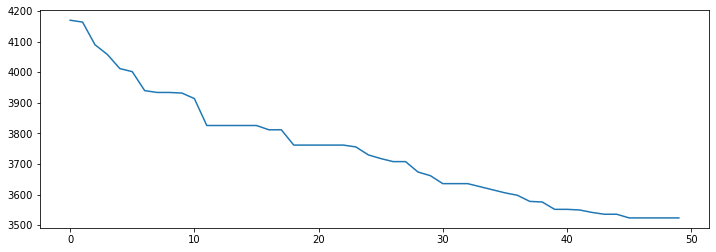

  0     4.20777535 4112.00000000 4625.49560000 4756.00000000  95.45728668
  1     7.91090846 4112.00000000 4535.91720000 4642.00000000  86.02255718
  2    12.05197287 4086.00000000 4466.13040000 4566.00000000  83.83740809
  3    15.96254778 4064.00000000 4406.99000000 4504.00000000  79.38877440
  4    19.91409874 4004.00000000 4358.55280000 4450.00000000  73.66846824
  5    23.71001673 3968.00000000 4316.88880000 4402.00000000  70.25703975
  6    26.82428598 3958.00000000 4280.45120000 4362.00000000  66.92364320
  7    30.88403416 3958.00000000 4248.76800000 4328.00000000  63.28276050
  8    33.97245574 3920.00000000 4218.93600000 4294.00000000  60.43685551
  9    37.54487157 3884.00000000 4191.82680000 4266.00000000  58.36757663
 10    41.96283317 3866.00000000 4166.69280000 4238.00000000  57.12897713
 11    46.37680840 3854.00000000 4144.48320000 4214.00000000  55.83945664
 12    50.53073287 3822.00000000 4122.91400000 4190.00000000  55.05962408
 13    53.42399240 3822.00000000 4102.

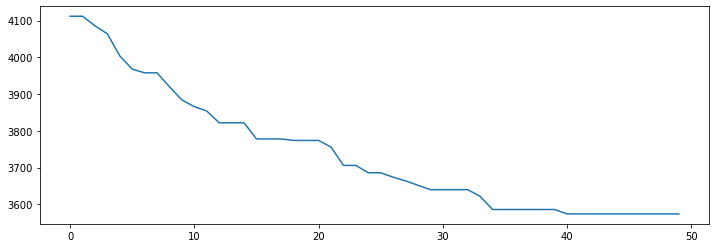

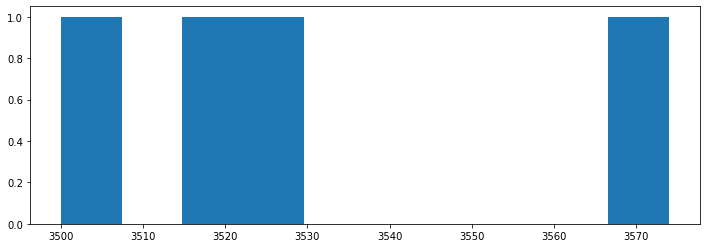

In [17]:
flow_matr = Nug24_A
dist_matr = Nug24_B
n = Nug24_n
population_size = [5000]
crossover_probability = [0.97, 0.95]
mutation_probability = [0.25, 0.3]
number_of_iterations = [50]
crossover = [PMX]
mutation = [reverse_sequence_mutation]
locality = [local_search]
locality_probablility = [0.01]
ks=[2]
transparent = True

scores = []


for (pop, cross, mut, n_it, cro, mu, loc, loc_prob, k) in itertools.product(population_size, crossover_probability, 
            mutation_probability, number_of_iterations, crossover, mutation, locality, locality_probablility, ks):
    best_p, costs = SGA_qap(n, flow_matr, dist_matr, population_size=pop, crossover_probability=cross, 
            mutation_probability=mut, number_of_iterations=n_it, mutation=mu, crossover=cro, locality=loc, 
            locality_probablility=loc_prob, k=k, transparent=transparent)
    scores.append(qap_objective_function(best_p, n, flow_matr, dist_matr))
    print(" population_size =", pop, "\n crossover_probability =", cross,
          "\n mutation_probability =", mut, "\n number_of_iterations =", n_it,
          "\n tsp_objective_function:", qap_objective_function(best_p, n, flow_matr, dist_matr), 
          "\n best_permutation:", best_p)
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()
    
plt.figure(figsize=(12,4))
plt.hist(scores)
plt.show()

# Nug25      3744

In [18]:
# 3744
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug25.dat'
Nug25_n, Nug25_A, Nug25_B = get_next_instance(QAP_INSTANCE_URL)

 population_size = 10000 
 crossover_probability = 0.975 
 mutation_probability = 0.25 
 number_of_iterations = 100 
 tsp_objective_function: 3770.0 
 best_permutation: [11 16 23 10 17  3 24 20 15  1 13  7  6  5  2 22  8  9 18  0 12 21 19 14
  4]


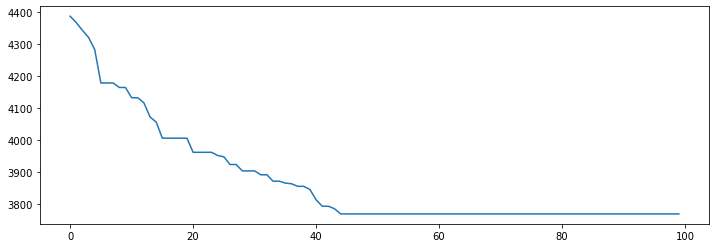

 population_size = 10000 
 crossover_probability = 0.975 
 mutation_probability = 0.3 
 number_of_iterations = 100 
 tsp_objective_function: 3750.0 
 best_permutation: [14 21 10  1  4  0  8  7 24 17 18  9  5 15  2 19  6 20 23 16 12 22 13  3
 11]


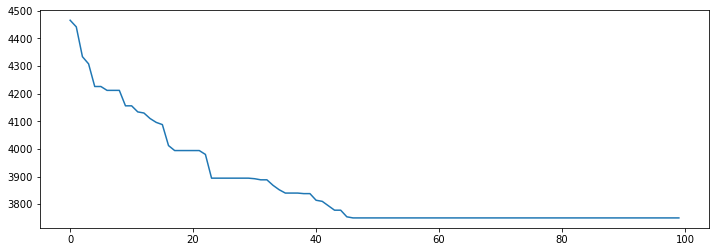

 population_size = 10000 
 crossover_probability = 0.975 
 mutation_probability = 0.35 
 number_of_iterations = 100 
 tsp_objective_function: 3772.0 
 best_permutation: [ 4 14  0 19 12 21  8 18  9 22 20  7  5  6 13  1 24 15  2  3 23 10 17 16
 11]


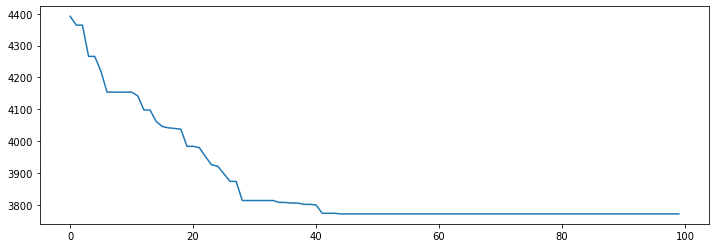

 population_size = 10000 
 crossover_probability = 0.95 
 mutation_probability = 0.25 
 number_of_iterations = 100 
 tsp_objective_function: 3836.0 
 best_permutation: [11  1  4 17 10 16 24  2 15  7 22 13  6  5  8 23 20  9 18 21 12  3 19  0
 14]


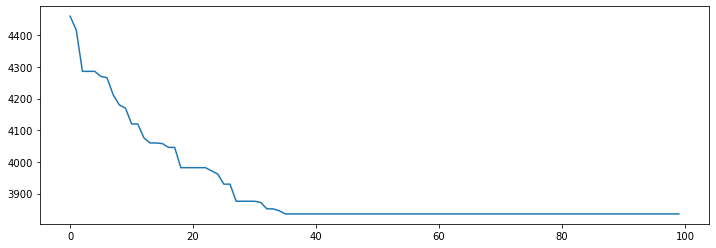

 population_size = 10000 
 crossover_probability = 0.95 
 mutation_probability = 0.3 
 number_of_iterations = 100 
 tsp_objective_function: 3798.0 
 best_permutation: [11 16 22 23 12  3  2 13 20  6 24  7  9  5 15  1 17  8 18  0  4 10 21 19
 14]


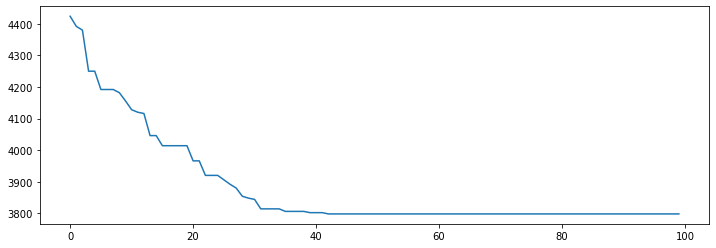

 population_size = 10000 
 crossover_probability = 0.95 
 mutation_probability = 0.35 
 number_of_iterations = 100 
 tsp_objective_function: 3804.0 
 best_permutation: [12 20 15  0 14 23  6  5 18  9 22 13  8  2 21 16  3  7 17 19 11 24 10  1
  4]


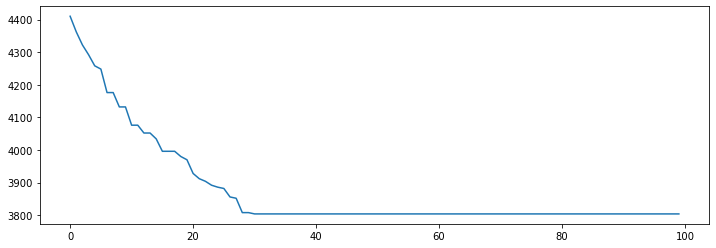

 population_size = 10000 
 crossover_probability = 0.925 
 mutation_probability = 0.25 
 number_of_iterations = 100 
 tsp_objective_function: 3762.0 
 best_permutation: [11 10 17  1  4 16  7  2 24 23  3 13  5 15 20 22  8  9  6 19 12 21 18  0
 14]


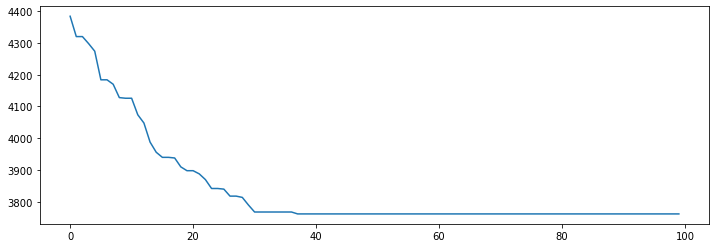

 population_size = 10000 
 crossover_probability = 0.925 
 mutation_probability = 0.3 
 number_of_iterations = 100 
 tsp_objective_function: 3826.0 
 best_permutation: [ 3 13  9 22 12 20  6  5 18  0 19 15  2  8 14 11 24  7 10 21 23 16 17  1
  4]


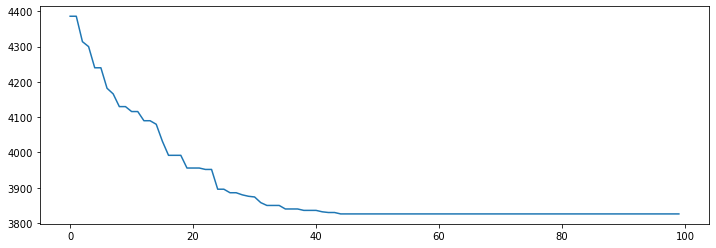

 population_size = 10000 
 crossover_probability = 0.925 
 mutation_probability = 0.35 
 number_of_iterations = 100 
 tsp_objective_function: 3744.0 
 best_permutation: [21 14 19 10  4  0  8  7 24  1 18  5  2 15 17  9  6 13 20 23 12 22  3 11
 16]


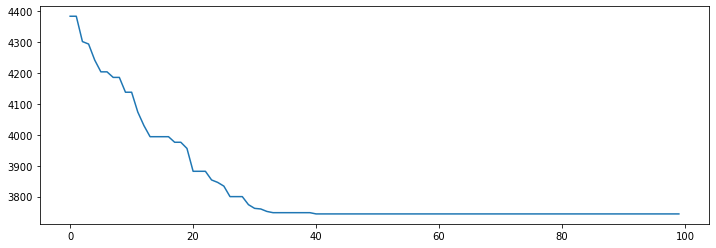

 population_size = 10000 
 crossover_probability = 0.9 
 mutation_probability = 0.25 
 number_of_iterations = 100 
 tsp_objective_function: 3770.0 
 best_permutation: [ 4  1 24 16 11 10 17  2 23  3 19  7 15 20 13 14  8  5  6 22 21  0 18  9
 12]


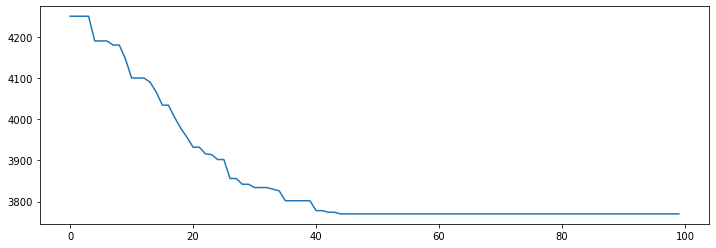

 population_size = 10000 
 crossover_probability = 0.9 
 mutation_probability = 0.3 
 number_of_iterations = 100 
 tsp_objective_function: 3894.0 
 best_permutation: [23 11 16 19 21 20 15  6  9 14  3 24  5 18 12 13  7  8 22  0 10 17  2  1
  4]


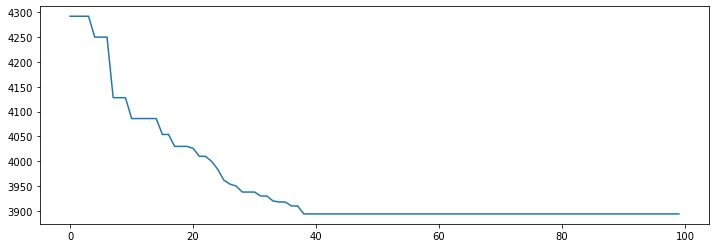

 population_size = 10000 
 crossover_probability = 0.9 
 mutation_probability = 0.35 
 number_of_iterations = 100 
 tsp_objective_function: 3778.0 
 best_permutation: [12 21 16 11  4 14 19 24  3  1 22  8  7 13 10 18  9  5  2 17  0  6 15 20
 23]


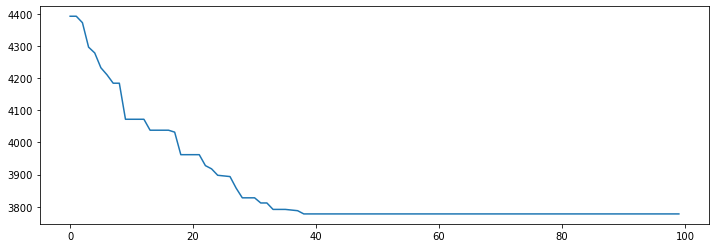

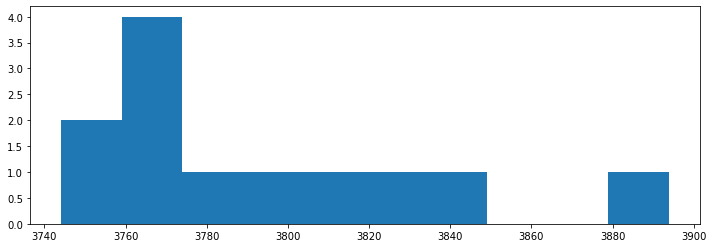

In [19]:
flow_matr = Nug25_A
dist_matr = Nug25_B
n = Nug25_n
population_size = [10000]
crossover_probability = [0.975, 0.95, 0.925, 0.9]
mutation_probability = [0.25, 0.3, 0.35]
number_of_iterations = [100]
crossover = [PMX]
mutation = [reverse_sequence_mutation]
locality = [local_search]
locality_probablility = [0.00]
ks=[2]
transparent = False

scores = []

for (pop, cross, mut, n_it, cro, mu, loc, loc_prob, k) in itertools.product(population_size, crossover_probability, 
            mutation_probability, number_of_iterations, crossover, mutation, locality, locality_probablility, ks):
    best_p, costs = SGA_qap(n, flow_matr, dist_matr, population_size=pop, crossover_probability=cross, 
            mutation_probability=mut, number_of_iterations=n_it, mutation=mu, crossover=cro, locality=loc, 
            locality_probablility=loc_prob, k=k, transparent=transparent)
    scores.append(qap_objective_function(best_p, n, flow_matr, dist_matr))
    print(" population_size =", pop, "\n crossover_probability =", cross,
          "\n mutation_probability =", mut, "\n number_of_iterations =", n_it,
          "\n tsp_objective_function:", qap_objective_function(best_p, n, flow_matr, dist_matr), 
          "\n best_permutation:", best_p)
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()

plt.figure(figsize=(12,4))
plt.hist(scores)
plt.show()

# Nug27      5234

In [21]:
# 5234
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug27.dat'
Nug27_n, Nug27_A, Nug27_B = get_next_instance(QAP_INSTANCE_URL)

 population_size = 10000 
 crossover_probability = 0.975 
 mutation_probability = 0.25 
 number_of_iterations = 60 
 tsp_objective_function: 5408.0 
 best_permutation: [11  0 23 26  9  1 12 15 21  3  5 10 19 25  8 24 17 22 13 16 18  4 14 20
  6  2  7]


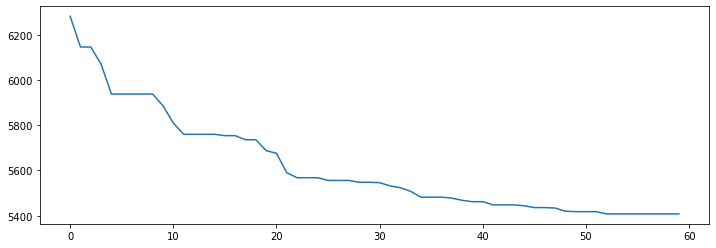

 population_size = 10000 
 crossover_probability = 0.975 
 mutation_probability = 0.3 
 number_of_iterations = 60 
 tsp_objective_function: 5390.0 
 best_permutation: [15 19 20  0 18 25 14  5 22 13  3 16 24  9 26 23  8 11  4  1 21 12  2 17
  6  7 10]


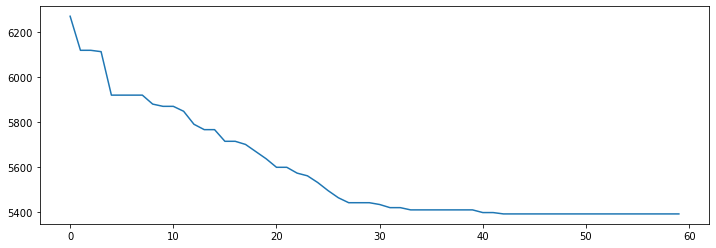

 population_size = 10000 
 crossover_probability = 0.975 
 mutation_probability = 0.35 
 number_of_iterations = 60 
 tsp_objective_function: 5442.0 
 best_permutation: [23  9 11  7 18 19 22 15 12 13 16 20 10  2  8  3 26  5 24  1  0 14  6 21
 25 17  4]


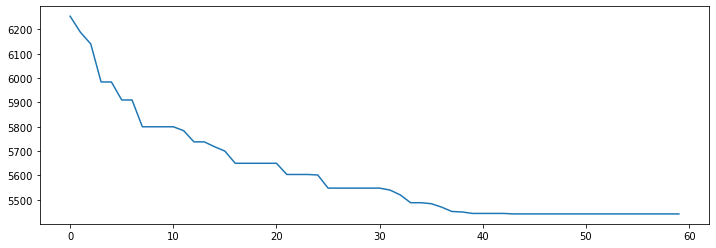

 population_size = 10000 
 crossover_probability = 0.95 
 mutation_probability = 0.25 
 number_of_iterations = 60 
 tsp_objective_function: 5358.0 
 best_permutation: [ 3  1  7 25  0 19 14 15 21 12 23 11 20 26 18 24  9  4  6 17  8 13 22  2
  5 10 16]


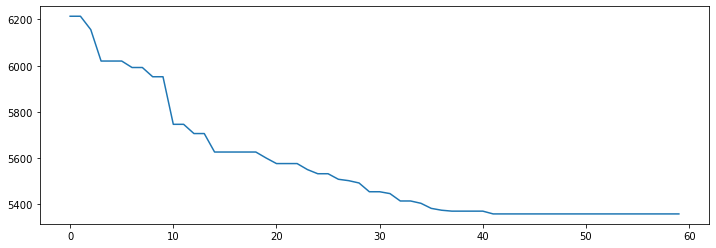

 population_size = 10000 
 crossover_probability = 0.95 
 mutation_probability = 0.3 
 number_of_iterations = 60 
 tsp_objective_function: 5368.0 
 best_permutation: [20  7 16 17  8  2 13 22  5  3 12 11  1 26 18 15  9 23  4 25  6 21 14 19
 10  0 24]


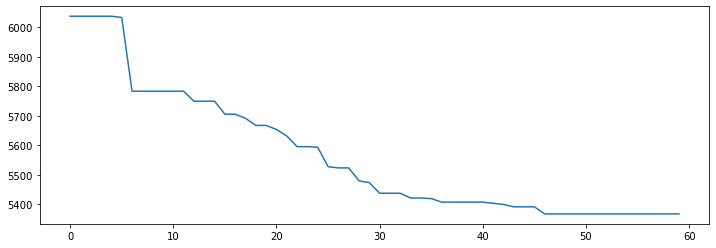

 population_size = 10000 
 crossover_probability = 0.95 
 mutation_probability = 0.35 
 number_of_iterations = 60 
 tsp_objective_function: 5294.0 
 best_permutation: [23  8  3  0 17 15 13 11  5 14  2 24  6 18 19  1 26 21 22  9  7 12 20 25
  4 16 10]


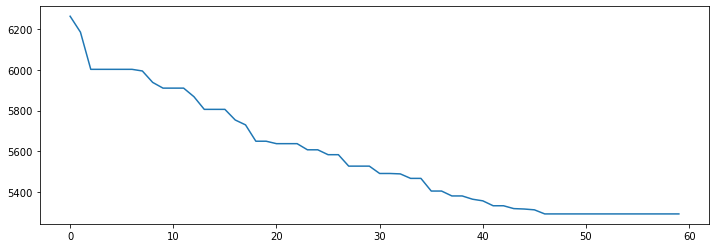

 population_size = 10000 
 crossover_probability = 0.925 
 mutation_probability = 0.25 
 number_of_iterations = 60 
 tsp_objective_function: 5324.0 
 best_permutation: [13  7  2 18  8  6 22 11 23 14 20 15 24  0  1 19 26  3  4  9  5 12 21 16
 25 17 10]


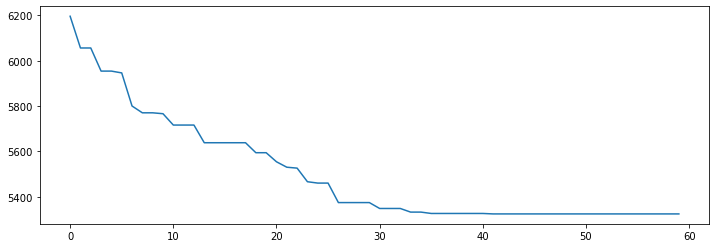

 population_size = 10000 
 crossover_probability = 0.925 
 mutation_probability = 0.3 
 number_of_iterations = 60 
 tsp_objective_function: 5304.0 
 best_permutation: [23  8  2  0 17 15  4 20  5 14  3 24  6 18  9  1 26 12 11 19  7 13 21 25
 22 16 10]


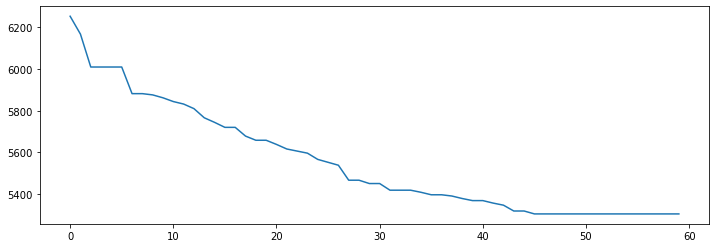

 population_size = 10000 
 crossover_probability = 0.925 
 mutation_probability = 0.35 
 number_of_iterations = 60 
 tsp_objective_function: 5296.0 
 best_permutation: [10  7 15 25  8  4 12 20  6  2 21  3  5 17 18 22  9 14 11 26 16 13 23  1
 19  0 24]


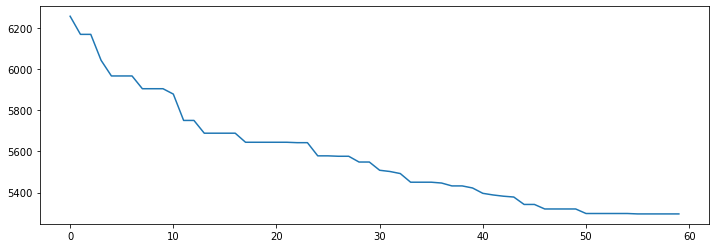

 population_size = 10000 
 crossover_probability = 0.9 
 mutation_probability = 0.25 
 number_of_iterations = 60 
 tsp_objective_function: 5318.0 
 best_permutation: [13 17 21 18 26 16  4  2  6 14 22 15  7  9 19  1 23 11  3  0  8 12 20 24
  5 25 10]


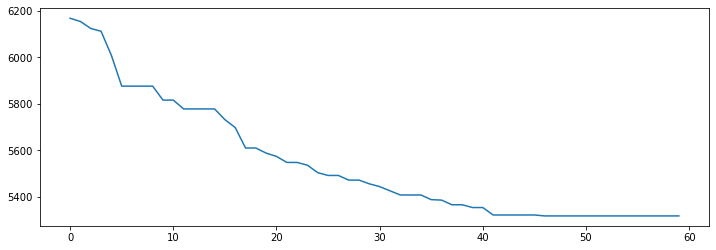

 population_size = 10000 
 crossover_probability = 0.9 
 mutation_probability = 0.3 
 number_of_iterations = 60 
 tsp_objective_function: 5328.0 
 best_permutation: [22  8  3  9 17 16 12 20  5 23 11 15  7  0 18 10 26  4 21  1  6 13 14 24
 19 25  2]


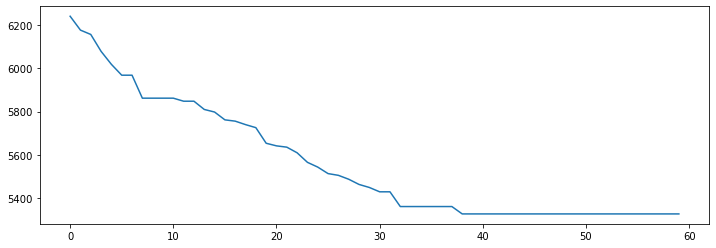

 population_size = 10000 
 crossover_probability = 0.9 
 mutation_probability = 0.35 
 number_of_iterations = 60 
 tsp_objective_function: 5356.0 
 best_permutation: [ 4  8  2 19 26  7 14 12 25 15 21  6 16  9  0 10 23 11 13 18 17  3 20  5
 22 24  1]


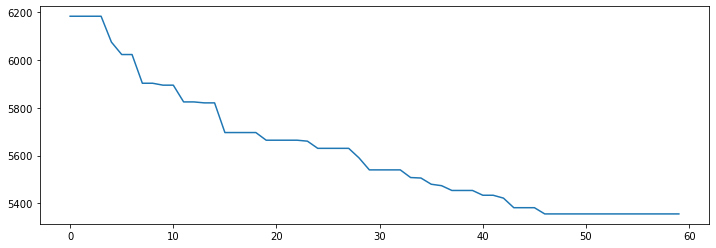

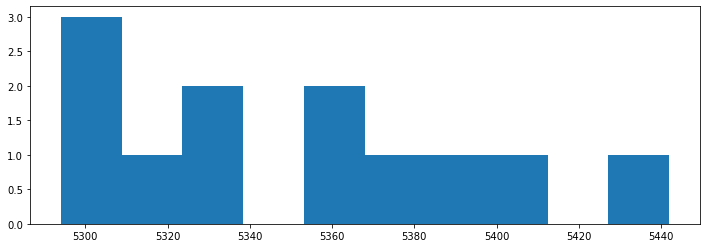

In [22]:
flow_matr = Nug27_A
dist_matr = Nug27_B
n = Nug27_n
population_size = [10000]
crossover_probability = [0.975, 0.95, 0.925, 0.9]
mutation_probability = [0.25, 0.3, 0.35]
number_of_iterations = [60]
crossover = [PMX]
mutation = [reverse_sequence_mutation]
locality = [local_search]
locality_probablility = [0.00]
ks=[2]
transparent = False

scores = []

for (pop, cross, mut, n_it, cro, mu, loc, loc_prob, k) in itertools.product(population_size, crossover_probability, 
            mutation_probability, number_of_iterations, crossover, mutation, locality, locality_probablility, ks):
    best_p, costs = SGA_qap(n, flow_matr, dist_matr, population_size=pop, crossover_probability=cross, 
            mutation_probability=mut, number_of_iterations=n_it, mutation=mu, crossover=cro, locality=loc, 
            locality_probablility=loc_prob, k=k, transparent=transparent)
    scores.append(qap_objective_function(best_p, n, flow_matr, dist_matr))
    print(" population_size =", pop, "\n crossover_probability =", cross,
          "\n mutation_probability =", mut, "\n number_of_iterations =", n_it,
          "\n tsp_objective_function:", qap_objective_function(best_p, n, flow_matr, dist_matr), 
          "\n best_permutation:", best_p)
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()

plt.figure(figsize=(12,4))
plt.hist(scores)
plt.show()

  0     7.12097502 6198.00000000 6917.03160000 7102.00000000 139.21596102
  1    12.16587353 6164.00000000 6788.54880000 6944.00000000 126.18624814
  2    16.85279441 6048.00000000 6691.59600000 6836.00000000 120.14487914
  3    22.23679686 6024.00000000 6609.51160000 6748.00000000 113.80222434
  4    27.60579991 6024.00000000 6540.00480000 6674.00000000 108.19281296
  5    33.12827563 6024.00000000 6479.39040000 6606.00000000 102.64511088
  6    38.40421271 6024.00000000 6427.40920000 6550.00000000  97.35663385
  7    43.41959643 5918.00000000 6379.73200000 6496.00000000  91.59743324
  8    48.15354872 5904.00000000 6340.46000000 6452.00000000  87.31002921
  9    52.57492280 5886.00000000 6303.52120000 6412.00000000  84.10737156
 10    58.35697865 5854.00000000 6270.20520000 6372.00000000  81.77790590
 11    63.21095324 5854.00000000 6239.89400000 6340.00000000  80.47387131
 12    68.80288982 5854.00000000 6208.58600000 6306.00000000  79.18628040
 13    74.79758644 5806.00000000 6179.

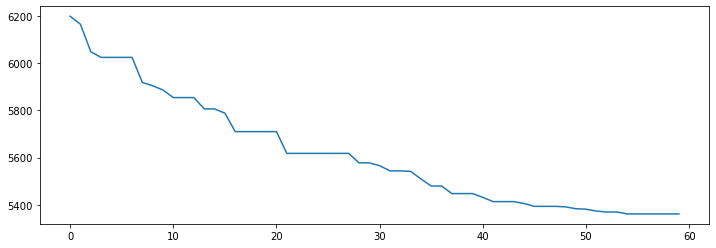

  0     5.55019641 6314.00000000 6926.59920000 7112.00000000 135.87458688
  1    10.57325745 6236.00000000 6802.37960000 6954.00000000 120.74528854
  2    16.51030397 6150.00000000 6709.10520000 6852.00000000 112.08116404
  3    22.40866756 6136.00000000 6631.47600000 6764.00000000 105.44136866
  4    28.01805949 6080.00000000 6568.19840000 6694.00000000 100.88865465
  5    33.57329297 6028.00000000 6511.30880000 6630.00000000  99.70049871
  6    37.62721539 6028.00000000 6461.20040000 6580.00000000  97.80593765
  7    42.53322530 5958.00000000 6415.18560000 6530.00000000  97.32403995
  8    47.76318169 5940.00000000 6370.40520000 6486.00000000  95.68035019
  9    52.66215086 5938.00000000 6333.61320000 6446.00000000  92.27117419
 10    57.57849741 5884.00000000 6297.25280000 6410.00000000  89.14425215
 11    62.39005232 5848.00000000 6263.27360000 6372.00000000  87.43880342
 12    68.30638647 5848.00000000 6232.07520000 6338.00000000  84.14127611
 13    73.70051956 5848.00000000 6202.

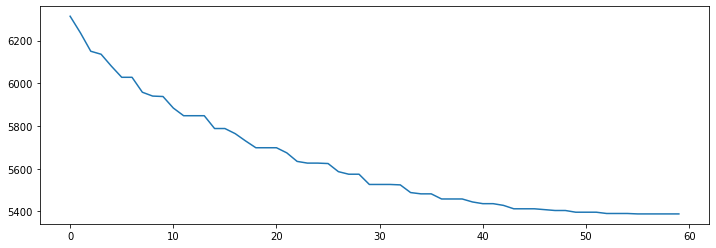

  0     5.65524483 6284.00000000 6922.52200000 7106.00000000 138.98736747
  1    10.82619977 6220.00000000 6798.43720000 6952.00000000 121.32201142
  2    15.77336383 6016.00000000 6705.21280000 6844.00000000 113.77444140
  3    21.57229948 5990.00000000 6624.61120000 6758.00000000 108.84564867
  4    27.98111010 5990.00000000 6556.77120000 6684.00000000 106.84212863
  5    33.95708275 5990.00000000 6498.55120000 6624.00000000 103.44032569
  6    38.14725542 5764.00000000 6443.73920000 6566.00000000 100.14267014
  7    42.80308294 5764.00000000 6395.69560000 6514.00000000  96.30654879
  8    48.87533808 5764.00000000 6350.23280000 6466.00000000  94.97102824
  9    55.35615468 5764.00000000 6310.70320000 6422.00000000  92.08851345
 10    60.42110944 5764.00000000 6272.91200000 6382.00000000  88.78719872
 11    65.27015066 5764.00000000 6236.61120000 6344.00000000  86.28607787
 12    70.78224850 5714.00000000 6201.89160000 6306.00000000  84.85291892
 13    76.58530498 5714.00000000 6169.

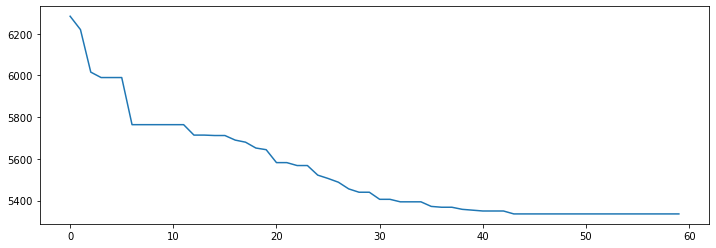

  0     6.84786081 6288.00000000 6919.71400000 7106.00000000 142.68343353
  1    12.85897708 6142.00000000 6791.87880000 6948.00000000 126.99473576
  2    17.40952420 6142.00000000 6690.72600000 6836.00000000 117.86181792
  3    21.83565903 6068.00000000 6609.25600000 6746.00000000 111.95275461
  4    27.84388494 6020.00000000 6538.20320000 6672.00000000 107.28660825
  5    33.10291767 5962.00000000 6479.50280000 6604.00000000 101.71686975
  6    37.94570899 5930.00000000 6429.47000000 6550.00000000  97.46592379
  7    42.88280797 5892.00000000 6381.16240000 6498.00000000  94.27198537
  8    48.86483479 5868.00000000 6338.04040000 6450.00000000  93.03365825
  9    54.02002335 5868.00000000 6296.84080000 6408.00000000  91.47241910
 10    59.13994861 5862.00000000 6258.86200000 6368.00000000  89.10526896
 11    65.45508313 5792.00000000 6223.16680000 6330.00000000  87.33742942
 12    69.95161414 5790.00000000 6189.73840000 6296.00000000  85.38569649
 13    74.46490884 5790.00000000 6159.

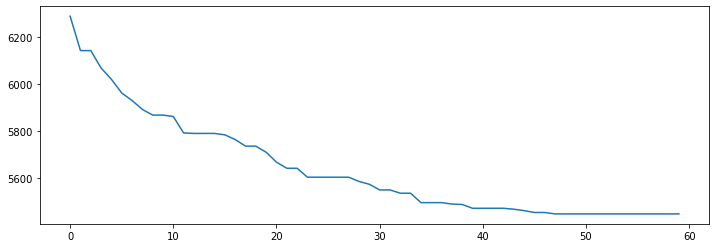

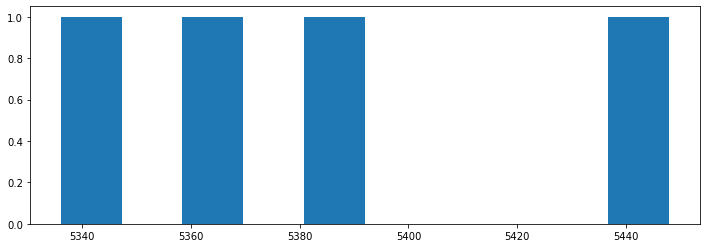

In [23]:
flow_matr = Nug27_A
dist_matr = Nug27_B
n = Nug27_n
population_size = [5000]
crossover_probability = [0.97, 0.95]
mutation_probability = [0.25, 0.3]
number_of_iterations = [60]
crossover = [PMX]
mutation = [reverse_sequence_mutation]
locality = [local_search]
locality_probablility = [0.01]
ks=[2]
transparent = True

scores = []


for (pop, cross, mut, n_it, cro, mu, loc, loc_prob, k) in itertools.product(population_size, crossover_probability, 
            mutation_probability, number_of_iterations, crossover, mutation, locality, locality_probablility, ks):
    best_p, costs = SGA_qap(n, flow_matr, dist_matr, population_size=pop, crossover_probability=cross, 
            mutation_probability=mut, number_of_iterations=n_it, mutation=mu, crossover=cro, locality=loc, 
            locality_probablility=loc_prob, k=k, transparent=transparent)
    scores.append(qap_objective_function(best_p, n, flow_matr, dist_matr))
    print(" population_size =", pop, "\n crossover_probability =", cross,
          "\n mutation_probability =", mut, "\n number_of_iterations =", n_it,
          "\n tsp_objective_function:", qap_objective_function(best_p, n, flow_matr, dist_matr), 
          "\n best_permutation:", best_p)
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()
    
plt.figure(figsize=(12,4))
plt.hist(scores)
plt.show()

# Nug28   5166

In [32]:
# 5166
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug28.dat'
Nug28_n, Nug28_A, Nug28_B = get_next_instance(QAP_INSTANCE_URL)

 population_size = 10000 
 crossover_probability = 0.975 
 mutation_probability = 0.25 
 number_of_iterations = 60 
 tsp_objective_function: 5298.0 
 best_permutation: [15  7 11  6  0  2 16 18 23 22 24  1  9 13 27 25 14 10 19 20 12 17  3  8
  4 21 26  5]


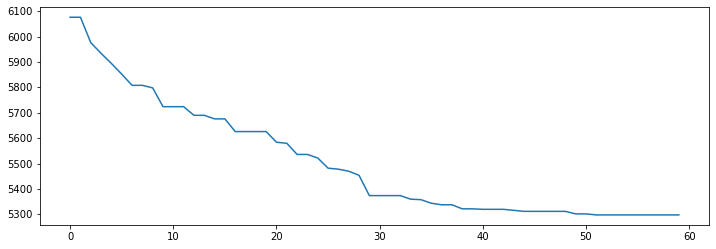

 population_size = 10000 
 crossover_probability = 0.975 
 mutation_probability = 0.3 
 number_of_iterations = 60 
 tsp_objective_function: 5278.0 
 best_permutation: [15  1 12 20  0  2 11 18 10 17 25  8  3 27 22  4 21 16 19 26  5  9 23  7
 13 14 24  6]


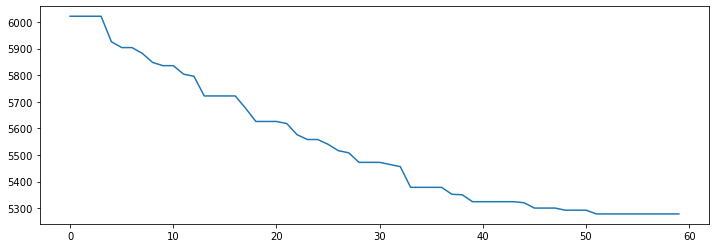

 population_size = 10000 
 crossover_probability = 0.975 
 mutation_probability = 0.35 
 number_of_iterations = 60 
 tsp_objective_function: 5348.0 
 best_permutation: [11 20 24 22 27 18 10  9 13 12  3 25 19 14  0 15  5 16  8 21 26 17 23  4
  2  6  7  1]


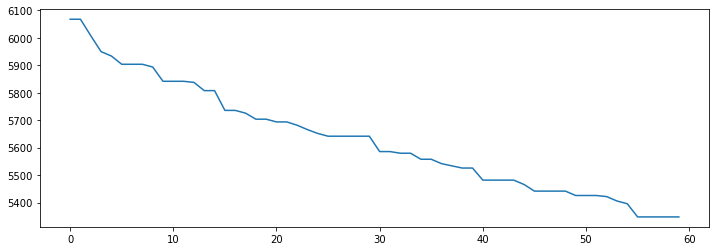

 population_size = 10000 
 crossover_probability = 0.95 
 mutation_probability = 0.25 
 number_of_iterations = 60 
 tsp_objective_function: 5248.0 
 best_permutation: [16  1  4 27  0 15 10 19  2  9 24  7  8  6 20 12 21 18 11  5  3 17 23 14
 25 22 13 26]


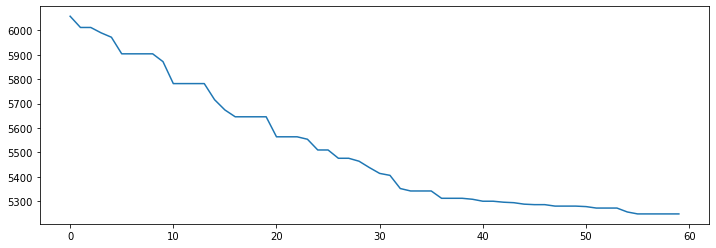

 population_size = 10000 
 crossover_probability = 0.95 
 mutation_probability = 0.3 
 number_of_iterations = 60 
 tsp_objective_function: 5394.0 
 best_permutation: [ 4  2 24 22  6  8 11 19 16 17 26 10  9 21  7 15 13 25 12 14  1 18 27  3
  5 20 23  0]


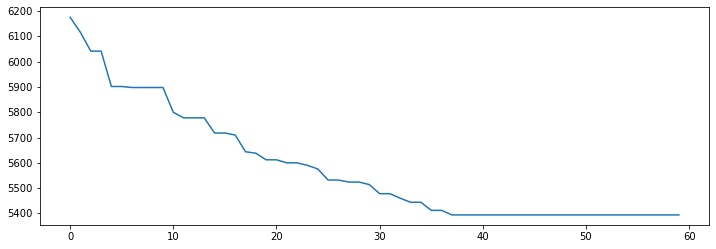

 population_size = 10000 
 crossover_probability = 0.95 
 mutation_probability = 0.35 
 number_of_iterations = 60 
 tsp_objective_function: 5412.0 
 best_permutation: [16 20  3  0 27 11 17 23 12 19  9 15 18  1  7  4 21  2 24  6 26 10  8 14
 22 13  5 25]


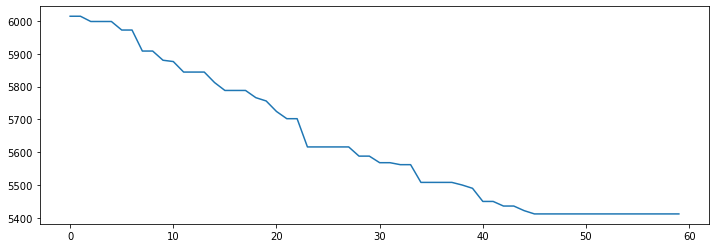

 population_size = 10000 
 crossover_probability = 0.925 
 mutation_probability = 0.25 
 number_of_iterations = 60 
 tsp_objective_function: 5416.0 
 best_permutation: [ 8  5  3 27  0 19 16 17  2  9 24 15 18  6 26 25 21 11  1 13  4 10 22 14
 23  7 12 20]


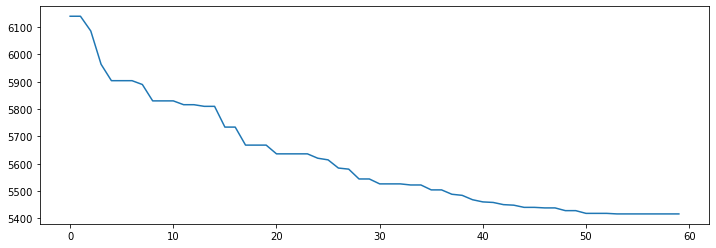

 population_size = 10000 
 crossover_probability = 0.925 
 mutation_probability = 0.3 
 number_of_iterations = 60 
 tsp_objective_function: 5394.0 
 best_permutation: [25  1  8  7  0 16 11 18 13 19 17 26 12 14 21  9  6 23  4 15  3 24 10 27
  5 20 22  2]


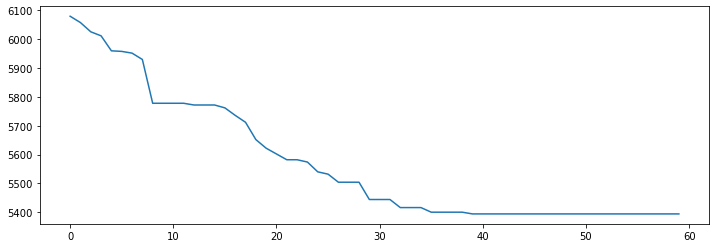

 population_size = 10000 
 crossover_probability = 0.925 
 mutation_probability = 0.35 
 number_of_iterations = 60 
 tsp_objective_function: 5408.0 
 best_permutation: [12  7 15 21  0  3 17 19 16  9 24  4  2 13  1 22  5 11 18 20 14 10 25  6
 26 23  8 27]


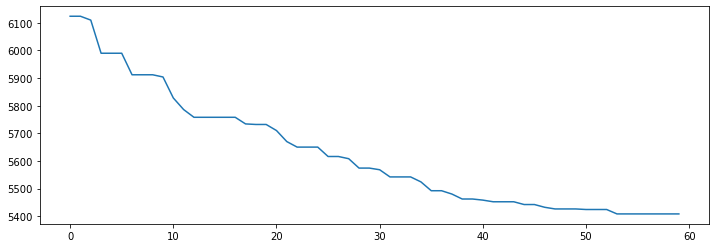

 population_size = 10000 
 crossover_probability = 0.9 
 mutation_probability = 0.25 
 number_of_iterations = 60 
 tsp_objective_function: 5268.0 
 best_permutation: [ 3  7 18 26  0  1 16 17 15  9 25  2  8 27  6 23  5 11 24 20 14 10 12  4
 22 13 19 21]


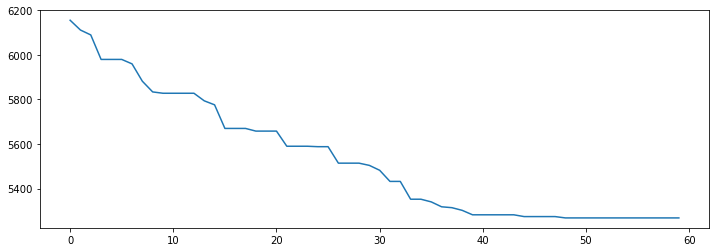

 population_size = 10000 
 crossover_probability = 0.9 
 mutation_probability = 0.3 
 number_of_iterations = 60 
 tsp_objective_function: 5388.0 
 best_permutation: [16  6 19 26 27  1  9 23 11  3 10  7  8 12  0  2 21 18 24 13 20 17 25 14
 22  4  5 15]


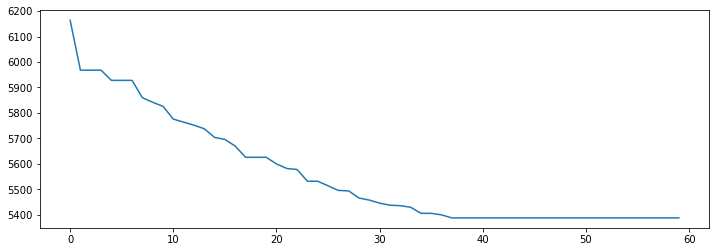

 population_size = 10000 
 crossover_probability = 0.9 
 mutation_probability = 0.35 
 number_of_iterations = 60 
 tsp_objective_function: 5314.0 
 best_permutation: [15 26 19  5 27 24  9 10  1  8  3 22 23  6 14 12  7 18  2 13 20 17  4 21
 16  0 11 25]


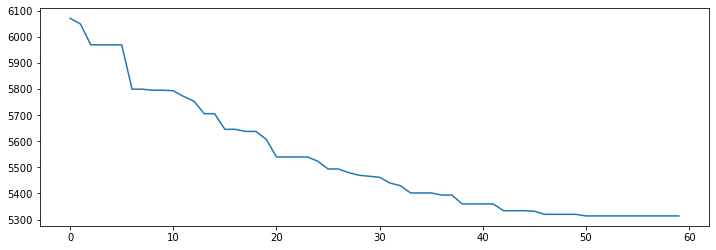

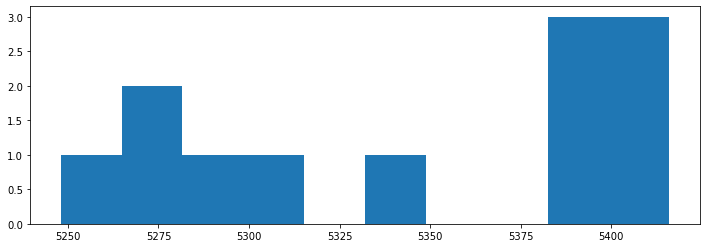

In [26]:
flow_matr = Nug28_A
dist_matr = Nug28_B
n = Nug28_n
population_size = [10000]
crossover_probability = [0.975, 0.95, 0.925, 0.9]
mutation_probability = [0.25, 0.3, 0.35]
number_of_iterations = [60]
crossover = [PMX]
mutation = [reverse_sequence_mutation]
locality = [local_search]
locality_probablility = [0.00]
ks=[2]
transparent = False

scores = []

for (pop, cross, mut, n_it, cro, mu, loc, loc_prob, k) in itertools.product(population_size, crossover_probability, 
            mutation_probability, number_of_iterations, crossover, mutation, locality, locality_probablility, ks):
    best_p, costs = SGA_qap(n, flow_matr, dist_matr, population_size=pop, crossover_probability=cross, 
            mutation_probability=mut, number_of_iterations=n_it, mutation=mu, crossover=cro, locality=loc, 
            locality_probablility=loc_prob, k=k, transparent=transparent)
    scores.append(qap_objective_function(best_p, n, flow_matr, dist_matr))
    print(" population_size =", pop, "\n crossover_probability =", cross,
          "\n mutation_probability =", mut, "\n number_of_iterations =", n_it,
          "\n tsp_objective_function:", qap_objective_function(best_p, n, flow_matr, dist_matr), 
          "\n best_permutation:", best_p)
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()

plt.figure(figsize=(12,4))
plt.hist(scores)
plt.show()

  0    14.59667397 6026.00000000 6748.68120000 6914.00000000 124.34326024
  1    26.67260933 6012.00000000 6634.40740000 6774.00000000 110.89178159
  2    37.76507568 6012.00000000 6549.76420000 6676.00000000 103.00058251
  3    52.74103546 5982.00000000 6482.16240000 6600.00000000  97.43463463
  4    66.70221615 5914.00000000 6425.76320000 6538.00000000  94.74439258
  5    81.85757017 5880.00000000 6375.26500000 6486.00000000  91.79282856
  6    93.83266282 5880.00000000 6329.44780000 6438.00000000  89.65090672
  7   108.07375240 5822.00000000 6289.75720000 6396.00000000  86.72186949
  8   122.25989056 5822.00000000 6253.32880000 6356.00000000  83.21204655
  9   134.80355048 5822.00000000 6222.20680000 6322.00000000  80.14940320
 10   147.47847319 5768.00000000 6192.46140000 6290.00000000  77.27908068
 11   158.87117219 5768.00000000 6164.17040000 6258.00000000  74.53883125
 12   172.78416491 5722.00000000 6137.80760000 6228.00000000  72.35637209
 13   186.36588740 5618.00000000 6113.

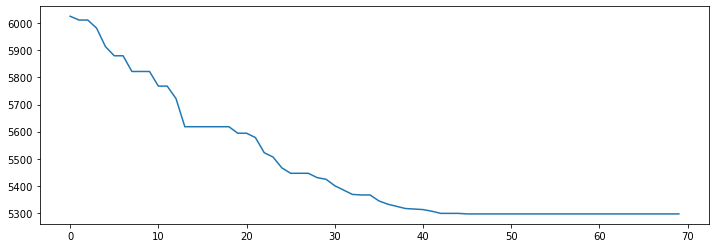

  0    11.79408908 5992.00000000 6752.00800000 6914.00000000 121.97243269
  1    23.16788578 5992.00000000 6641.31920000 6778.00000000 109.22466256
  2    35.83406377 5992.00000000 6558.20720000 6684.00000000 101.94606941
  3    48.19804764 5976.00000000 6491.57840000 6608.00000000  96.82598336
  4    59.02948022 5900.00000000 6433.92380000 6548.00000000  93.43756950
  5    69.38705611 5900.00000000 6384.89960000 6494.00000000  90.22205673
  6    80.19535899 5862.00000000 6341.07380000 6448.00000000  87.62556792
  7    91.29831362 5862.00000000 6302.86420000 6406.00000000  84.69379646
  8   103.63559794 5858.00000000 6267.49860000 6368.00000000  82.45938272
  9   116.25794554 5802.00000000 6235.28720000 6334.00000000  80.67046496
 10   128.57901263 5786.00000000 6205.92100000 6302.00000000  77.97009529
 11   138.79594851 5786.00000000 6179.11660000 6272.00000000  75.64013752
 12   150.53555512 5786.00000000 6153.77500000 6244.00000000  74.25732136
 13   161.28980327 5782.00000000 6129.

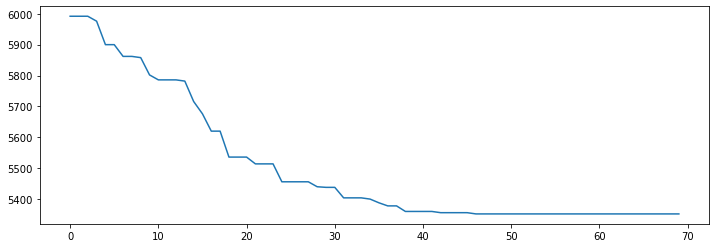

  0    14.37602186 6140.00000000 6755.76140000 6918.00000000 121.11915567
  1    24.25120544 6116.00000000 6646.24780000 6778.00000000 104.18992943
  2    36.18776321 6032.00000000 6565.22200000 6686.00000000  98.02390074
  3    49.39161634 5978.00000000 6495.00680000 6610.00000000  94.13700204
  4    61.85758090 5978.00000000 6436.26640000 6548.00000000  90.89922019
  5    74.83915186 5856.00000000 6384.67000000 6492.00000000  89.35634225
  6    87.48217893 5778.00000000 6338.07800000 6444.00000000  86.60631568
  7    99.66856933 5778.00000000 6296.55960000 6400.00000000  84.69024293
  8   110.77020764 5778.00000000 6259.32580000 6360.00000000  82.32416082
  9   123.28455520 5778.00000000 6224.83800000 6322.00000000  80.57177270
 10   135.75339866 5778.00000000 6191.91320000 6288.00000000  78.53483091
 11   148.96285510 5770.00000000 6162.30920000 6258.00000000  76.84694135
 12   160.88770318 5760.00000000 6133.84200000 6226.00000000  75.65859526
 13   172.21529269 5760.00000000 6107.

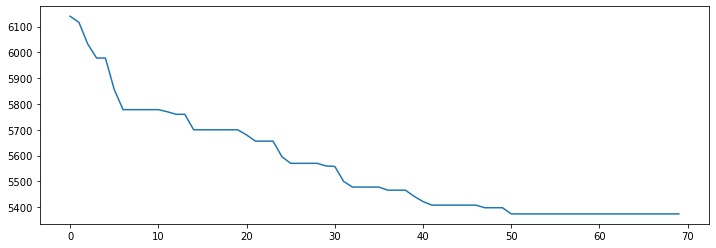

  0    13.33716869 6124.00000000 6753.09300000 6916.00000000 122.28907454
  1    24.44248533 6102.00000000 6642.03040000 6778.00000000 107.28391434
  2    36.73536515 6010.00000000 6558.07100000 6682.00000000  99.75500067
  3    46.86123538 5996.00000000 6492.77760000 6608.00000000  93.57053456
  4    59.67411017 5906.00000000 6437.01040000 6546.00000000  89.98960769
  5    72.88527083 5890.00000000 6386.46580000 6494.00000000  88.94906987
  6    86.15289974 5890.00000000 6341.76560000 6448.00000000  86.96274752
  7    98.14383030 5890.00000000 6301.72100000 6404.00000000  85.83513592
  8   110.47502327 5854.00000000 6264.68440000 6364.00000000  84.90952124
  9   124.14092612 5738.00000000 6229.55080000 6328.00000000  84.32201029
 10   135.15335536 5738.00000000 6194.96420000 6296.00000000  83.21676465
 11   148.46972275 5732.00000000 6162.36900000 6262.00000000  80.96977855
 12   160.70494938 5732.00000000 6131.73280000 6230.00000000  78.61878023
 13   174.15771055 5732.00000000 6103.

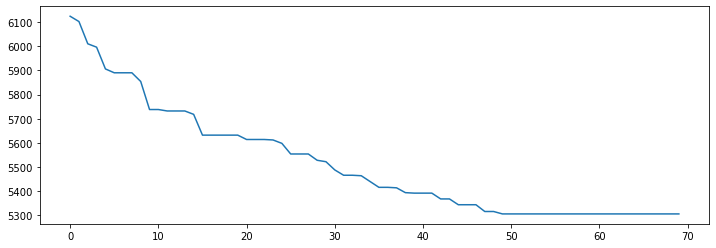

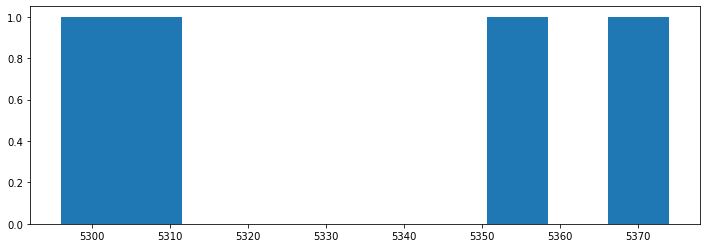

In [29]:
flow_matr = Nug28_A
dist_matr = Nug28_B
n = Nug28_n
population_size = [10000]
crossover_probability = [0.975, 0.95]
mutation_probability = [0.25, 0.3]
number_of_iterations = [70]
crossover = [PMX]
mutation = [reverse_sequence_mutation]
locality = [local_search]
locality_probablility = [0.01]
ks=[2]
transparent = True

scores = []


for (pop, cross, mut, n_it, cro, mu, loc, loc_prob, k) in itertools.product(population_size, crossover_probability, 
            mutation_probability, number_of_iterations, crossover, mutation, locality, locality_probablility, ks):
    best_p, costs = SGA_qap(n, flow_matr, dist_matr, population_size=pop, crossover_probability=cross, 
            mutation_probability=mut, number_of_iterations=n_it, mutation=mu, crossover=cro, locality=loc, 
            locality_probablility=loc_prob, k=k, transparent=transparent)
    scores.append(qap_objective_function(best_p, n, flow_matr, dist_matr))
    print(" population_size =", pop, "\n crossover_probability =", cross,
          "\n mutation_probability =", mut, "\n number_of_iterations =", n_it,
          "\n tsp_objective_function:", qap_objective_function(best_p, n, flow_matr, dist_matr), 
          "\n best_permutation:", best_p)
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()
    
plt.figure(figsize=(12,4))
plt.hist(scores)
plt.show()

# Tai50a 4938796

In [46]:
# 4938796
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/tai50a.dat'
tai50a_n, tai50a_A, tai50a_B = get_next_instance2(QAP_INSTANCE_URL)

 population_size = 10000 
 crossover_probability = 0.975 
 mutation_probability = 0.25 
 number_of_iterations = 100 
 tsp_objective_function: 5218778.0 
 best_permutation: [ 6  4 14 30 15  3 26 47 44 11 31 17  0 42 10 16  7 21  9 12 45 22 24  1
 48 32 25  5 35 49 23 41 27 29 20 38 46 36 39  8 13 28  2 43 40 33 34 19
 18 37]


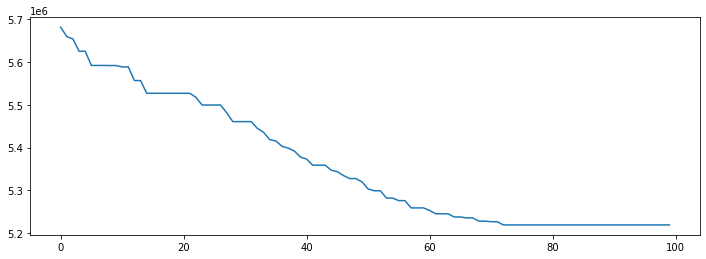

 population_size = 10000 
 crossover_probability = 0.975 
 mutation_probability = 0.3 
 number_of_iterations = 100 
 tsp_objective_function: 5184650.0 
 best_permutation: [28 46 13 31 44  7 34  5 12 38 21  6 16 45 39  0 11 30 37  3 47 25 42 33
 15 40 36 17 10 19 41  1 32  2 20  9 24  8 14 35 23 48 18 22 49 29 26  4
 43 27]


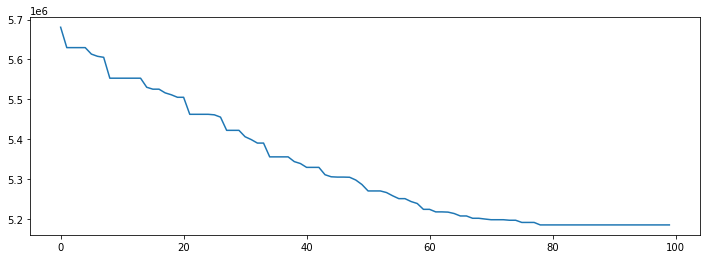

 population_size = 10000 
 crossover_probability = 0.975 
 mutation_probability = 0.35 
 number_of_iterations = 100 
 tsp_objective_function: 5257298.0 
 best_permutation: [18 35 28 47 17 43 11 32 38 27  1  2 25  4 41 14 46 31  5 24 34  8 30 12
 33  9 15  0 16 42 37 10 39 26  7 29 19 13 21 22 23 36 48 49  6 44 40  3
 20 45]


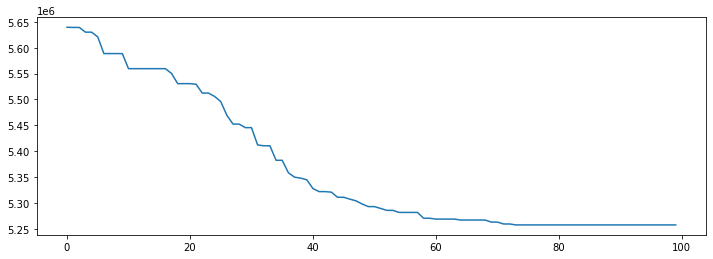

 population_size = 10000 
 crossover_probability = 0.95 
 mutation_probability = 0.25 
 number_of_iterations = 100 
 tsp_objective_function: 5276042.0 
 best_permutation: [19  4 12  2 40  9 46  8  1 28  7 43 10 13 16 37  3 31 17 45  5 20  6 11
 48 47 24 49 33 25 36 29 35 32 39 41 21 26 42 14 30 44 23 38 27 34 15 18
 22  0]


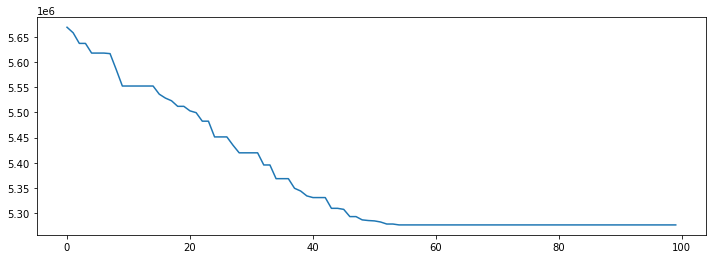

 population_size = 10000 
 crossover_probability = 0.95 
 mutation_probability = 0.3 
 number_of_iterations = 100 
 tsp_objective_function: 5237384.0 
 best_permutation: [25 17 37 26 10 18  2 31 24 20 33 28 34  0 32 48 15 45 12 39 22 38  9 19
 14  1 44  4 27 47 11 29  6 23 21 41 13 35 49  3  7 16 42 46 40 43 36 30
  8  5]


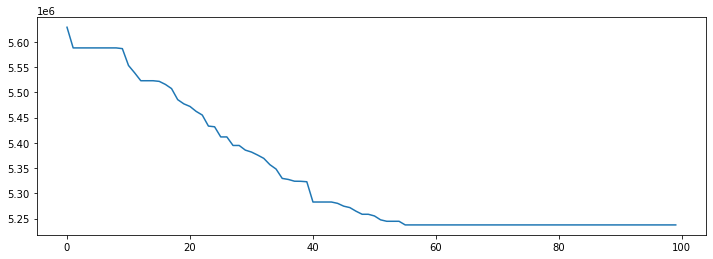

 population_size = 10000 
 crossover_probability = 0.95 
 mutation_probability = 0.35 
 number_of_iterations = 100 
 tsp_objective_function: 5205632.0 
 best_permutation: [20 26  0 29 39 13 25  2 16 34 15  4 47 46 18 17 48 33 37 19 11 49 24  8
 31 27 45 14 32  7 40 10  5 21 12 22  1 42 23 43 44 30 41 35  3 36  6  9
 28 38]


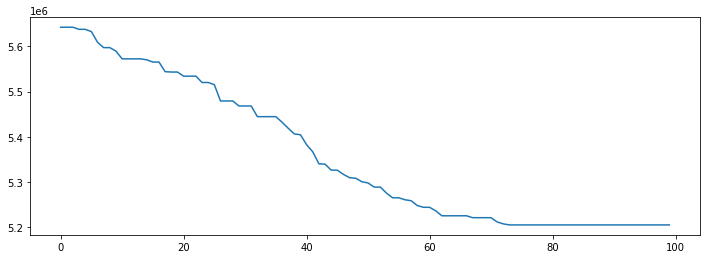

 population_size = 10000 
 crossover_probability = 0.925 
 mutation_probability = 0.25 
 number_of_iterations = 100 
 tsp_objective_function: 5234206.0 
 best_permutation: [19 22  0  4 38  2 17 15  3 34  9 27 39 31 33 21 28 42 16 20 43 45  6 48
 11 47 44  5 29 10 26 30 12 37 40 13 36 23  7 24  1  8 41 49 32 25 14 35
 46 18]


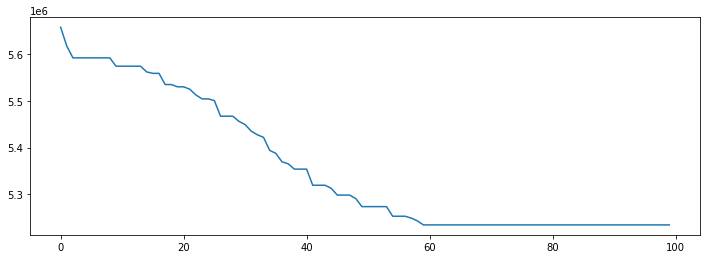

 population_size = 10000 
 crossover_probability = 0.925 
 mutation_probability = 0.3 
 number_of_iterations = 100 
 tsp_objective_function: 5246856.0 
 best_permutation: [14  3 46 39 49 32 25 28 42 44 17 24 26 27  6  0 31  4 13  1 48  8 33 34
 22 20  2  9 35 16 10 21 38 37  7 29  5 41 23 30 15 18 12 11 40 47 19 36
 43 45]


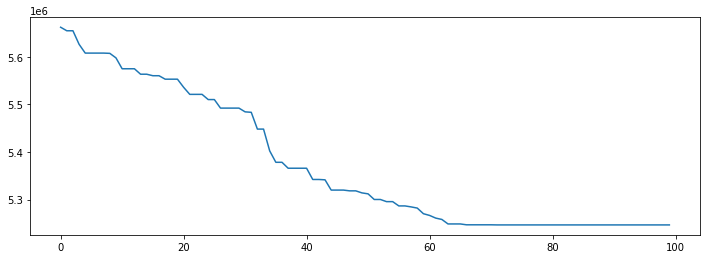

 population_size = 10000 
 crossover_probability = 0.925 
 mutation_probability = 0.35 
 number_of_iterations = 100 
 tsp_objective_function: 5223880.0 
 best_permutation: [46  4 17 21 45 36 10  2 18  7 14 25 44 40  3 43 15  0  9 20  5 37 26 30
 29 41 24  6 33  1 19 28  8 39 12 35 32 38 42 13 16 11 47 34 27 49 22 23
 48 31]


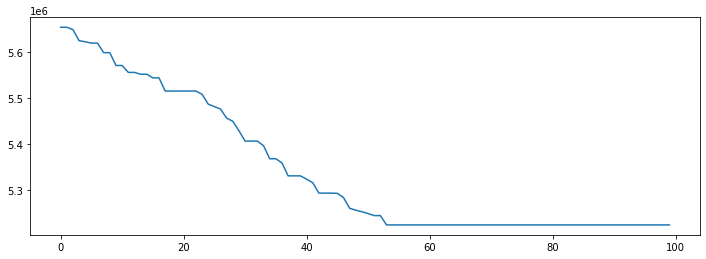

 population_size = 10000 
 crossover_probability = 0.9 
 mutation_probability = 0.25 
 number_of_iterations = 100 
 tsp_objective_function: 5239800.0 
 best_permutation: [18 11 16 20 24 48 46 39 44 25  2 14 29 37 43 49 40 23 38  0 36 30  7  6
 31 17 21 47 42 22 41 19  9  5 34 28 26 35 45 10 33  8 15  1 12 13 32 27
  3  4]


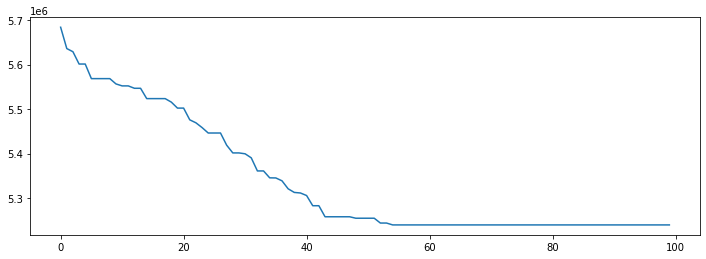

 population_size = 10000 
 crossover_probability = 0.9 
 mutation_probability = 0.3 
 number_of_iterations = 100 
 tsp_objective_function: 5259932.0 
 best_permutation: [32 24 19 36 43 15  8 40 46  6  3 31 22 39 34 25 18  4 44 33 20 29 26  0
  9 35 11 48 10 27 42 49 14 41 17  2 37 23 45 47  5 16 12  7  1 30 21 13
 38 28]


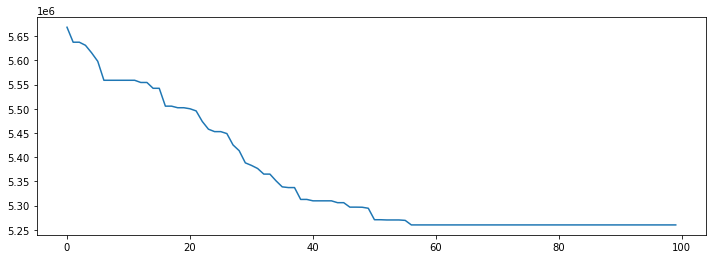

 population_size = 10000 
 crossover_probability = 0.9 
 mutation_probability = 0.35 
 number_of_iterations = 100 
 tsp_objective_function: 5276950.0 
 best_permutation: [41 19 25 35 20  1 49 15 34  5 14  4 31 44 39 38 28 18 23 47 43 27  9 36
 11 32 40 30 17  2 46  0 48 12 37 10 42 21 13 16 29 24  6 26  7 33 22 45
  8  3]


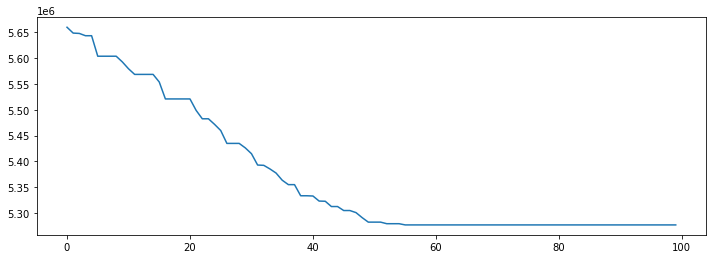

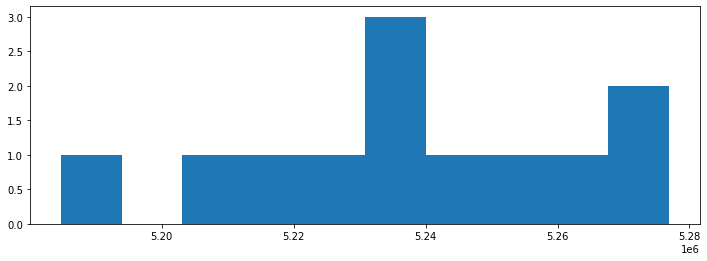

In [39]:
flow_matr = tai50a_A
dist_matr = tai50a_B
n = tai50a_n
population_size = [10000]
crossover_probability = [0.975, 0.95, 0.925, 0.9]
mutation_probability = [0.25, 0.3, 0.35]
number_of_iterations = [100]
crossover = [PMX]
mutation = [reverse_sequence_mutation]
locality = [local_search]
locality_probablility = [0.00]
ks=[2]
transparent = False

scores = []

for (pop, cross, mut, n_it, cro, mu, loc, loc_prob, k) in itertools.product(population_size, crossover_probability, 
            mutation_probability, number_of_iterations, crossover, mutation, locality, locality_probablility, ks):
    best_p, costs = SGA_qap(n, flow_matr, dist_matr, population_size=pop, crossover_probability=cross, 
            mutation_probability=mut, number_of_iterations=n_it, mutation=mu, crossover=cro, locality=loc, 
            locality_probablility=loc_prob, k=k, transparent=transparent)
    scores.append(qap_objective_function(best_p, n, flow_matr, dist_matr))
    print(" population_size =", pop, "\n crossover_probability =", cross,
          "\n mutation_probability =", mut, "\n number_of_iterations =", n_it,
          "\n tsp_objective_function:", qap_objective_function(best_p, n, flow_matr, dist_matr), 
          "\n best_permutation:", best_p)
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()

plt.figure(figsize=(12,4))
plt.hist(scores)
plt.show()

# Tai60a 7205962

In [47]:
# 7205962
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/tai60a.dat'
tai60a_n, tai60a_A, tai60a_B = get_next_instance3(QAP_INSTANCE_URL)

 population_size = 10000 
 crossover_probability = 0.975 
 mutation_probability = 0.25 
 number_of_iterations = 100 
 tsp_objective_function: 7602562.0 
 best_permutation: [58 32 33 11 59  8  4 18 23 51 42 47 19 21 44 55  3 43  9 25 56 49  0 16
 53 28 26 15 31 29 57 48  5  2 54 45  7 36 34 37 24 10 13 22 12  6 41 35
 17 14 38  1 40 39 50 27 30 52 20 46]


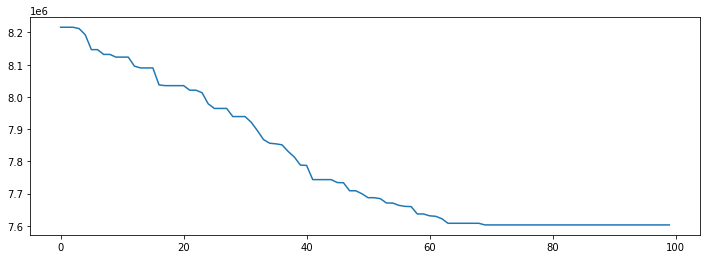

 population_size = 10000 
 crossover_probability = 0.975 
 mutation_probability = 0.3 
 number_of_iterations = 100 
 tsp_objective_function: 7680646.0 
 best_permutation: [10 26 48 21 50 49 52 41  5 22 12 20 55 32  7 34 43 16 14  3 13  0 40 45
  2 53 42 30 27 19 37 28 46 56 15 39 17 25 29  6 58 11 57 36 35 44 33 47
 59 31  8 24  1 18 23  4 54 51 38  9]


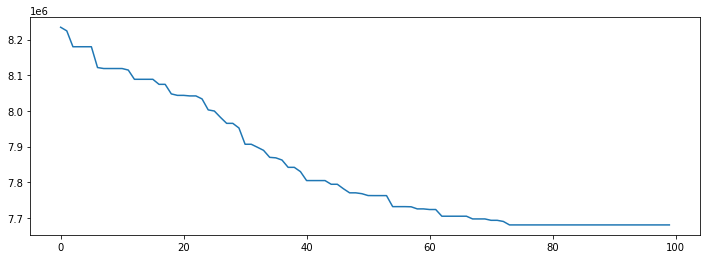

 population_size = 10000 
 crossover_probability = 0.95 
 mutation_probability = 0.25 
 number_of_iterations = 100 
 tsp_objective_function: 7624634.0 
 best_permutation: [59 37 22 35 49 24 32 11 50 52 14 43  4 40  1 21  3 47  7 36 26 44 20 58
 38 56 13 12 55 51 33 10 30 23 34 25  0  8 42 15 48  9 41 16 54 18  6 19
 57 39 46 27 28 53 45  5 29 31 17  2]


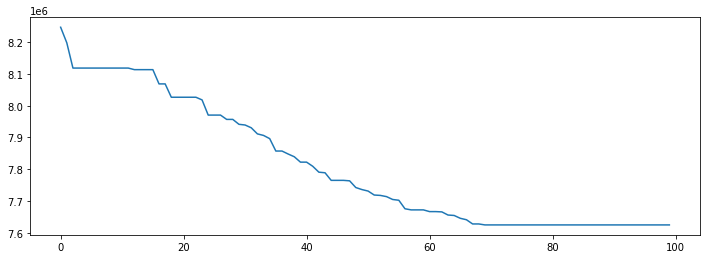

 population_size = 10000 
 crossover_probability = 0.95 
 mutation_probability = 0.3 
 number_of_iterations = 100 
 tsp_objective_function: 7615628.0 
 best_permutation: [31 53 25 24 32 56  8 33 49  7 14 10 16 50 58  0 13 15  3  5 34 43 37 12
 48 45 30 47  9 27 21 46 38 29 57 20  6  2 59 36 35 19 51 55  4 44 22 17
 41 28 54 23 11 18 39 26  1 42 52 40]


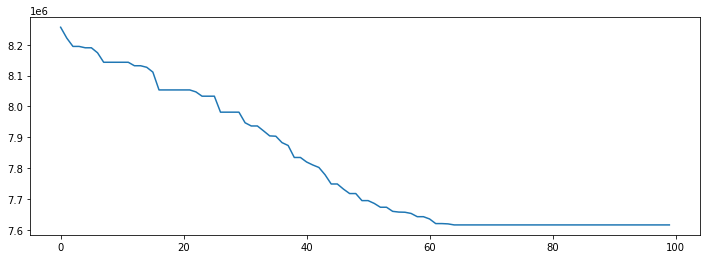

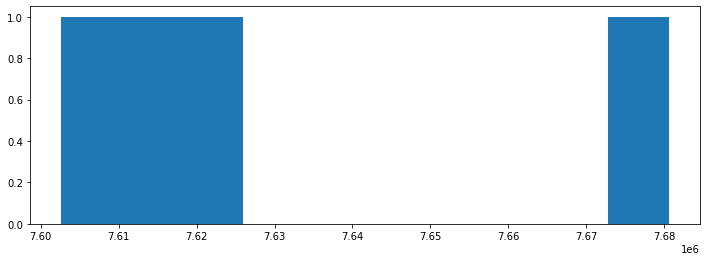

In [48]:
flow_matr = tai60a_A
dist_matr = tai60a_B
n = tai60a_n
population_size = [10000]
crossover_probability = [0.975, 0.95]
mutation_probability = [0.25, 0.3]
number_of_iterations = [100]
crossover = [PMX]
mutation = [reverse_sequence_mutation]
locality = [local_search]
locality_probablility = [0.00]
ks=[2]
transparent = False

scores = []

for (pop, cross, mut, n_it, cro, mu, loc, loc_prob, k) in itertools.product(population_size, crossover_probability, 
            mutation_probability, number_of_iterations, crossover, mutation, locality, locality_probablility, ks):
    best_p, costs = SGA_qap(n, flow_matr, dist_matr, population_size=pop, crossover_probability=cross, 
            mutation_probability=mut, number_of_iterations=n_it, mutation=mu, crossover=cro, locality=loc, 
            locality_probablility=loc_prob, k=k, transparent=transparent)
    scores.append(qap_objective_function(best_p, n, flow_matr, dist_matr))
    print(" population_size =", pop, "\n crossover_probability =", cross,
          "\n mutation_probability =", mut, "\n number_of_iterations =", n_it,
          "\n tsp_objective_function:", qap_objective_function(best_p, n, flow_matr, dist_matr), 
          "\n best_permutation:", best_p)
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()

plt.figure(figsize=(12,4))
plt.hist(scores)
plt.show()

# Tai80a         13499184

In [18]:
# 13499184
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/tai80a.dat'
tai80a_n, tai80a_A, tai80a_B = get_next_instance3(QAP_INSTANCE_URL)

 population_size = 10000 
 crossover_probability = 0.975 
 mutation_probability = 0.25 
 number_of_iterations = 100 
 tsp_objective_function: 14273798.0 
 best_permutation: [18 60 71 25 27 24 77 61 78 35 15 66 10 31 36 68  6 75 52 21  4 74 44  8
  9 62 57  5 73 67  0 42 64 20 30 69 46 12 54 19 13  7 76 32 49 48 29  1
 63 16 37 17 55 22 79 53  2 65  3 33 56 43 50 38 39 28 14 11 70 23 45 26
 72 41 34 47 40 51 58 59]


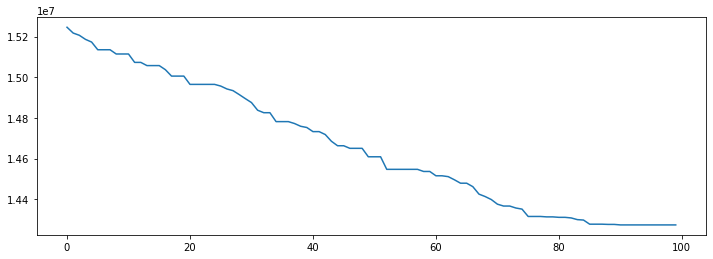

 population_size = 10000 
 crossover_probability = 0.975 
 mutation_probability = 0.3 
 number_of_iterations = 100 
 tsp_objective_function: 14268256.0 
 best_permutation: [49 65 66 15 31 79  8 71 62 26 39 57 60 41  0 74 50 52  9 73 29 10  4 43
 51 18 76 53 58  5 48 24 36 63 59 45 11 75 21 64 28 67  2 77 17 16 34 22
 30 54 32  6 78 19 42 70 47 68 27 44 23 55 37 69 14 35 25 40  3  7 38 20
 72 13 33 12 46  1 61 56]


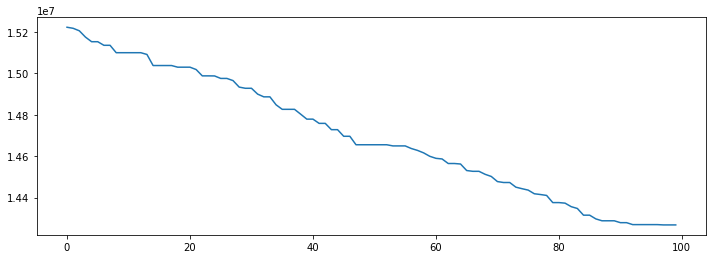

 population_size = 10000 
 crossover_probability = 0.95 
 mutation_probability = 0.25 
 number_of_iterations = 100 
 tsp_objective_function: 14277232.0 
 best_permutation: [24 40 66 71  9 47 78  5 74 23 51 58 10 14 62 68 75 59 20 73 19 29 56 63
 39 30 46 70 79 31  2 15 50 69 37 28 48 52 77 55 34 57 53 17  1 44 22 25
 60 33 18  0 11 32 13 27 54  4 16  6 72 61  3 12 35 67  7 45 43 21 41 36
 65 26 38 76 49 64  8 42]


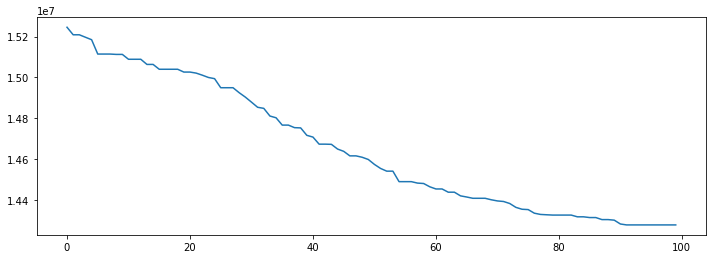

 population_size = 10000 
 crossover_probability = 0.95 
 mutation_probability = 0.3 
 number_of_iterations = 100 
 tsp_objective_function: 14210656.0 
 best_permutation: [16 79 54 65 43 19  3 72 48 37 40 26 17  0 36 64 45 13 25 29 27 47 57 52
 32 58 12 67 75 42 10  9 20 56  8 68 66 14 28 62 18 49 76 61 78 60  2 15
  5 59  7 23 55 24 39 21 31 35 63 51 44 46 33 30 41 74 38 53 50  6 22 70
 73  1 77 11  4 71 34 69]


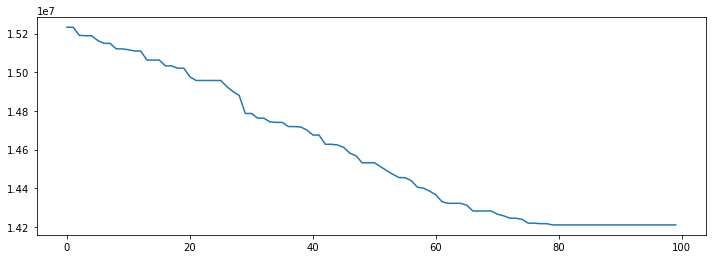

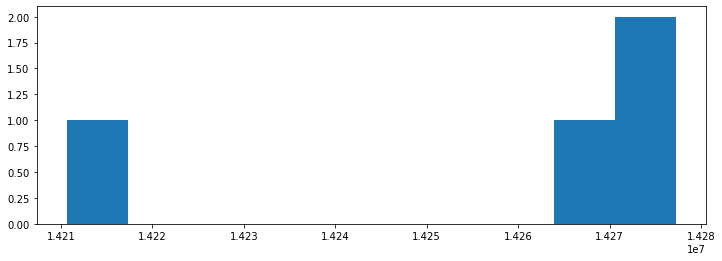

In [19]:
flow_matr = tai80a_A
dist_matr = tai80a_B
n = tai80a_n
population_size = [10000]
crossover_probability = [0.975, 0.95]
mutation_probability = [0.25, 0.3]
number_of_iterations = [100]
crossover = [PMX]
mutation = [reverse_sequence_mutation]
locality = [local_search]
locality_probablility = [0.00]
ks=[2]
transparent = False

scores = []

for (pop, cross, mut, n_it, cro, mu, loc, loc_prob, k) in itertools.product(population_size, crossover_probability, 
            mutation_probability, number_of_iterations, crossover, mutation, locality, locality_probablility, ks):
    best_p, costs = SGA_qap(n, flow_matr, dist_matr, population_size=pop, crossover_probability=cross, 
            mutation_probability=mut, number_of_iterations=n_it, mutation=mu, crossover=cro, locality=loc, 
            locality_probablility=loc_prob, k=k, transparent=transparent)
    scores.append(qap_objective_function(best_p, n, flow_matr, dist_matr))
    print(" population_size =", pop, "\n crossover_probability =", cross,
          "\n mutation_probability =", mut, "\n number_of_iterations =", n_it,
          "\n tsp_objective_function:", qap_objective_function(best_p, n, flow_matr, dist_matr), 
          "\n best_permutation:", best_p)
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()

plt.figure(figsize=(12,4))
plt.hist(scores)
plt.show()

In [19]:
def random_sampling(n, flow_matr, dist_matr, T=1000000):
    t0 = time.time()

    permutations = np.empty((T, n), dtype=np.int64)
    costs = np.zeros(T)
    index_min = 0
    for i in range(T):
        permutations[i, :] = np.random.permutation(n)
        costs[i] = qap_objective_function(permutations[i, :], n, flow_matr, dist_matr)
        if costs[i] < costs[index_min]:
            index_min = i

    print(time.time() - t0)
    best_perm = permutations[index_min, :]
    return best_perm, permutations, costs

In [20]:
best_perm, perms, costs = random_sampling(tai80a_n, tai80a_A, tai80a_B)
print(qap_objective_function(best_perm, tai80a_n, tai80a_A, tai80a_B), best_perm)

399.2229402065277
15157222.0 [26 14 58 55 28 30 17 51 15 73 34 35 68 43 16  3 67  7 22 10 77 41 64 11
 65 52  5 71 63 53 48 29 23 66  4 61 39 60  0 33 13 46 50 74 32 75 56 27
 72 54 59 24 49 21 20 47 76 42 12 31 57 19  8  1 40 25 45  6 78 36 70 69
 37 18 62 79 38 44  2  9]


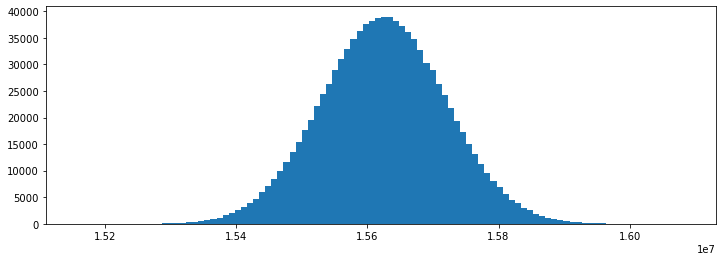

15624629.192924 94775.01678253987


In [21]:
plt.figure(figsize=(12,4))
plt.hist(costs, bins=100)
plt.show()
print(costs.mean(), costs.std())